In [153]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc, precision_recall_curve)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc, precision_recall_curve)
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import joblib
import os
import time
from sklearn.metrics import roc_auc_score


# problem statement

In [44]:
df = pd.read_csv("ola_driver_scaler.txt")

In [45]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [46]:
df

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0      01/01/19          1  28.0     0.0  C23                2   57387   
1      02/01/19          1  28.0     0.0  C23                2   57387   
2      03/01/19          1  28.0     0.0  C23                2   57387   
3      11/01/20          2  31.0     0.0   C7                2   67016   
4      12/01/20          2  31.0     0.0   C7                2   67016   
...         ...        ...   ...     ...  ...              ...     ...   
19099  08/01/20       2788  30.0     0.0  C27                2   70254   
19100  09/01/20       2788  30.0     0.0  C27                2   70254   
19101  10/01/20       2788  30.0     0.0  C27                2   70254   
19102  11/01/20       2788  30.0     0.0  C27                2   70254   
19103  12/01/20       2788  30.0     0.0  C27                2   70254   

      Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0          24/12/18             NaN                    1      1   
1          24/12/18             NaN                    1      1   
2          24/12/18        03/11/19                    1      1   
3          11/06/20             NaN                    2      2   
4          11/06/20             NaN                    2      2   
...             ...             ...                  ...    ...   
19099      06/08/20             NaN                    2      2   
19100      06/08/20             NaN                    2      2   
19101      06/08/20             NaN                    2      2   
19102      06/08/20             NaN                    2      2   
19103      06/08/20             NaN                    2      2   

       Total Business Value  Quarterly Rating  
0                   2381060                 2  
1                   -665480                 2  
2                         0                 2  
3                         0                 1  
4                         0                 1  
...                     ...               ...  
19099                740280                 3  
19100                448370                 3  
19101                     0                 2  
19102                200420                 2  
19103                411480                 2  

[19104 rows x 13 columns]

In [47]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

## filling nan with forward and backward fill

In [48]:
df["Age"] = df.groupby(["Driver_ID"])["Age"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df["Gender"] = df.groupby(["Driver_ID"])["Gender"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [49]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# Analyzing Data

Summary Statistics:


MMM-YY     Driver_ID           Age        Gender   City  \
count      19104  19104.000000  19104.000000  19104.000000  19104   
unique        24           NaN           NaN           NaN     29   
top     01/01/19           NaN           NaN           NaN    C20   
freq        1022           NaN           NaN           NaN   1008   
mean         NaN   1415.591133     34.650335      0.418813    NaN   
std          NaN    810.705321      6.264453      0.493378    NaN   
min          NaN      1.000000     21.000000      0.000000    NaN   
25%          NaN    710.000000     30.000000      0.000000    NaN   
50%          NaN   1417.000000     34.000000      0.000000    NaN   
75%          NaN   2137.000000     39.000000      1.000000    NaN   
max          NaN   2788.000000     58.000000      1.000000    NaN   

        Education_Level         Income Dateofjoining LastWorkingDate  \
count      19104.000000   19104.000000         19104            1616   
unique              NaN            NaN           869             493   
top                 NaN            NaN      23/07/15        29/07/20   
freq                NaN            NaN           192              70   
mean           1.021671   65652.025126           NaN             NaN   
std            0.800167   30914.515344           NaN             NaN   
min            0.000000   10747.000000           NaN             NaN   
25%            0.000000   42383.000000           NaN             NaN   
50%            1.000000   60087.000000           NaN             NaN   
75%            2.000000   83969.000000           NaN             NaN   
max            2.000000  188418.000000           NaN             NaN   

        Joining Designation         Grade  Total Business Value  \
count          19104.000000  19104.000000          1.910400e+04   
unique                  NaN           NaN                   NaN   
top                     NaN           NaN                   NaN   
freq                    NaN           NaN                   NaN   
mean               1.690536      2.252670          5.716621e+05   
std                0.836984      1.026512          1.128312e+06   
min                1.000000      1.000000         -6.000000e+06   
25%                1.000000      1.000000          0.000000e+00   
50%                1.000000      2.000000          2.500000e+05   
75%                2.000000      3.000000          6.997000e+05   
max                5.000000      5.000000          3.374772e+07   

        Quarterly Rating  
count       19104.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean            2.008899  
std             1.009832  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             3.000000  
max             4.000000



Missing Values:


MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64



Histograms of Numerical Features:


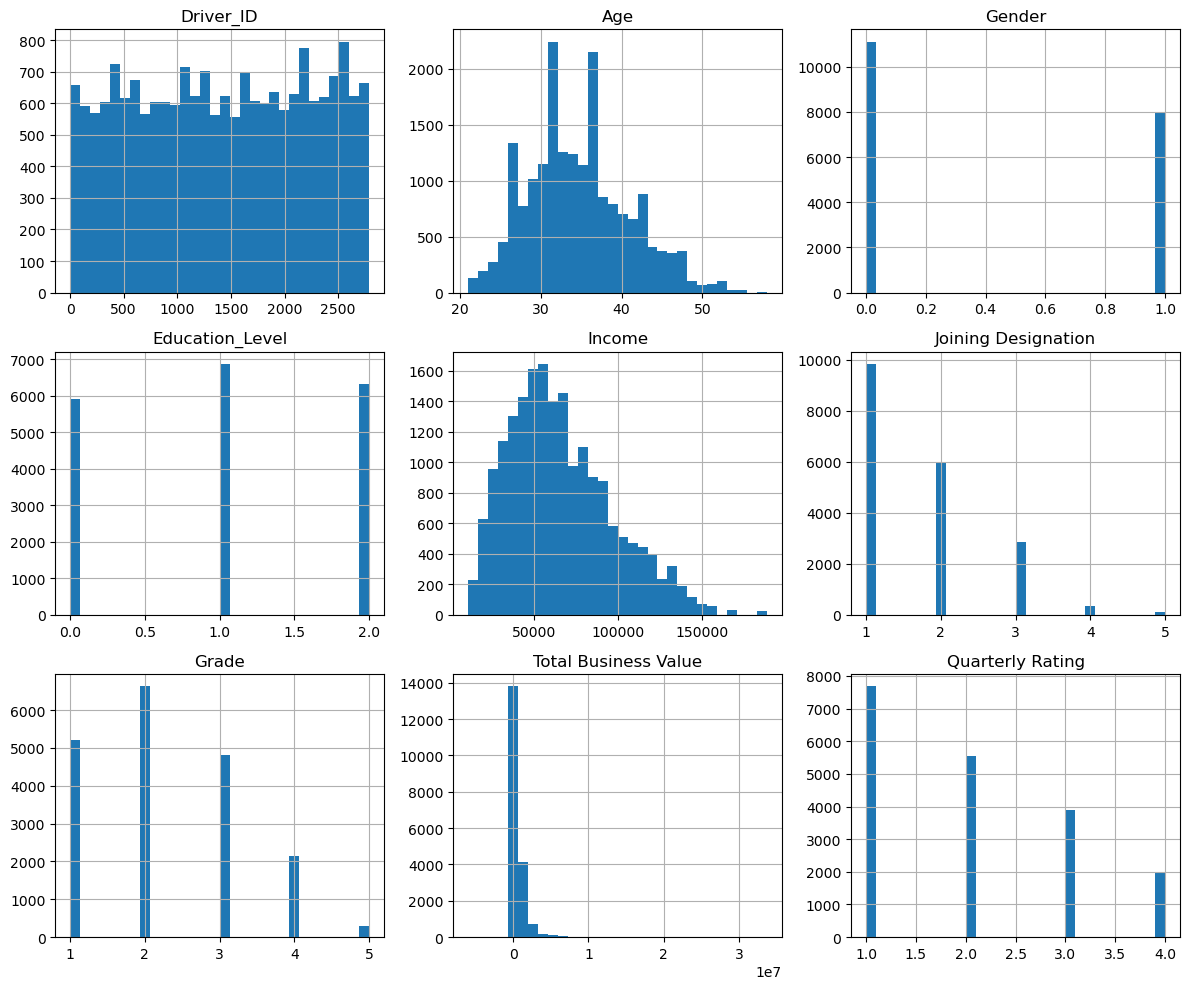

Statistical Tests:

Shapiro-Wilk Test for Normality of Driver_ID:
Statistic: 0.9521365761756897, p-value: 0.0

Shapiro-Wilk Test for Normality of Age:
Statistic: 0.983233630657196, p-value: 5.3739796106856735e-42

Shapiro-Wilk Test for Normality of Gender:
Statistic: 0.626842737197876, p-value: 0.0

Shapiro-Wilk Test for Normality of Education_Level:
Statistic: 0.7990233898162842, p-value: 0.0

Shapiro-Wilk Test for Normality of Income:
Statistic: 0.9618496298789978, p-value: 0.0

Shapiro-Wilk Test for Normality of Joining Designation:
Statistic: 0.7648678421974182, p-value: 0.0

Shapiro-Wilk Test for Normality of Grade:
Statistic: 0.8793331384658813, p-value: 0.0

Shapiro-Wilk Test for Normality of Total Business Value:
Statistic: 0.49703019857406616, p-value: 0.0

Shapiro-Wilk Test for Normality of Quarterly Rating:
Statistic: 0.8268857002258301, p-value: 0.0
Additional Analysis:

Unique Values per Column:


MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64


Value Counts for Categorical Features:

Value Counts for MMM-YY:


MMM-YY
01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
08/01/20     812
09/01/20     809
07/01/20     806
11/01/20     805
12/01/19     795
04/01/19     794
01/01/20     782
11/01/19     781
06/01/20     770
05/01/20     766
05/01/19     764
09/01/19     762
02/01/20     761
07/01/19     757
08/01/19     754
10/01/19     739
04/01/20     729
06/01/19     726
03/01/20     719
Name: count, dtype: int64


Value Counts for City:


City
C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: count, dtype: int64


Value Counts for Dateofjoining:


Dateofjoining
23/07/15    192
31/07/20    150
07/04/19    146
25/04/16    134
30/07/15    118
           ... 
16/03/18      1
26/09/18      1
27/12/20      1
29/12/18      1
16/12/18      1
Name: count, Length: 869, dtype: int64


Value Counts for LastWorkingDate:


LastWorkingDate
29/07/20    70
22/09/19    26
17/03/19    14
28/11/20    13
17/02/20    13
            ..
16/06/19     1
17/11/20     1
12/05/20     1
09/02/19     1
28/10/20     1
Name: count, Length: 493, dtype: int64

In [27]:
def analyze_dataframe(df):
    # Summary Statistics
    print("Summary Statistics:")
    display(df.describe(include='all'))
    print("\n")
    
    # Missing Values
    print("Missing Values:")
    display(df.isna().sum())
    print("\n")
    
    # Distribution of Numerical Features
    print("Histograms of Numerical Features:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols].hist(figsize=(12, 10), bins=30)
    plt.tight_layout()
    plt.show()
    
    
    # Statistical Tests
    print("Statistical Tests:")
    for col in numerical_cols:
        if df[col].dropna().size > 0:
            print(f"\nShapiro-Wilk Test for Normality of {col}:")
            stat, p_value = stats.shapiro(df[col].dropna())
            print(f"Statistic: {stat}, p-value: {p_value}")

    # Additional Analysis
    print("Additional Analysis:")
    print(f"\nUnique Values per Column:")
    display(df.nunique())
    print("\nValue Counts for Categorical Features:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nValue Counts for {col}:")
        display(df[col].value_counts())

# Analyze the DataFrame
analyze_dataframe(df)


## No. of unique driver id

In [470]:
print(df["Driver_ID"].nunique())

2381


## Age

In [471]:
df["Age"].max()

58.0

In [472]:
df["Age"].min()

21.0

In [473]:
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [474]:
# Count the number of unique drivers in each age group
driver_counts = df.groupby('age_group')['Driver_ID'].nunique()

# Count the total number of people in each age group (including non-drivers)
total_counts = df.groupby('age_group')['Driver_ID'].count()

# Calculate the percentage of drivers
driver_percentage = (driver_counts / total_counts) * 100

In [475]:
driver_percentage

age_group
20-25    20.563847
25-30    16.615298
30-35    14.957411
35-40    12.873096
40-45    11.127876
45-50     8.670034
50-55     8.888889
55-60    10.714286
Name: Driver_ID, dtype: float64

### 21 is min age of driver and 58 is max age of driver. Driver within age group 20-25 has over 20% contribution

In [476]:
df.iloc[:,1:].shape[0]==df.iloc[:,1:].drop_duplicates().shape[0]

False

### Duplicates are there in data dropping them

In [28]:
df.drop_duplicates(inplace=True)

## Gender

In [478]:
df["Gender"].value_counts()

Gender
0.0    11103
1.0     8001
Name: count, dtype: int64

In [305]:
df["Gender"].value_counts(normalize=True)

Gender
0.0    0.581251
1.0    0.418749
Name: proportion, dtype: float64

### Not a big gap in Gender 

## Data for 29 unique cities

In [306]:
np.unique(df["City"]).shape

(29,)

In [307]:
df["City"].value_counts(normalize=True)

City
C20    0.052764
C29    0.047111
C26    0.045488
C22    0.042347
C27    0.041143
C15    0.039835
C10    0.038945
C12    0.038055
C8     0.037270
C16    0.037113
C28    0.035752
C1     0.035438
C6     0.034548
C5     0.034338
C14    0.033920
C3     0.033344
C24    0.032140
C7     0.031878
C21    0.031564
C25    0.030570
C19    0.030308
C4     0.030255
C13    0.029784
C18    0.028476
C23    0.028162
C9     0.027219
C2     0.024707
C11    0.024497
C17    0.023032
Name: proportion, dtype: float64

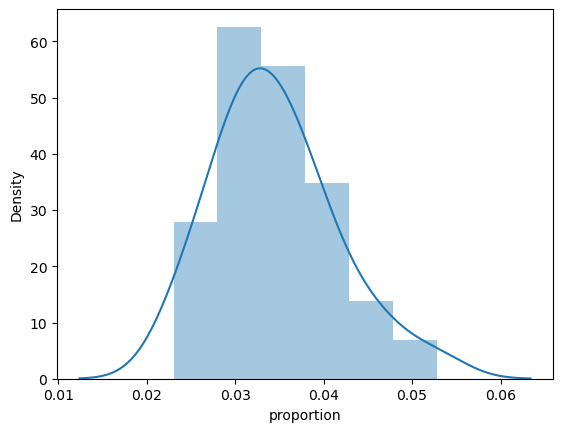

In [308]:
sns.distplot(df["City"].value_counts(normalize=True))
plt.show()

###  the data from each city is normally distributed

## Feature Enginering columns

In [50]:
# Convert 'Dateofjoining' and 'LastWorkingDate' to datetime
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y', errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y', errors='coerce')

# Function to handle multiple date formats
def parse_date(date_str):
    for fmt in ('%b-%y', '%d/%m/%y', '%Y-%m-%d'):
        try:
            return pd.to_datetime(date_str, format=fmt, errors='coerce')
        except ValueError:
            continue
    return pd.NaT

# Parse 'Reporting_Date' with multiple formats
df['Reporting_Date'] = df['MMM-YY'].apply(parse_date)

# Feature Engineering Functions
def is_last_greater_than_first(group):
    if len(group) > 1:
        first_value = group.iloc[0]
        last_value = group.iloc[-1]
        return int(last_value > first_value)  # Return 1 if last > first, otherwise 0
    else:
        return 0

def has_date(lwd_series):
    return int(lwd_series.notna().any())  # Returns 1 if there's at least one non-NaN value, otherwise 0

# Group by 'Driver_ID' and apply the feature extraction functions
IncomeIncreased = df.groupby('Driver_ID')['Income'].apply(is_last_greater_than_first).reset_index(name='Income_Increased')
QuaterlyRatingIncreased = df.groupby('Driver_ID')['Quarterly Rating'].apply(is_last_greater_than_first).reset_index(name='Quarterly_Rating_Increased')
LWD = df.groupby('Driver_ID')['LastWorkingDate'].apply(has_date).reset_index(name='Has_Left')

# Calculate Years at Company and Days Since Last Work
df['Years_at_Company'] = (pd.Timestamp.now() - df['Dateofjoining']).dt.days // 365
#df['Days_since_Last_Work'] = (pd.Timestamp.now() - df['LastWorkingDate']).dt.days
#df['Days_since_Last_Work'] = df['Days_since_Last_Work'].fillna(-1)  # Use -1 for current employees

In [51]:


# Aggregate features
age_mean = df.groupby('Driver_ID')['Age'].mean().reset_index(name='Age_Mean')
income_stats = df.groupby('Driver_ID')['Income'].agg(['mean', 'max', 'min']).reset_index()
income_stats.columns = ['Driver_ID', 'Income_Mean', 'Income_Max', 'Income_Min']
grade_mean = df.groupby('Driver_ID')['Grade'].mean().reset_index(name='Grade_Mean')
total_business_value_mean = df.groupby('Driver_ID')['Total Business Value'].mean().reset_index(name='Total_Business_Value_Mean')
quarterly_rating_mean = df.groupby('Driver_ID')['Quarterly Rating'].mean().reset_index(name='Quarterly_Rating_Mean')
Age = df.groupby(["Driver_ID"])["Age"].max().reset_index()
Grade = df.groupby(["Driver_ID"])["Grade"].max().reset_index()


# Combine all features into a single DataFrame
features_df = pd.merge(age_mean, income_stats, on='Driver_ID')
features_df = pd.merge(features_df, grade_mean, on='Driver_ID')
features_df = pd.merge(features_df, total_business_value_mean, on='Driver_ID')
features_df = pd.merge(features_df, quarterly_rating_mean, on='Driver_ID')
features_df = pd.merge(features_df, IncomeIncreased, on='Driver_ID')
features_df = pd.merge(features_df, QuaterlyRatingIncreased, on='Driver_ID')
features_df = pd.merge(features_df, LWD, on='Driver_ID')
features_df = pd.merge(features_df, Age, on='Driver_ID')
features_df = pd.merge(features_df, Grade, on='Driver_ID')

total_business_value = df.groupby('Driver_ID')['Total Business Value'].sum().reset_index()
features_df = pd.merge(features_df, total_business_value, on='Driver_ID')

# Rename the column for clarity
features_df.rename(columns={'Total Business Value': 'Total_Business_Value_Sum'}, inplace=True)
df = df[['Driver_ID', 'Gender', 'City', 'Education_Level','Years_at_Company']].drop_duplicates().merge(features_df,on = "Driver_ID")

### dropping Id column

In [54]:
df.drop("Driver_ID",inplace=True,axis=1)

### Encoding City column

In [55]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['City'])
df_encoded = encoder.fit_transform(df)
display(df_encoded)

Gender  City_0  City_1  City_2  City_3  City_4  Education_Level  \
0        0.0       0       0       0       0       1                2   
1        0.0       0       0       0       1       0                2   
2        0.0       0       0       0       1       1                2   
3        0.0       0       0       1       0       0                0   
4        1.0       0       0       1       0       1                1   
...      ...     ...     ...     ...     ...     ...              ...   
2376     0.0       0       1       1       0       1                0   
2377     1.0       0       0       1       0       0                0   
2378     0.0       0       0       1       1       1                0   
2379     1.0       0       1       0       0       1                2   
2380     0.0       1       0       0       1       1                2   

      Years_at_Company   Age_Mean  Income_Mean  Income_Max  Income_Min  \
0                    5  28.000000      57387.0       57387       57387   
1                    4  31.000000      67016.0       67016       67016   
2                    5  43.000000      65603.0       65603       65603   
3                    4  29.000000      46368.0       46368       46368   
4                    4  31.000000      78728.0       78728       78728   
...                ...        ...          ...         ...         ...   
2376                 8  33.500000      82815.0       82815       82815   
2377                 3  34.000000      12105.0       12105       12105   
2378                 6  44.888889      35370.0       35370       35370   
2379                 6  28.000000      69498.0       69498       69498   
2380                 4  29.857143      70254.0       70254       70254   

      Grade_Mean  Total_Business_Value_Mean  Quarterly_Rating_Mean  \
0            1.0              571860.000000               2.000000   
1            2.0                   0.000000               1.000000   
2            2.0               70000.000000               1.000000   
3            1.0               40120.000000               1.000000   
4            3.0              253000.000000               1.600000   
...          ...                        ...                    ...   
2376         3.0              906200.833333               2.625000   
2377         1.0                   0.000000               1.000000   
2378         2.0              312787.777778               1.666667   
2379         1.0              162971.666667               1.500000   
2380         2.0              328320.000000               2.285714   

      Income_Increased  Quarterly_Rating_Increased  Has_Left   Age  Grade  \
0                    0                           0         1  28.0      1   
1                    0                           0         0  31.0      2   
2                    0                           0         1  43.0      2   
3                    0                           0         1  29.0      1   
4                    0                           1         0  31.0      3   
...                ...                         ...       ...   ...    ...   
2376                 0                           1         0  34.0      3   
2377                 0                           0         1  34.0      1   
2378                 0                           0         1  45.0      2   
2379                 0                           0         1  28.0      1   
2380                 0                           1         0  30.0      2   

      Total_Business_Value_Sum  
0                      1715580  
1                            0  
2                       350000  
3                       120360  
4                      1265000  
...                        ...  
2376                  21748820  
2377                         0  
2378                   2815090  
2379                    977830  
2380                   2298240  

[2381 rows x 21 columns]

## correlation plot

<Axes: >

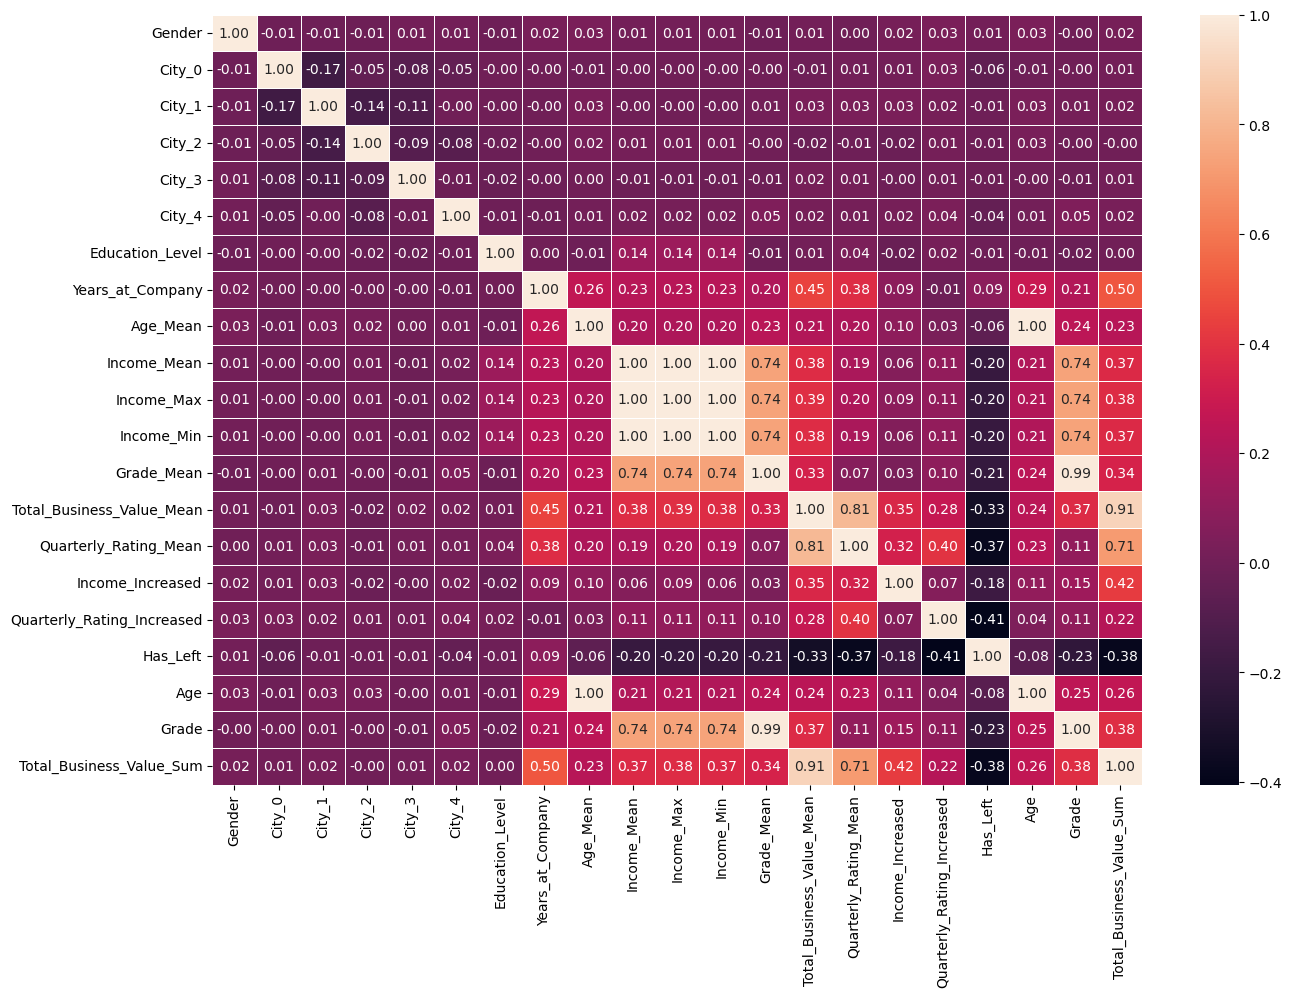

In [534]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(),annot=True,fmt='.2f', linewidths=0.5)

### Has_left column has good correlation with Income_mean,Income_max,Grade_mean,Total_business_value_mean,Quarterly_rating,Icome_increased,Quarterly_rating_increased

In [124]:
boxplotCols = ['Income_Mean','Income_Max', 'Income_Min','Total_Business_Value_Mean']

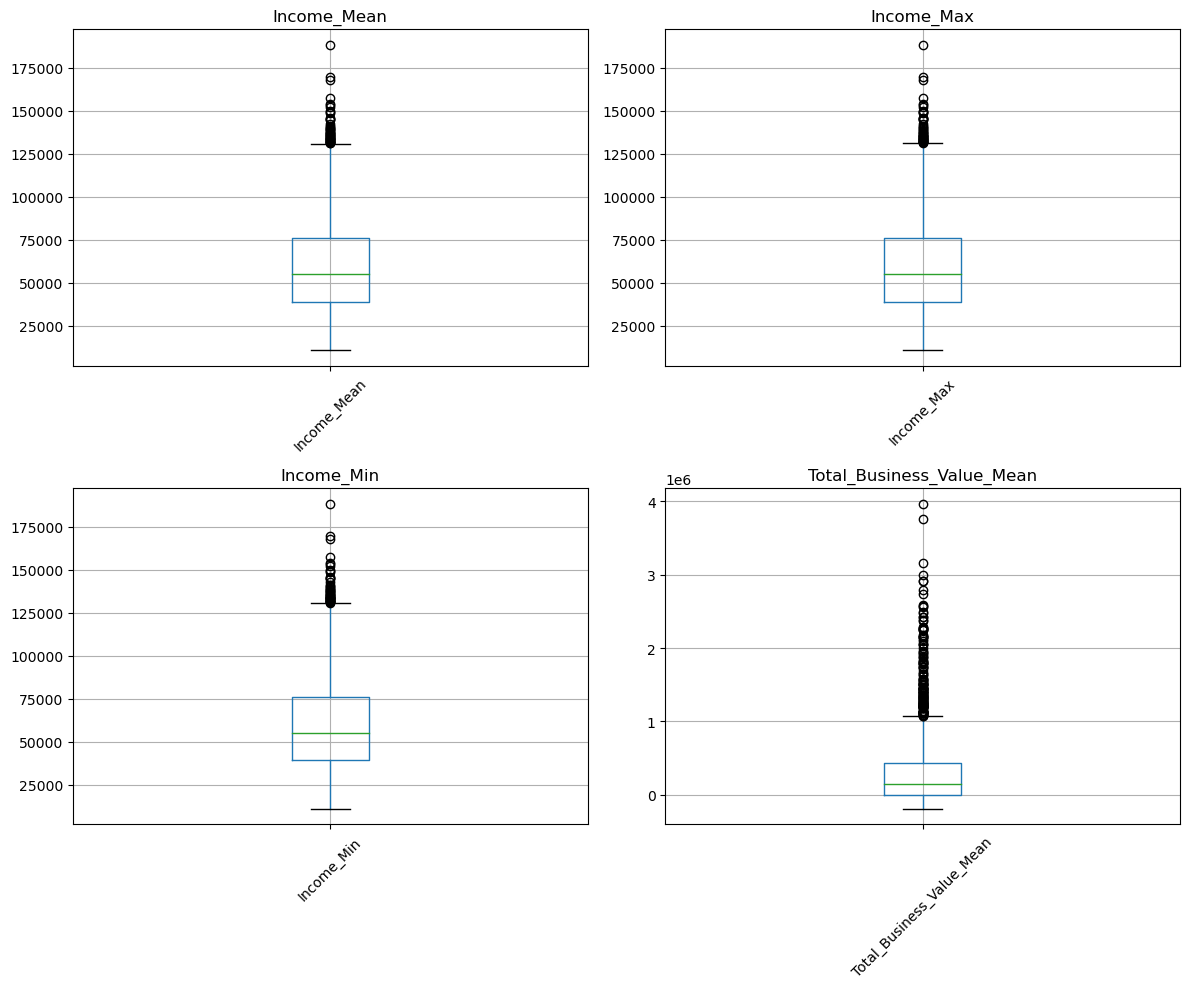

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(boxplotCols):
    df_encoded.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Each of these numerical columns has good amount of outliers, but we wont remove them , we will see after initial model building

In [128]:
df.columns

Index(['Gender', 'City', 'Education_Level', 'Years_at_Company', 'Age_Mean',
       'Income_Mean', 'Income_Max', 'Income_Min', 'Grade_Mean',
       'Total_Business_Value_Mean', 'Quarterly_Rating_Mean',
       'Income_Increased', 'Quarterly_Rating_Increased', 'Has_Left', 'Age',
       'Grade', 'Total_Business_Value_Sum'],
      dtype='object')

In [139]:
catColumns = ['Gender', 'Education_Level', 'Years_at_Company','Income_Increased', 'Quarterly_Rating_Increased','Grade']
label = 'Has_Left'

In [142]:
df_encoded

Gender  City_0  City_1  City_2  City_3  City_4  Education_Level  \
0        0.0       0       0       0       0       1                2   
1        0.0       0       0       0       1       0                2   
2        0.0       0       0       0       1       1                2   
3        0.0       0       0       1       0       0                0   
4        1.0       0       0       1       0       1                1   
...      ...     ...     ...     ...     ...     ...              ...   
2376     0.0       0       1       1       0       1                0   
2377     1.0       0       0       1       0       0                0   
2378     0.0       0       0       1       1       1                0   
2379     1.0       0       1       0       0       1                2   
2380     0.0       1       0       0       1       1                2   

      Years_at_Company   Age_Mean  Income_Mean  Income_Max  Income_Min  \
0                    5  28.000000      57387.0       57387       57387   
1                    4  31.000000      67016.0       67016       67016   
2                    5  43.000000      65603.0       65603       65603   
3                    4  29.000000      46368.0       46368       46368   
4                    4  31.000000      78728.0       78728       78728   
...                ...        ...          ...         ...         ...   
2376                 8  33.500000      82815.0       82815       82815   
2377                 3  34.000000      12105.0       12105       12105   
2378                 6  44.888889      35370.0       35370       35370   
2379                 6  28.000000      69498.0       69498       69498   
2380                 4  29.857143      70254.0       70254       70254   

      Grade_Mean  Total_Business_Value_Mean  Quarterly_Rating_Mean  \
0            1.0              571860.000000               2.000000   
1            2.0                   0.000000               1.000000   
2            2.0               70000.000000               1.000000   
3            1.0               40120.000000               1.000000   
4            3.0              253000.000000               1.600000   
...          ...                        ...                    ...   
2376         3.0              906200.833333               2.625000   
2377         1.0                   0.000000               1.000000   
2378         2.0              312787.777778               1.666667   
2379         1.0              162971.666667               1.500000   
2380         2.0              328320.000000               2.285714   

      Income_Increased  Quarterly_Rating_Increased  Has_Left   Age  Grade  \
0                    0                           0         1  28.0      1   
1                    0                           0         0  31.0      2   
2                    0                           0         1  43.0      2   
3                    0                           0         1  29.0      1   
4                    0                           1         0  31.0      3   
...                ...                         ...       ...   ...    ...   
2376                 0                           1         0  34.0      3   
2377                 0                           0         1  34.0      1   
2378                 0                           0         1  45.0      2   
2379                 0                           0         1  28.0      1   
2380                 0                           1         0  30.0      2   

      Total_Business_Value_Sum  
0                      1715580  
1                            0  
2                       350000  
3                       120360  
4                      1265000  
...                        ...  
2376                  21748820  
2377                         0  
2378                   2815090  
2379                    977830  
2380                   2298240  

[2381 rows x 21 columns]

In [151]:
def calculate_percentages(df, cat_columns, label):
    results = {}
    
    for col in cat_columns:
        # Calculate the percentage of 'Has_Left' == 1 for each category
        proportions = df.groupby(col)[label].mean().reset_index()
        proportions.columns = [col, f'Percentage_{label}_Left']
        proportions[f'Percentage_{label}_Left'] = proportions[f'Percentage_{label}_Left'] * 100  # Convert to percentage
        
        results[col] = proportions

    return results

# Calculate percentages
percentages = calculate_percentages(df_encoded, catColumns, label)

# Display results
for col, data in percentages.items():
    print(f'\nPercentage of {label} by {col}:')
    display(data)


Percentage of Has_Left by Gender:


Gender  Percentage_Has_Left_Left
0     0.0                 67.521368
1     1.0                 68.372569


Percentage of Has_Left by Education_Level:


Education_Level  Percentage_Has_Left_Left
0                0                 69.132653
1                1                 66.289308
2                2                 68.204489


Percentage of Has_Left by Years_at_Company:


Years_at_Company  Percentage_Has_Left_Left
0                 3                 30.223881
1                 4                 61.132075
2                 5                 88.762215
3                 6                 84.615385
4                 7                 75.409836
5                 8                 56.097561
6                 9                 46.511628
7                10                 53.846154
8                11                 50.000000


Percentage of Has_Left by Income_Increased:


Income_Increased  Percentage_Has_Left_Left
0                 0                 68.990590
1                 1                  6.976744


Percentage of Has_Left by Quarterly_Rating_Increased:


Quarterly_Rating_Increased  Percentage_Has_Left_Left
0                           0                 75.827978
1                           1                 22.905028


Percentage of Has_Left by Grade:


Grade  Percentage_Has_Left_Left
0      1                 80.431849
1      2                 70.257611
2      3                 54.006410
3      4                 50.724638
4      5                 54.166667

### Gender Education level has no effect on leaving

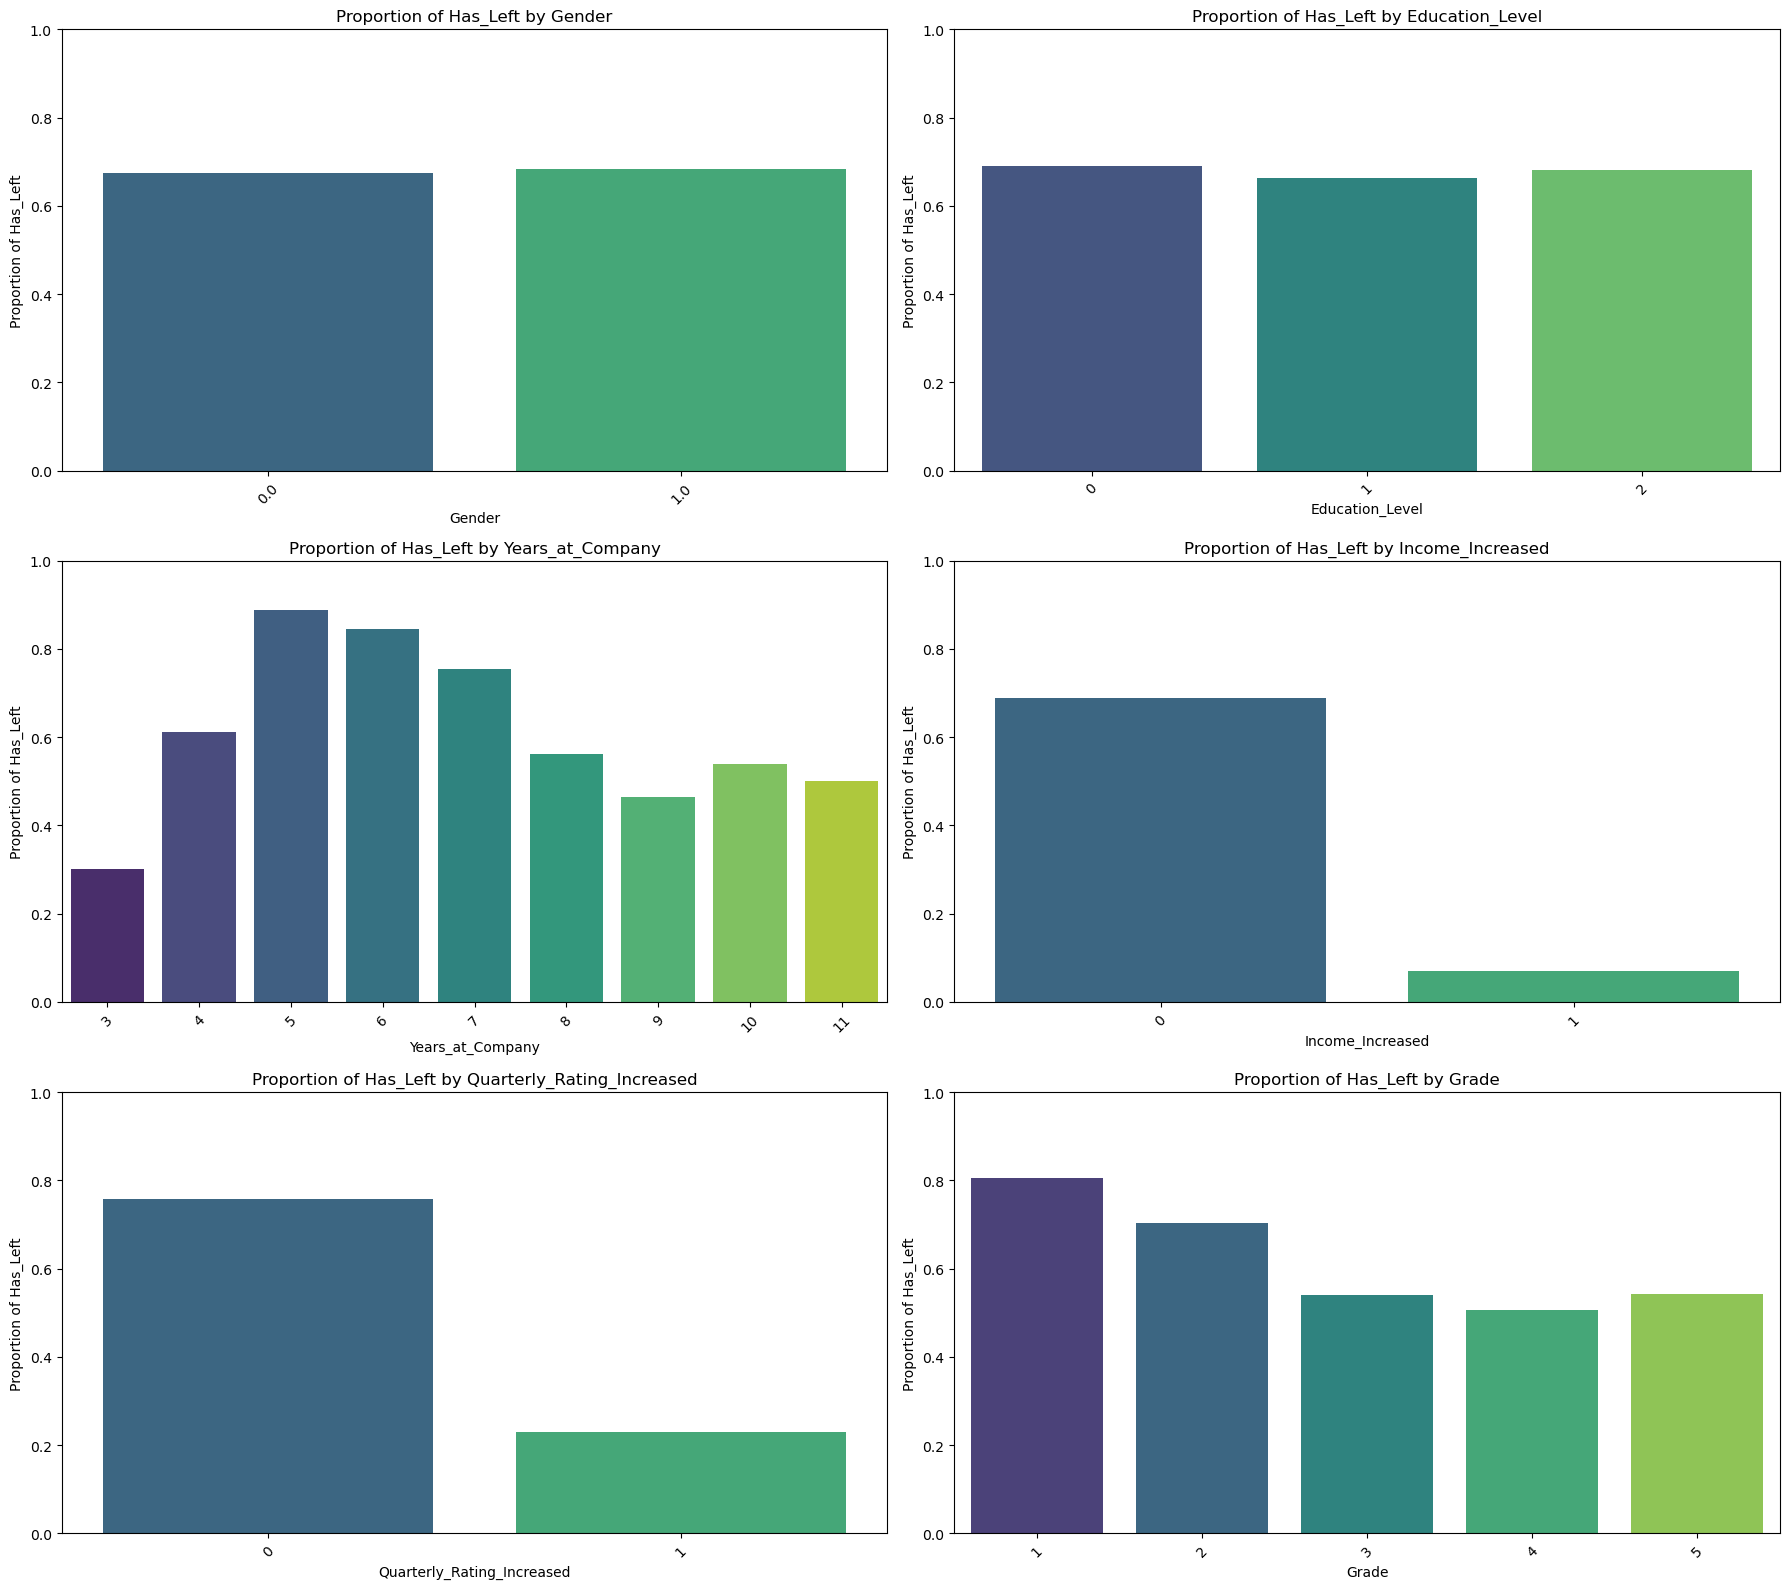

In [146]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Loop through categorical columns and plot
for i, col in enumerate(catColumns):
    plt.subplot(3, 2, i + 1)  # Adjust the grid size according to the number of columns
    
    # Calculate proportions of 'Has_Left' for each category
    proportions = df_encoded.groupby(col)[label].mean().reset_index()
    proportions.columns = [col, f'Proportion_{label}']

    # Plot
    sns.barplot(x=col, y=f'Proportion_{label}', data=proportions, palette='viridis')
    plt.title(f'Proportion of {label} by {col}')
    plt.ylabel(f'Proportion of {label}')
    plt.xlabel(col)
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for proportion
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Model Building

In [66]:
x_train,x_test,y_train,y_test = train_test_split(df_encoded.drop("Has_Left",axis=1),df_encoded["Has_Left"],test_size=0.2,random_state=10)

In [ ]:
# TODO: Determine the 1th and 99th percentiles for 'lead_time'
low_threshold, high_threshold = np.percentile(x_train['lead_time'], [1, 99])  # Hint: Use the numpy function to calculate percentiles. Remember to specify the percentile values as a list.

# Identify the indices of rows that are not considered outliers
not_outliers = X_train['lead_time'].between(low_threshold, high_threshold)   # Hint: Use a comparison operation to generate a boolean mask where values are between the low and high thresholds.

# Count the number of outliers
num_outliers = np.sum(~not_outliers)

print(num_outliers)

In [80]:
x_train

Gender  City_0  City_1  City_2  City_3  City_4  Education_Level  \
37       1.0       1       0       0       0       1                0   
2368     0.0       0       0       1       1       1                0   
2319     1.0       0       1       0       1       1                1   
85       1.0       0       0       0       0       1                1   
1166     0.0       0       1       0       0       0                2   
...      ...     ...     ...     ...     ...     ...              ...   
2009     1.0       1       1       0       1       0                0   
1180     0.0       0       1       0       0       0                0   
1344     0.0       1       0       1       0       0                0   
527      1.0       0       0       0       0       1                2   
1289     0.0       0       1       1       0       1                2   

      Years_at_Company  Age_Mean  Income_Mean  Income_Max  Income_Min  \
37                   5      49.0      89367.0       89367       89367   
2368                 5      36.0      35607.0       35607       35607   
2319                 5      31.6      38744.0       38744       38744   
85                   4      30.0      60332.0       60332       60332   
1166                 5      33.5      47651.0       47651       47651   
...                ...       ...          ...         ...         ...   
2009                 4      34.0      29642.0       29642       29642   
1180                 5      32.0      44566.0       44566       44566   
1344                 5      29.0      25873.0       25873       25873   
527                  5      30.0      49664.0       49664       49664   
1289                 3      35.5      84573.0       84573       84573   

      Grade_Mean  Total_Business_Value_Mean  Quarterly_Rating_Mean  \
37           3.0               55155.000000               1.000000   
2368         1.0               70425.000000               1.375000   
2319         1.0              277925.333333               1.933333   
85           2.0              250464.000000               1.600000   
1166         2.0               90750.000000               1.000000   
...          ...                        ...                    ...   
2009         1.0                   0.000000               1.000000   
1180         2.0               33626.666667               1.000000   
1344         1.0                   0.000000               1.000000   
527          2.0                   0.000000               1.000000   
1289         3.0                   0.000000               1.000000   

      Income_Increased  Quarterly_Rating_Increased   Age  Grade  \
37                   0                           0  49.0      3   
2368                 0                           0  36.0      1   
2319                 0                           1  32.0      1   
85                   0                           1  30.0      2   
1166                 0                           0  34.0      2   
...                ...                         ...   ...    ...   
2009                 0                           0  34.0      1   
1180                 0                           0  32.0      2   
1344                 0                           0  29.0      1   
527                  0                           0  30.0      2   
1289                 0                           0  36.0      3   

      Total_Business_Value_Sum  
37                      110310  
2368                    563400  
2319                   4168880  
85                     1252320  
1166                    363000  
...                        ...  
2009                         0  
1180                    100880  
1344                         0  
527                          0  
1289                         0  

[1904 rows x 20 columns]

Training simple RF...


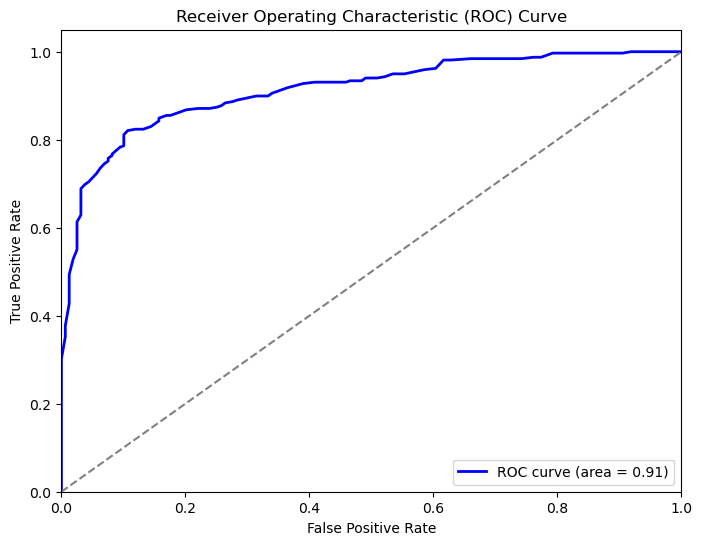

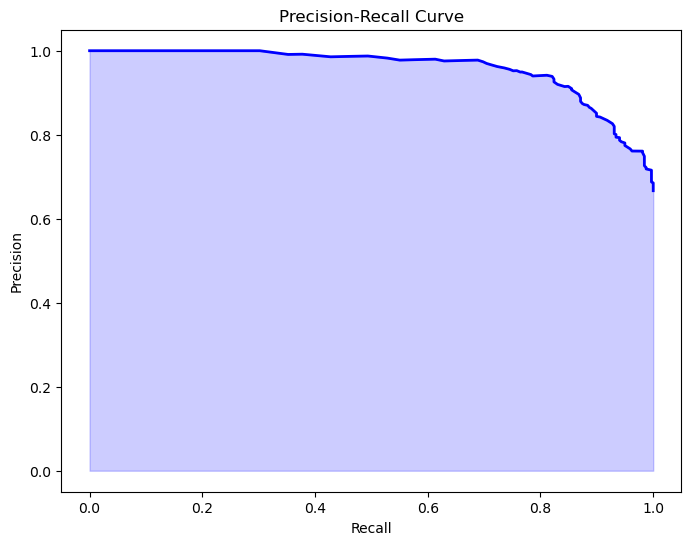

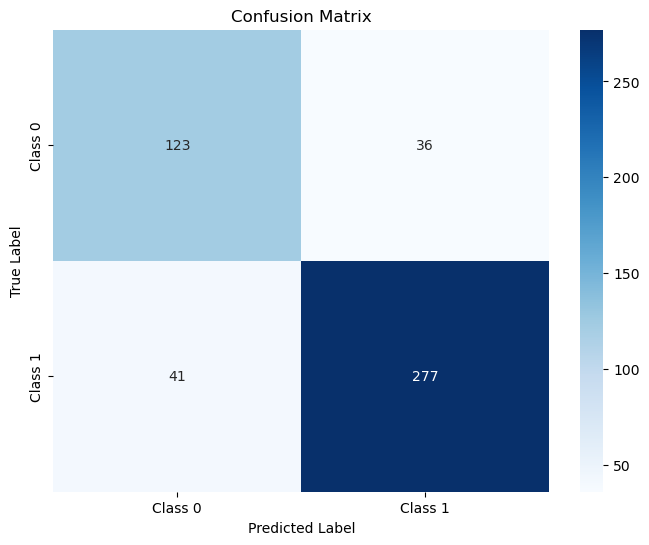

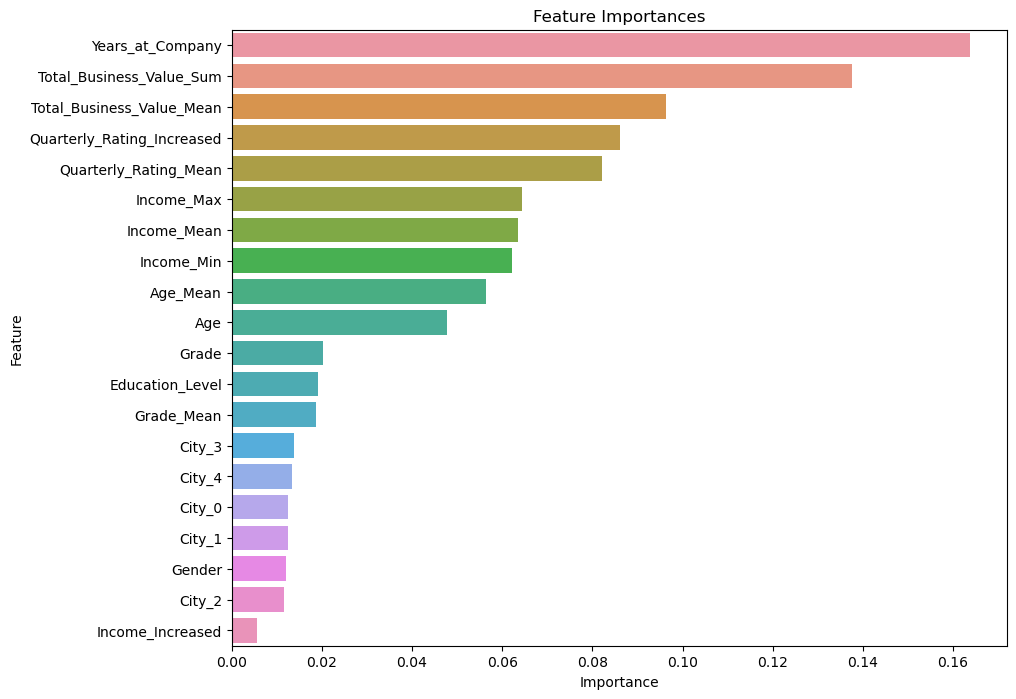

Training simple GB...


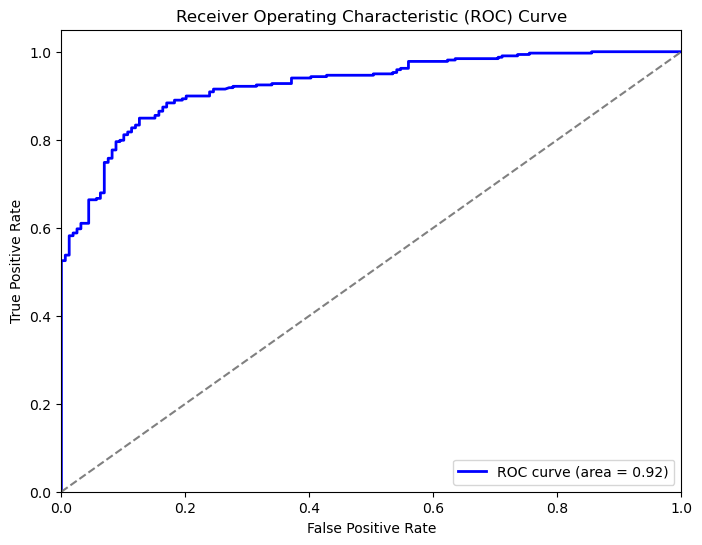

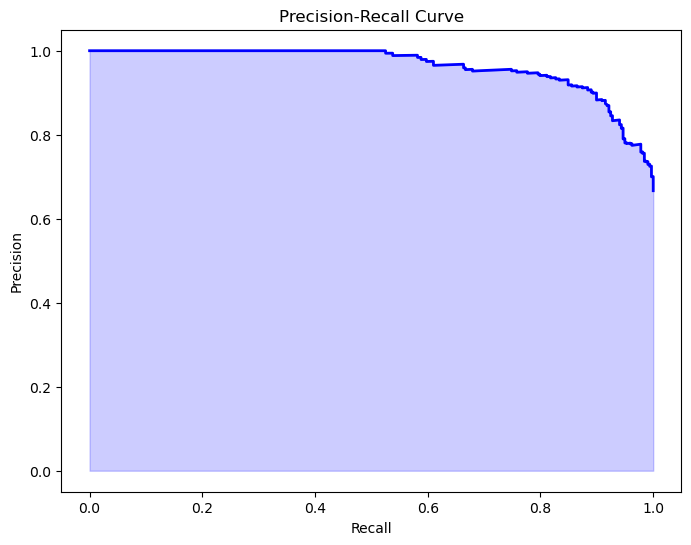

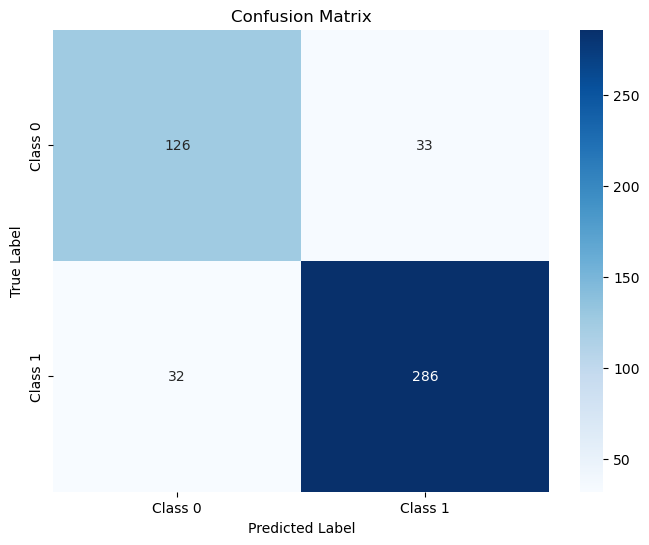

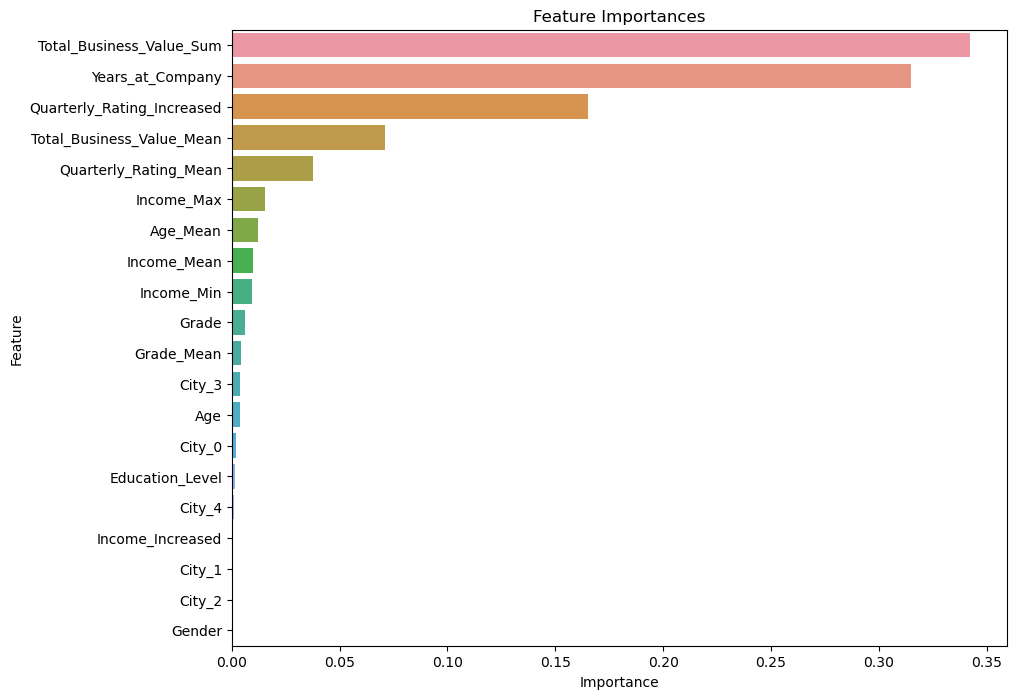

Training simple xgb...


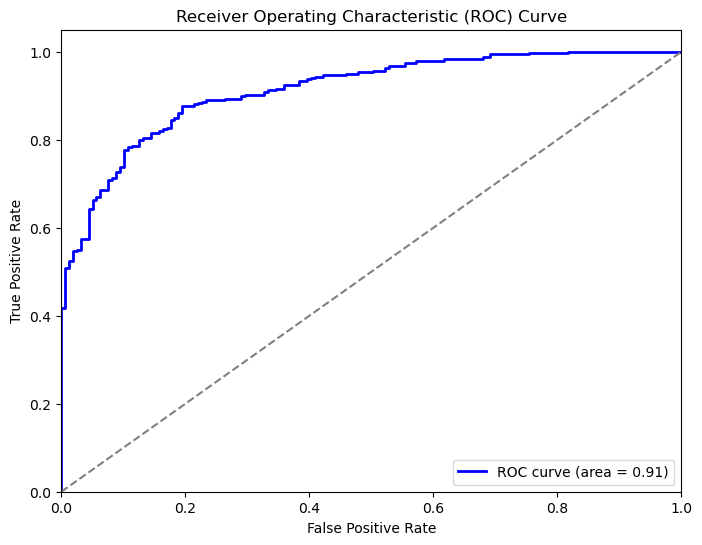

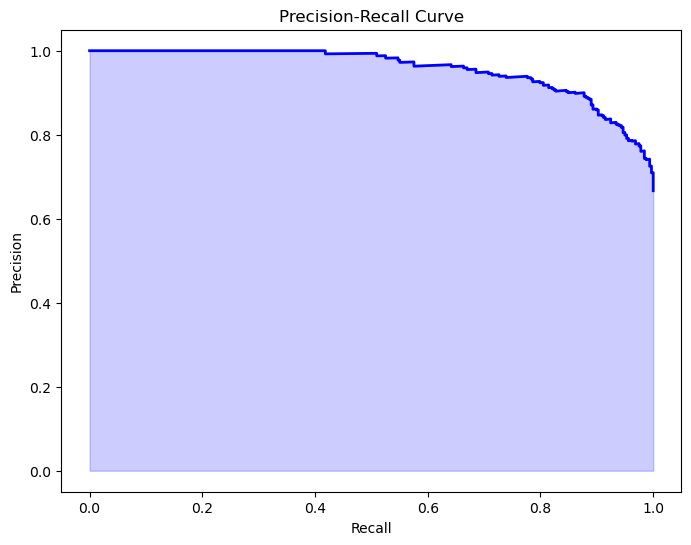

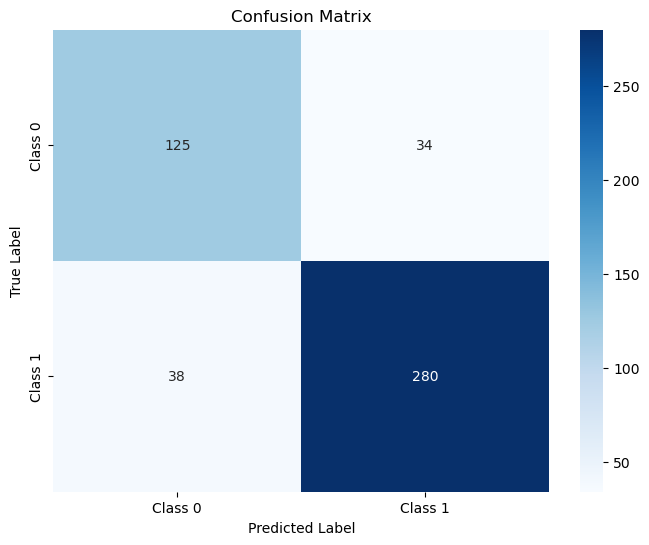

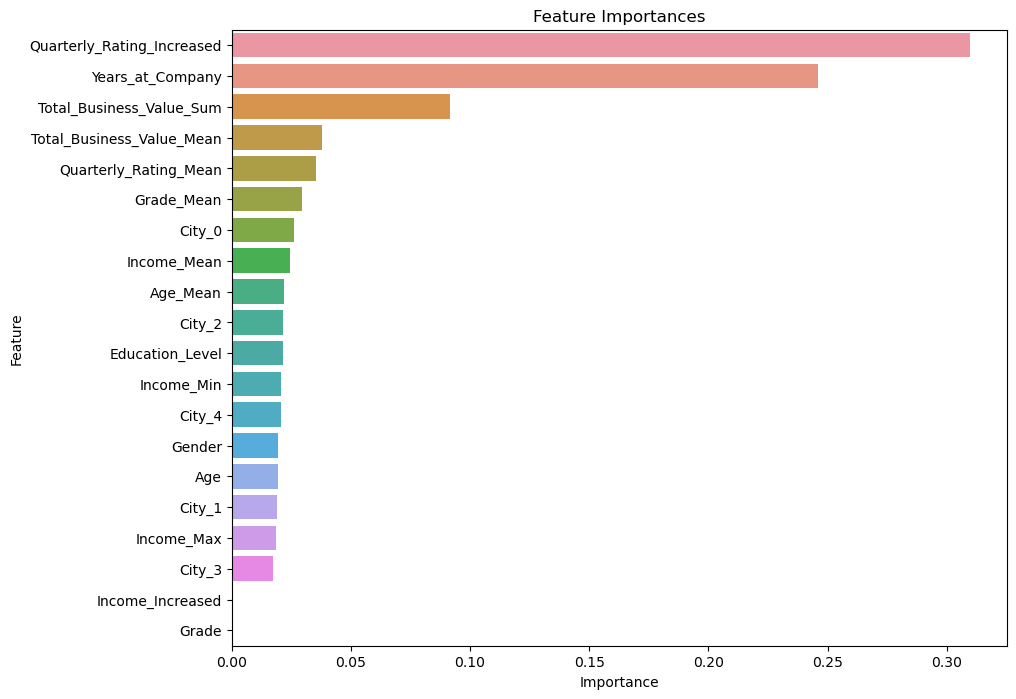

Training simple lgbm...
[LightGBM] [Info] Number of positive: 1298, number of negative: 606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1695
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681723 -> initscore=0.761700
[LightGBM] [Info] Start training from score 0.761700


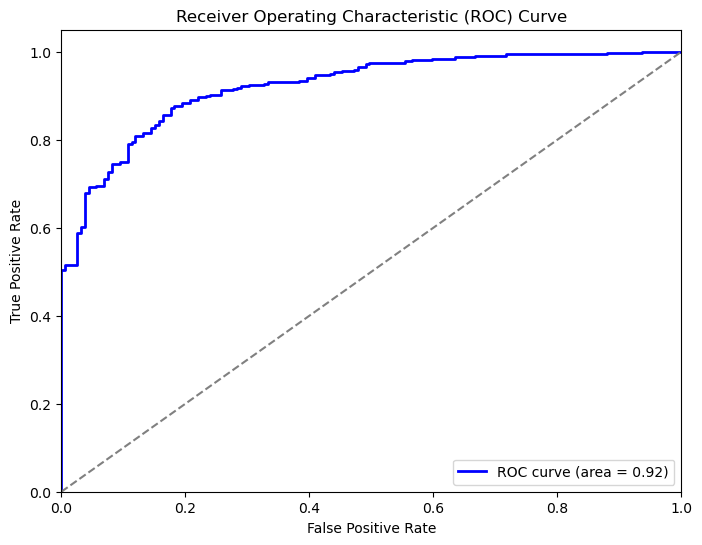

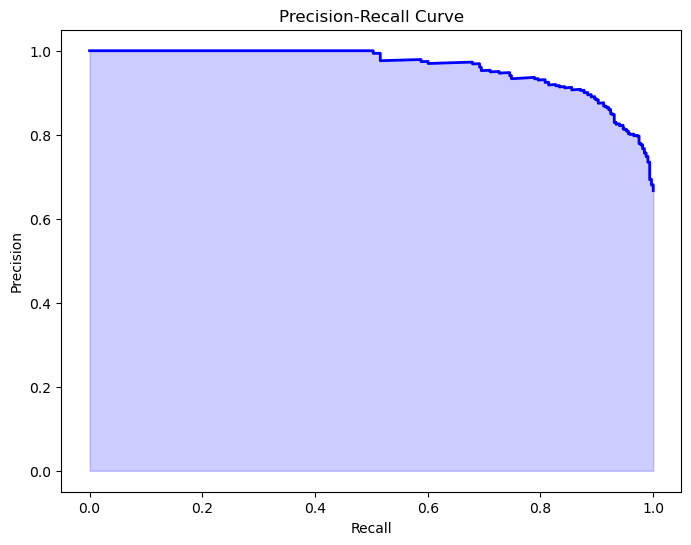

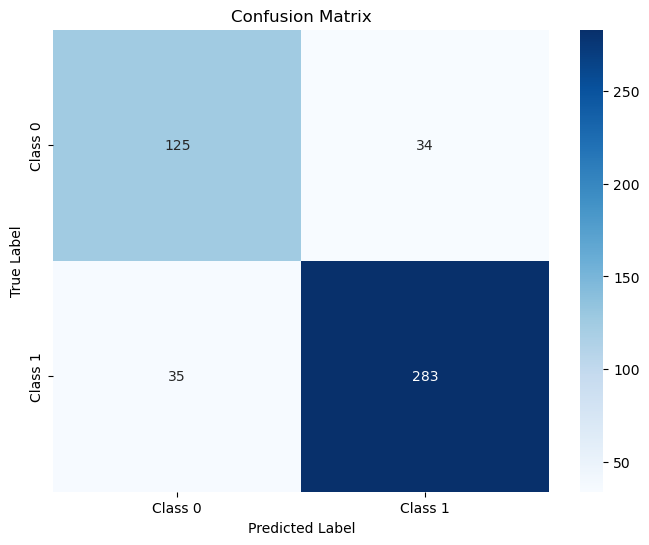

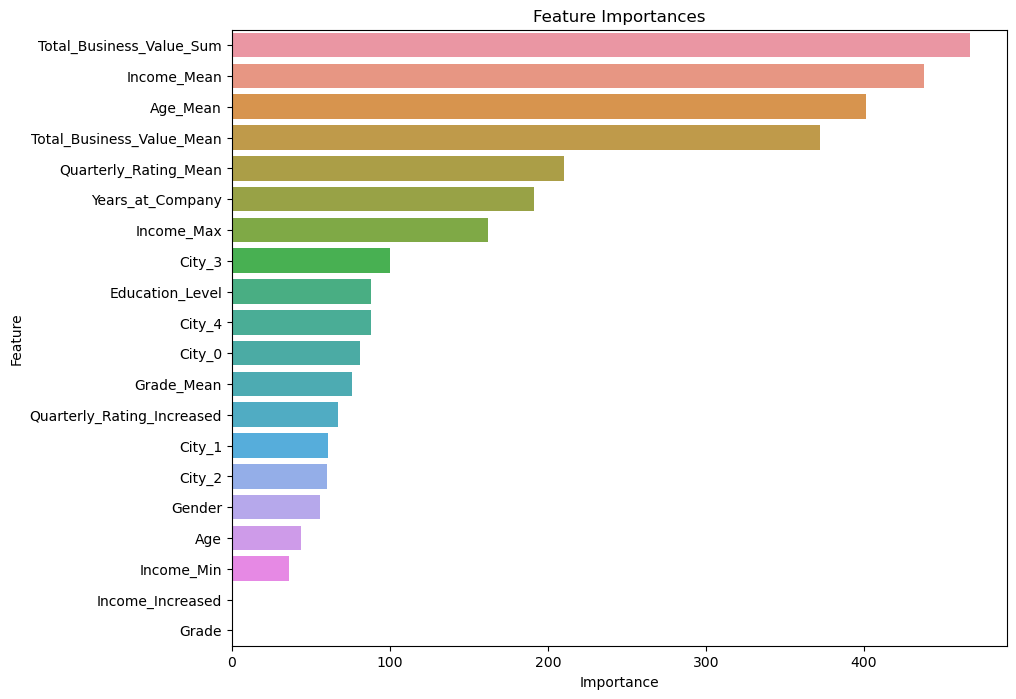

Training TunedRF...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


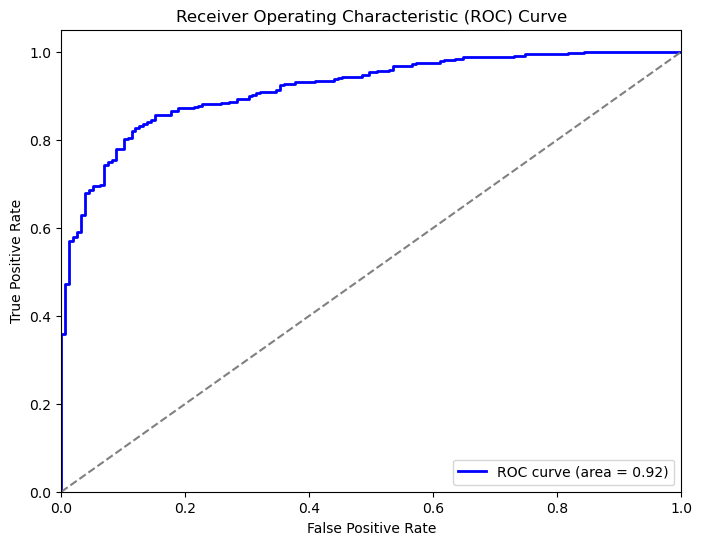

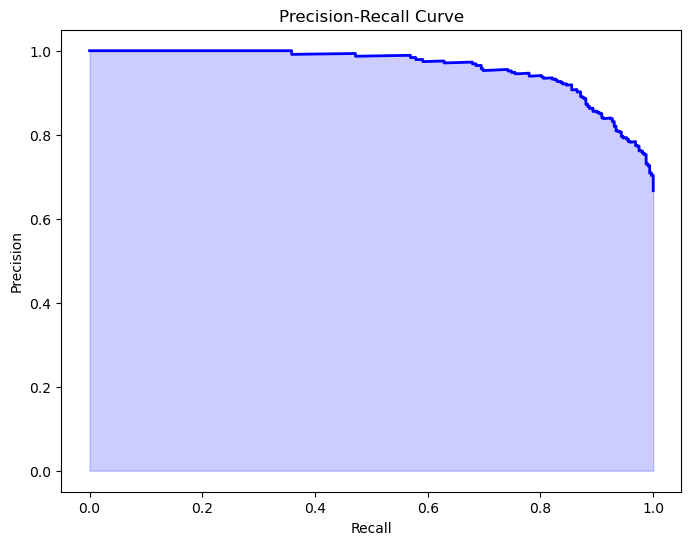

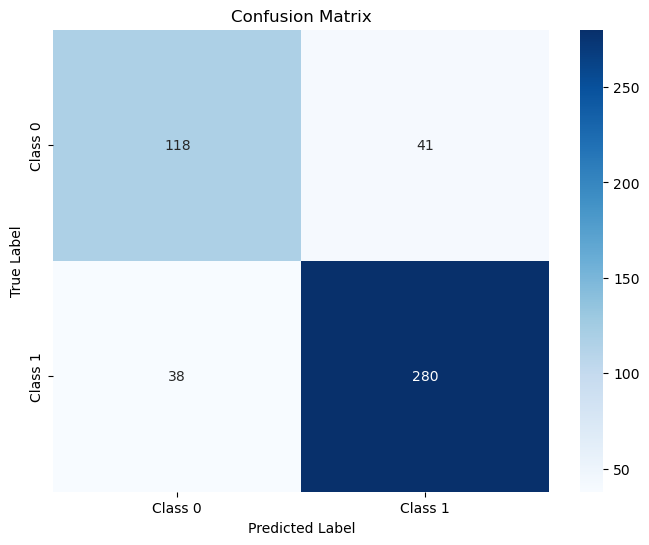

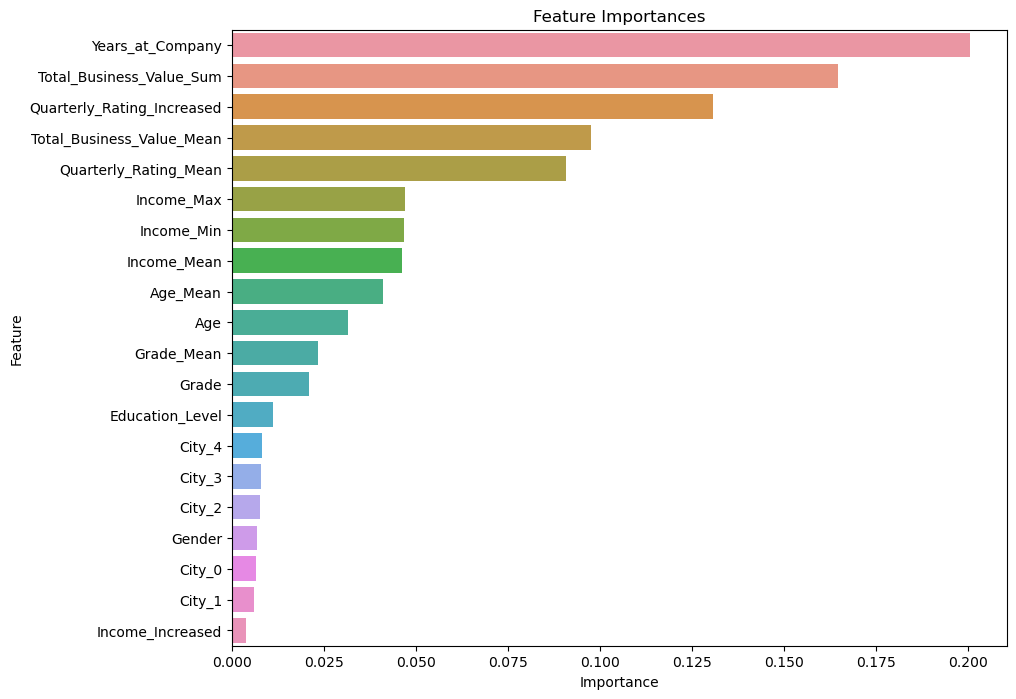

Training TunedGB...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


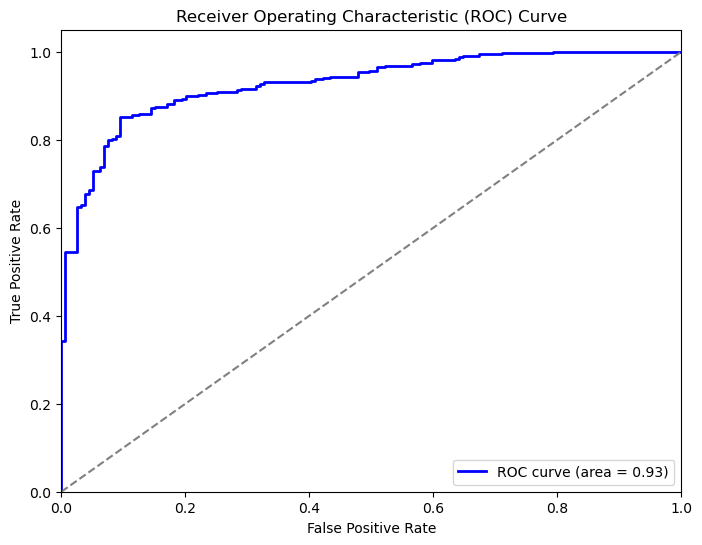

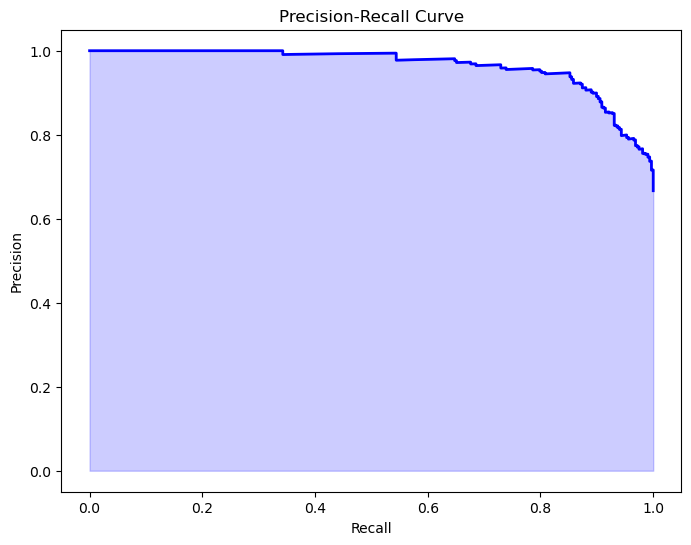

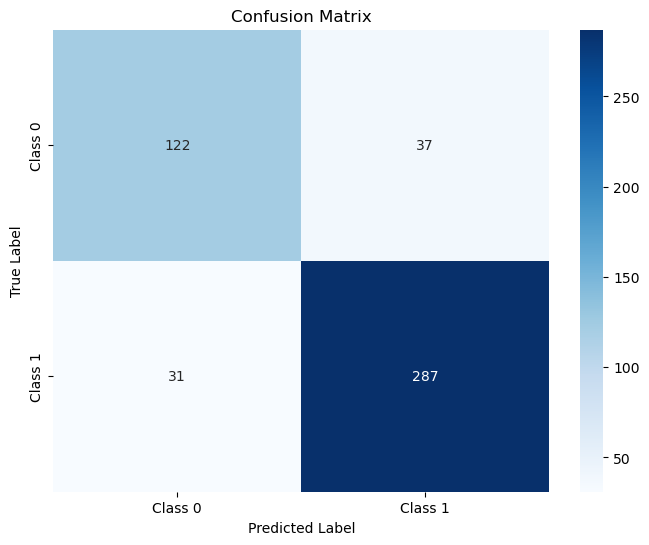

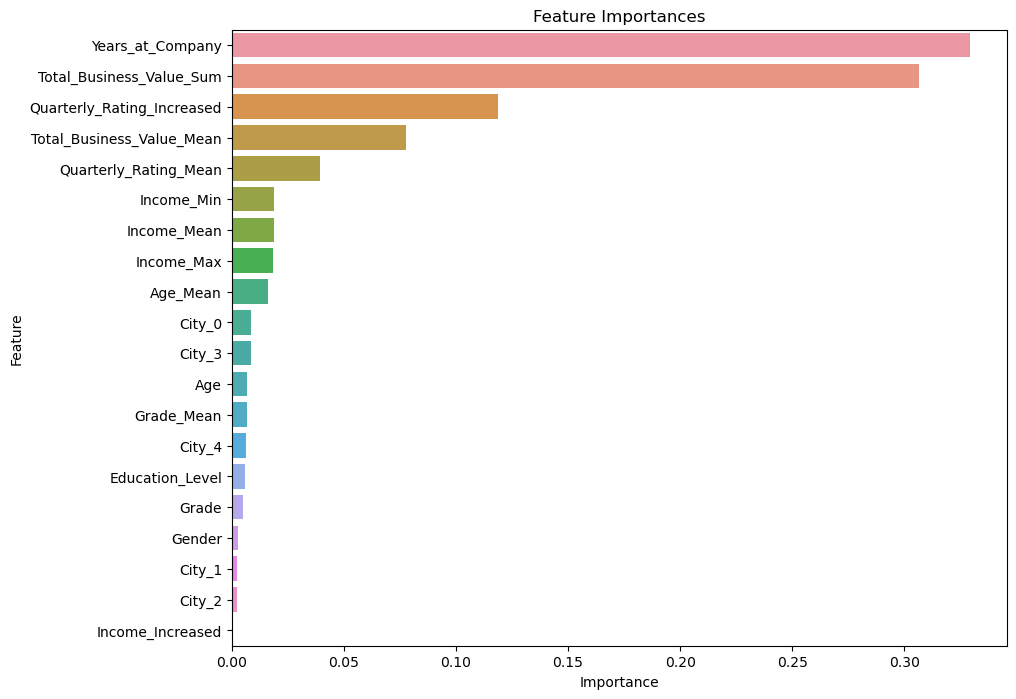

Training TunedXgb...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


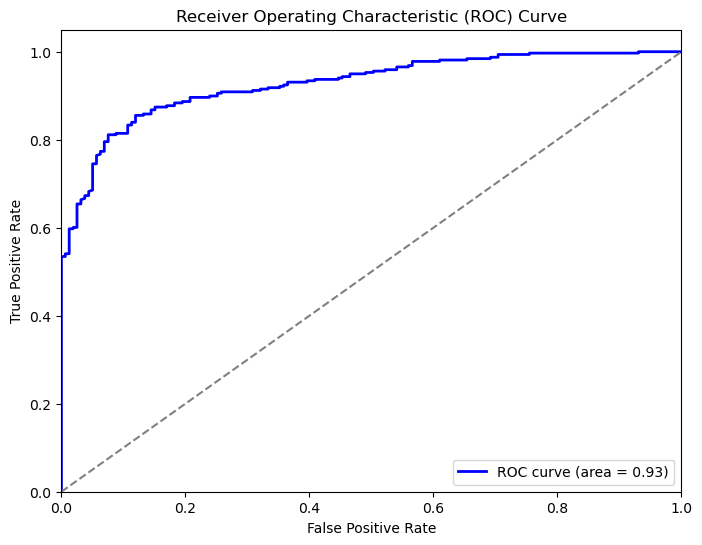

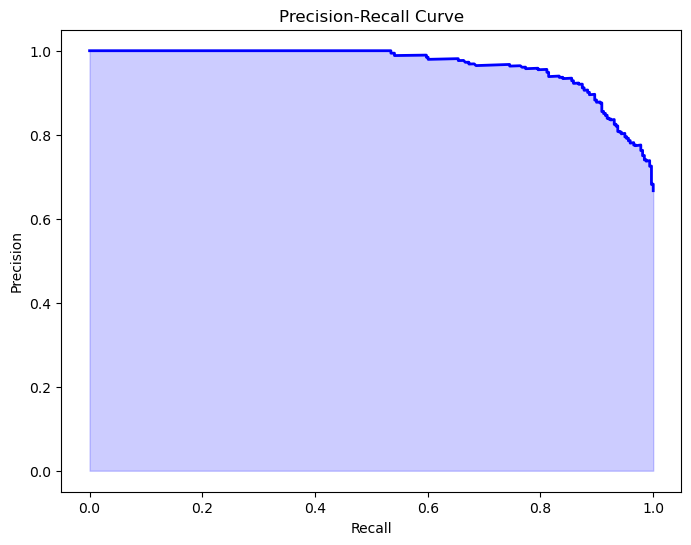

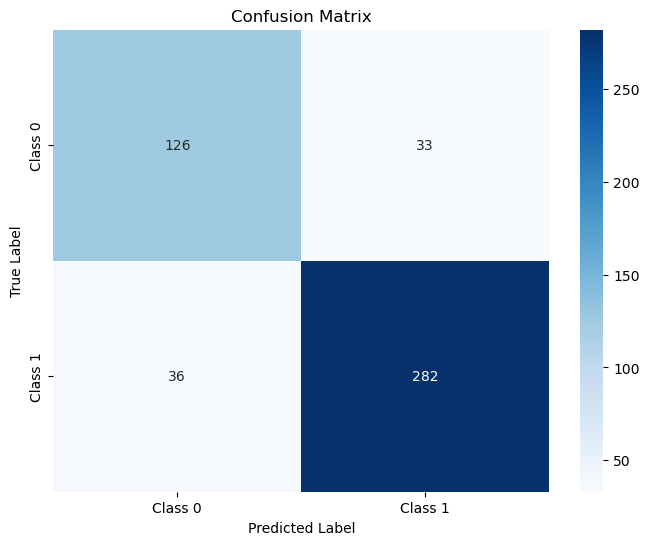

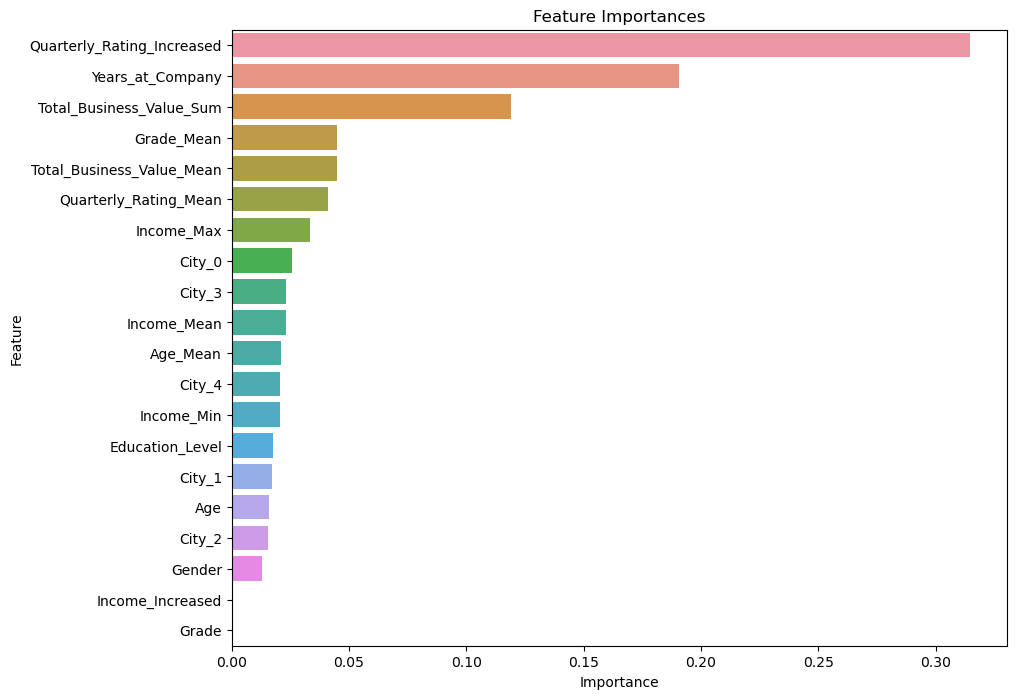

Training TunedLgbm...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1298, number of negative: 606
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1695
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681723 -> initscore=0.761700
[LightGBM] [Info] Start training from score 0.761700
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

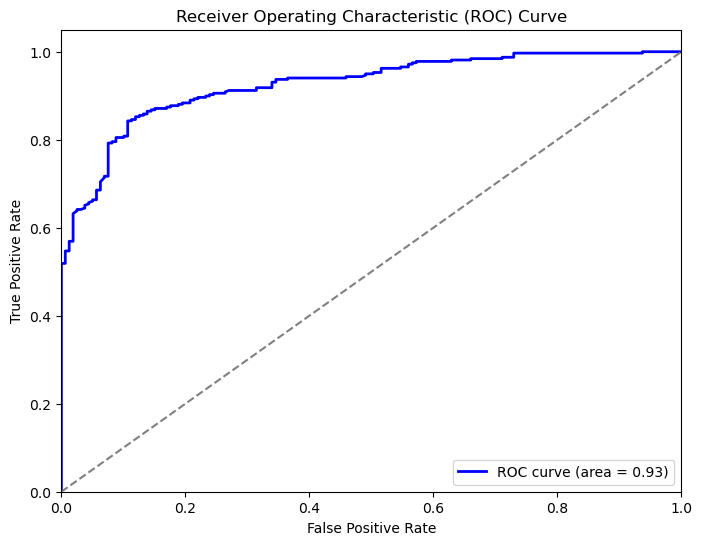

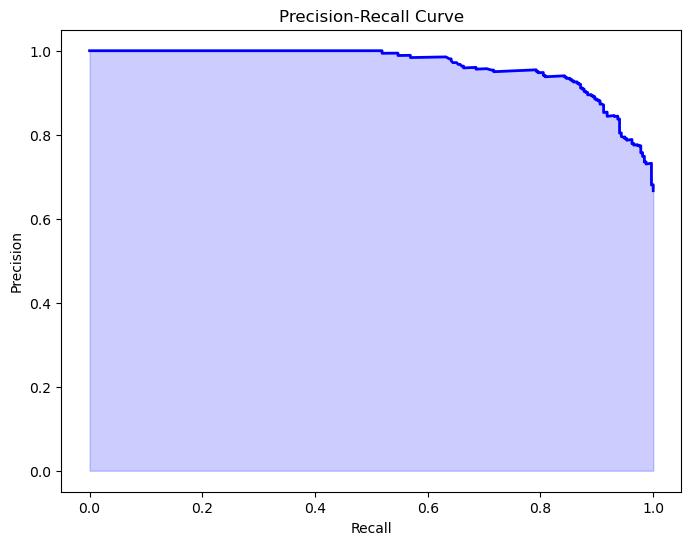

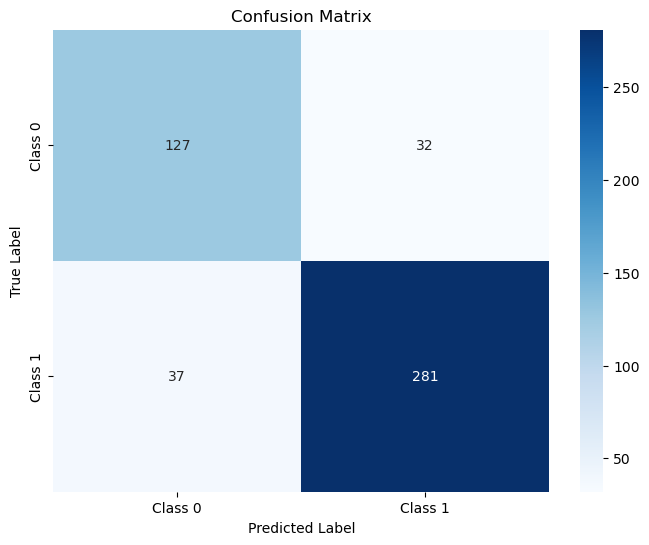

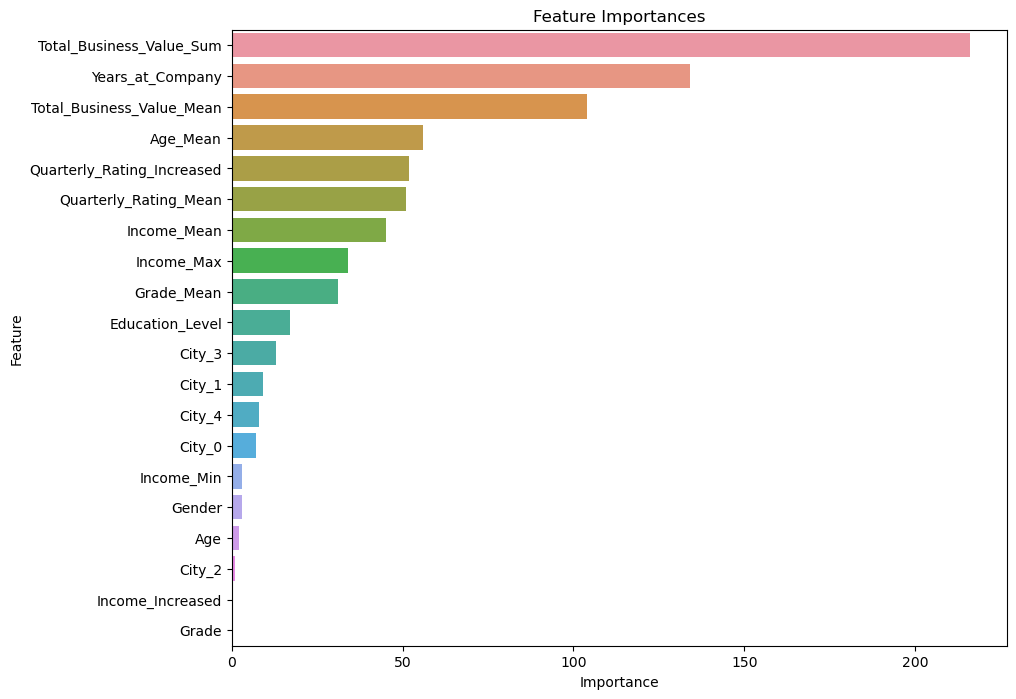

Model  Overall Precision  Overall Recall  Overall F1 Score  \
0    simple RF           0.884984        0.871069          0.877971   
1    simple GB           0.896552        0.899371          0.897959   
2   simple xgb           0.891720        0.880503          0.886076   
3  simple lgbm           0.892744        0.889937          0.891339   
4      TunedRF           0.872274        0.880503          0.876369   
5      TunedGB           0.885802        0.902516          0.894081   
6     TunedXgb           0.895238        0.886792          0.890995   
7    TunedLgbm           0.897764        0.883648          0.890650   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
0           0.750000        0.773585          0.761610           0.884984   
1           0.797468        0.792453          0.794953           0.896552   
2           0.766871        0.786164          0.776398           0.891720   
3           0.781250        0.786164          0.783699           0.892744   
4           0.756410        0.742138          0.749206           0.872274   
5           0.797386        0.767296          0.782051           0.885802   
6           0.777778        0.792453          0.785047           0.895238   
7           0.774390        0.798742          0.786378           0.897764   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
0        0.871069          0.877971  0.913492  
1        0.899371          0.897959  0.924143  
2        0.880503          0.886076  0.913710  
3        0.889937          0.891339  0.921680  
4        0.880503          0.876369  0.917349  
5        0.902516          0.894081  0.927910  
6        0.886792          0.890995  0.927268  
7        0.883648          0.890650  0.925062

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             classification_report, roc_curve, auc, 
                             precision_recall_curve, roc_auc_score, confusion_matrix)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from scipy.stats import randint, uniform


# Define parameter grids
param_dist_rf = {
    'n_estimators': [10,40,80,120,200,300,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'class_weight': ["balanced", "balanced_subsample", None]
}

param_dist_gb = {
    'n_estimators': [10,40,80,120,200,300,500,700],
    'learning_rate':[0.1, 0.05, 0.01, 0.005, 0.001],
    'max_depth': randint(3, 10),
    'subsample': [0.6, 0.8, 1.0],
    'loss': ['log_loss', 'exponential'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

param_dist_xgb = {
    'n_estimators': [10,40,80,120,200,300,500,700],
    'learning_rate':[0.1, 0.05, 0.01, 0.005, 0.001],
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5)
}


param_dist_lgb = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 1000),
    'min_child_samples': randint(5, 50),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Initialize models with RandomizedSearchCV
TunedRF = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist_rf,
      scoring="f1",
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

TunedGB = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist_gb,
    scoring="f1",
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

TunedXgb = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss'),
      scoring="f1",
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

TunedLgbm =  RandomizedSearchCV(
    lgb.LGBMClassifier(),
      scoring="f1",
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)



def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates a classification model and returns a dictionary with various metrics and plots.
    
    Parameters:
    - model: The trained classification model.
    - X_train: Training feature set.
    - X_test: Test feature set.
    - y_train: Training labels.
    - y_test: Test labels.
    
    Returns:
    - metrics_dict: Dictionary containing all metrics and scores.
    - feature_importances_df: DataFrame containing feature importances if available.
    """
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Compute metrics
    overall_precision = precision_score(y_test, y_pred_test)
    overall_recall = recall_score(y_test, y_pred_test)
    overall_f1 = f1_score(y_test, y_pred_test)
    
    # Compute class-wise metrics
    class_report = classification_report(y_test, y_pred_test, output_dict=True)
    precision_class_0 = class_report['0']['precision']
    recall_class_0 = class_report['0']['recall']
    f1_class_0 = class_report['0']['f1-score']
    precision_class_1 = class_report['1']['precision']
    recall_class_1 = class_report['1']['recall']
    f1_class_1 = class_report['1']['f1-score']
    
    # Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else None
    
    # Prepare the metrics dictionary
    metrics_dict = {
        'Model': model.__class__.__name__,
        'Overall Precision': overall_precision,
        'Overall Recall': overall_recall,
        'Overall F1 Score': overall_f1,
        'Class 0 Precision': precision_class_0,
        'Class 0 Recall': recall_class_0,
        'Class 0 F1 Score': f1_class_0,
        'Class 1 Precision': precision_class_1,
        'Class 1 Recall': recall_class_1,
        'Class 1 F1 Score': f1_class_1,
        'ROC AUC': roc_auc
    }
    
    # Feature importance DataFrame
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X_train.columns if hasattr(X_train, 'columns') else np.arange(len(importances))
        feature_importances_df = pd.DataFrame({
            'Feature': features,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
    else:
        feature_importances_df = pd.DataFrame(columns=['Feature', 'Importance'])
    
    # Plotting
    if y_proba_test is not None:
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba_test)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()
        
        # Plot Precision-Recall Curve
        precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba_test)
        plt.figure(figsize=(8, 6))
        plt.plot(recall_pr, precision_pr, color='blue', lw=2)
        plt.fill_between(recall_pr, precision_pr, alpha=0.2, color='blue')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot Feature Importances
    if not feature_importances_df.empty:
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
        plt.title('Feature Importances')
        plt.show()

    return metrics_dict, feature_importances_df

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple models, and return a DataFrame with their performance metrics.
    
    Parameters:
    - models: Dictionary of model names and model instances.
    - X_train: Training feature set.
    - X_test: Test feature set.
    - y_train: Training labels.
    - y_test: Test labels.
    
    Returns:
    - all_results_df: DataFrame containing metrics for all models.
    """
    all_results = []
    
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        # Fit model
        model.fit(X_train, y_train)
        #model.
        # Evaluate model
        metrics_dict, _ = evaluate_model(model.best_estimator_ if hasattr(model, 'best_estimator_') else model,
                                         X_train, X_test, y_train, y_test)
        metrics_dict['Model'] = model_name
        all_results.append(metrics_dict)
    
    # Combine results into a single DataFrame
    all_results_df = pd.DataFrame(all_results)
    return all_results_df


# Define models dictionary
models = {
       'simple RF' : RandomForestClassifier(oob_score=True),
    'simple GB' : GradientBoostingClassifier(),
    'simple xgb' : XGBClassifier(eval_metric='logloss'),
    'simple lgbm' : lgb.LGBMClassifier(),
    'TunedRF': TunedRF,
    'TunedGB': TunedGB,
    'TunedXgb': TunedXgb,
    'TunedLgbm': TunedLgbm
}

# Train and evaluate models
all_results_df = train_and_evaluate(models, x_train, x_test, y_train, y_test)

# Print results DataFrame
display(all_results_df)

In [82]:
all_results_df.sort_values(by=["Overall F1 Score"],ascending=False)

Model  Overall Precision  Overall Recall  Overall F1 Score  \
1    simple GB           0.896552        0.899371          0.897959   
5      TunedGB           0.885802        0.902516          0.894081   
3  simple lgbm           0.892744        0.889937          0.891339   
6     TunedXgb           0.895238        0.886792          0.890995   
7    TunedLgbm           0.897764        0.883648          0.890650   
2   simple xgb           0.891720        0.880503          0.886076   
0    simple RF           0.884984        0.871069          0.877971   
4      TunedRF           0.872274        0.880503          0.876369   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
1           0.797468        0.792453          0.794953           0.896552   
5           0.797386        0.767296          0.782051           0.885802   
3           0.781250        0.786164          0.783699           0.892744   
6           0.777778        0.792453          0.785047           0.895238   
7           0.774390        0.798742          0.786378           0.897764   
2           0.766871        0.786164          0.776398           0.891720   
0           0.750000        0.773585          0.761610           0.884984   
4           0.756410        0.742138          0.749206           0.872274   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
1        0.899371          0.897959  0.924143  
5        0.902516          0.894081  0.927910  
3        0.889937          0.891339  0.921680  
6        0.886792          0.890995  0.927268  
7        0.883648          0.890650  0.925062  
2        0.880503          0.886076  0.913710  
0        0.871069          0.877971  0.913492  
4        0.880503          0.876369  0.917349

# Actionable Insights:

# using SMOTE

In [83]:
x_train,x_test,y_train,y_test = train_test_split(df_encoded.drop("Has_Left",axis=1),df_encoded["Has_Left"],test_size=0.2,random_state=10)

In [92]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({1: 1298, 0: 1298})


Training simple RF...


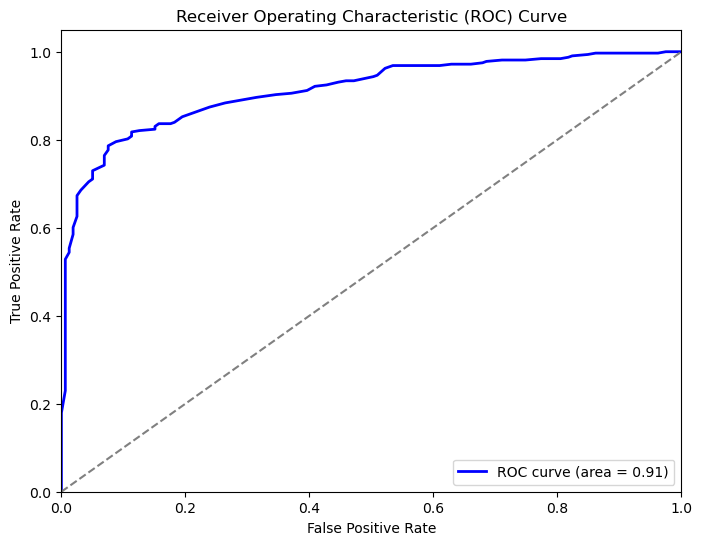

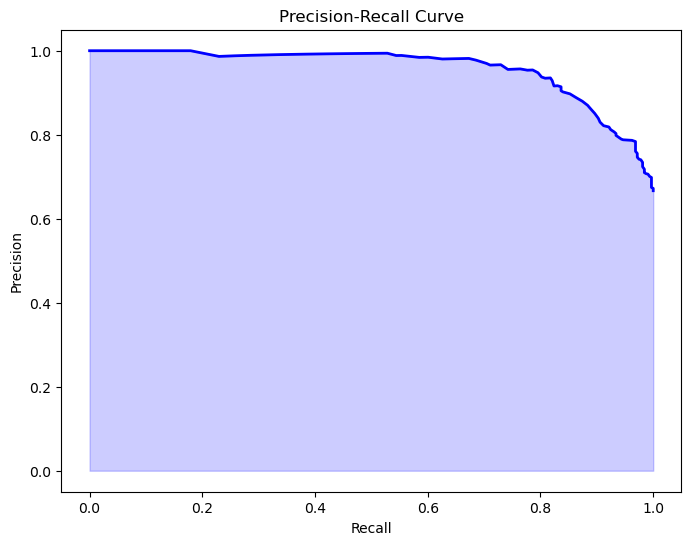

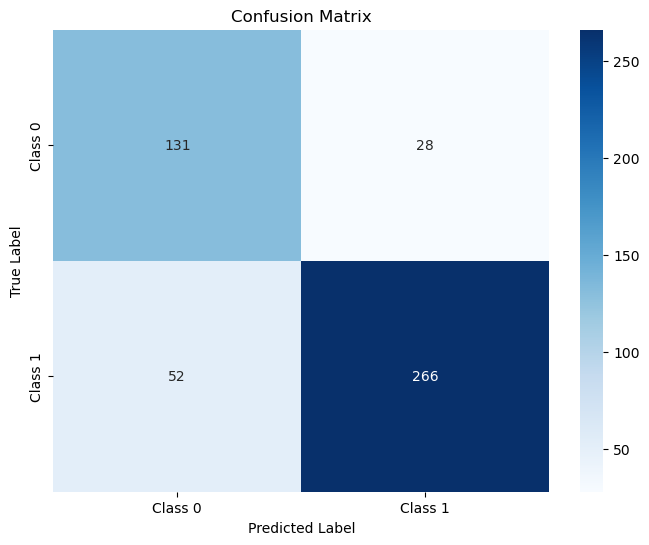

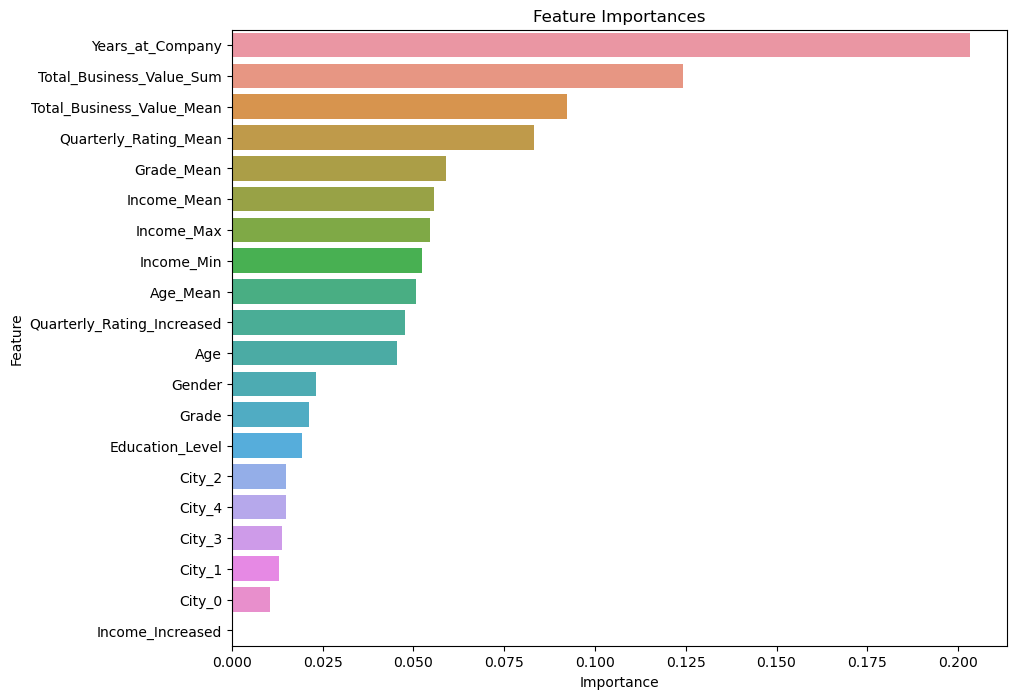

Training simple GB...


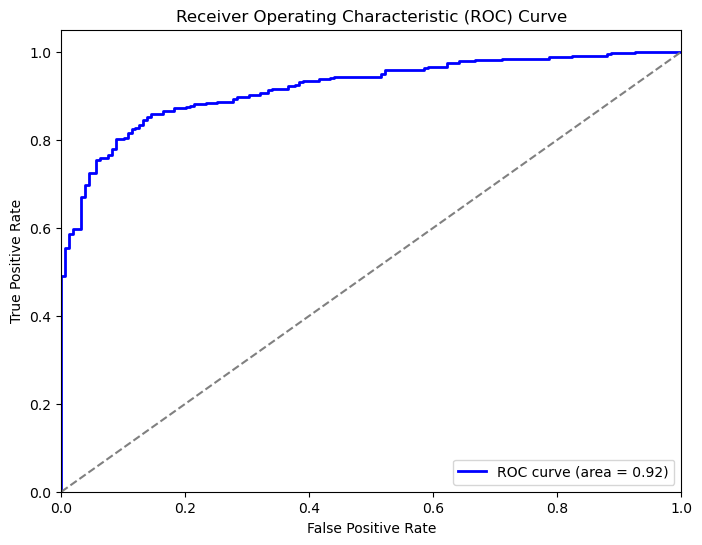

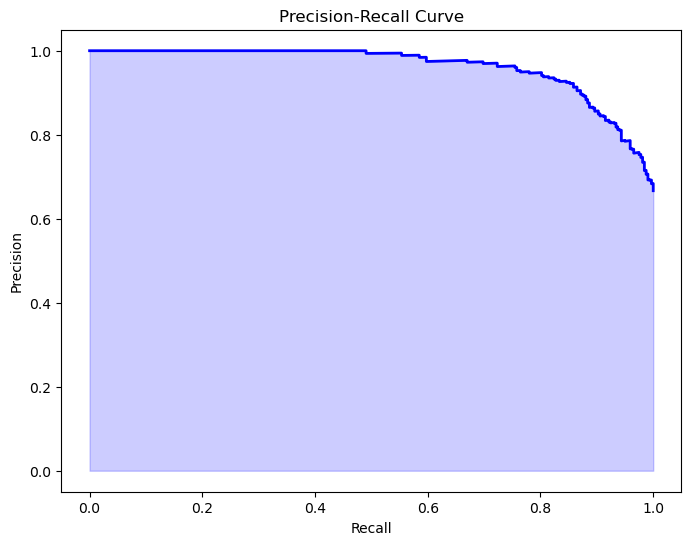

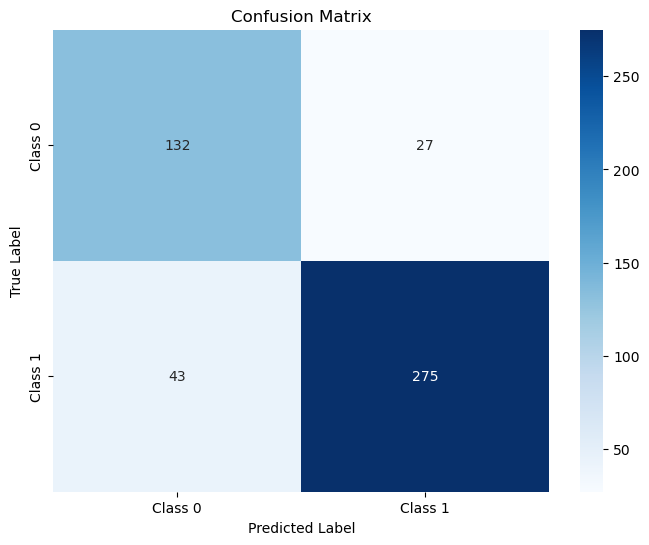

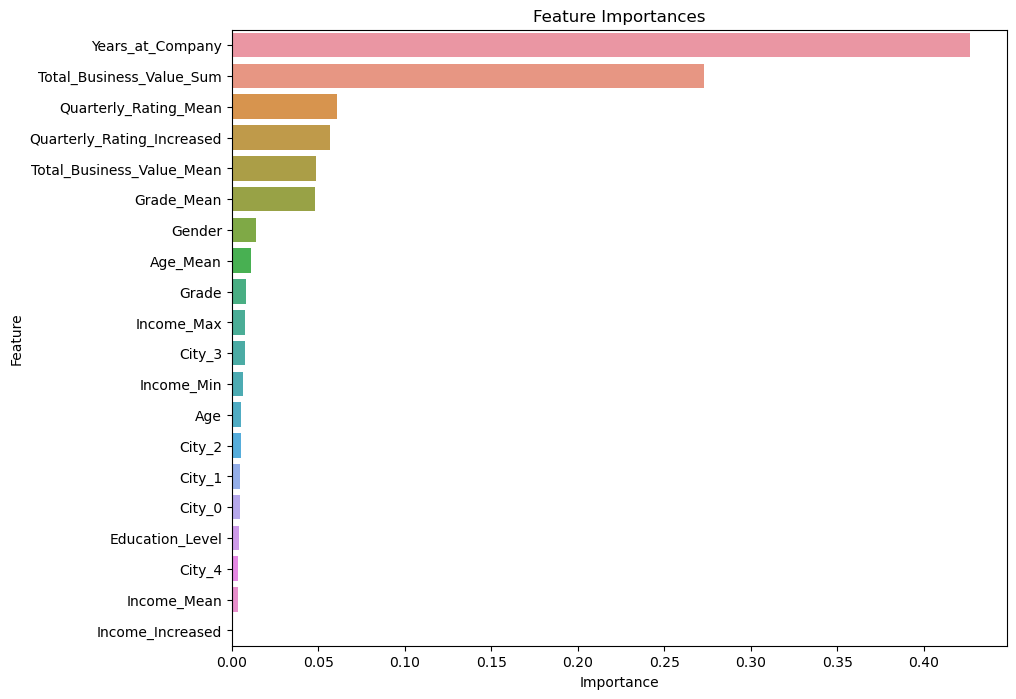

Training simple xgb...


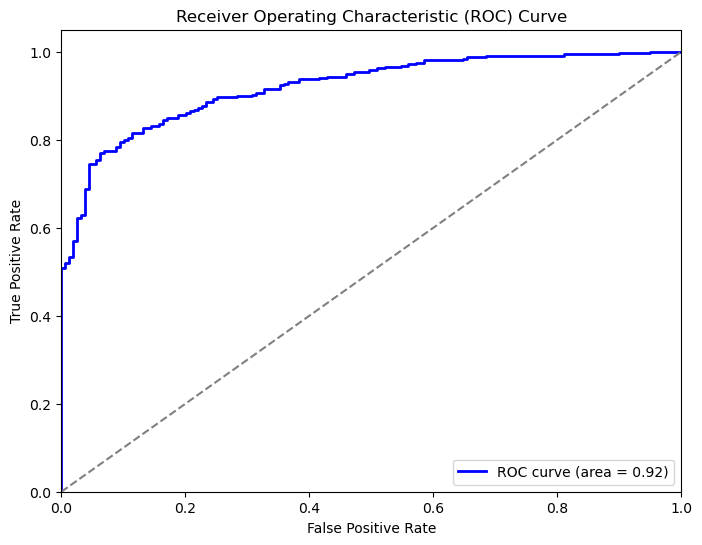

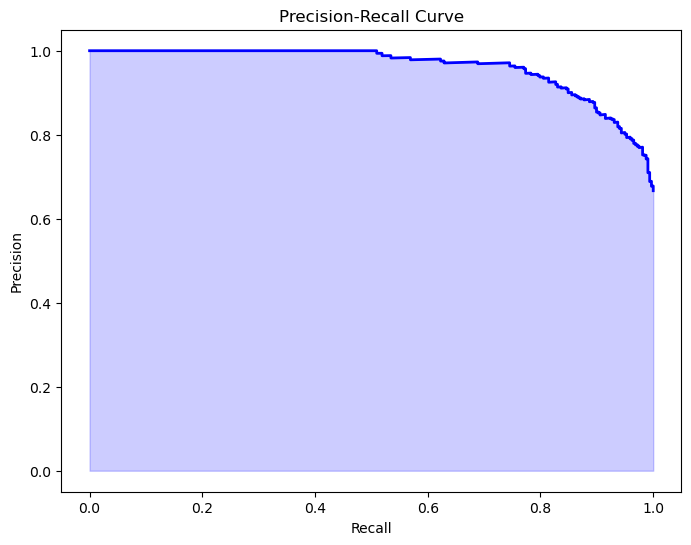

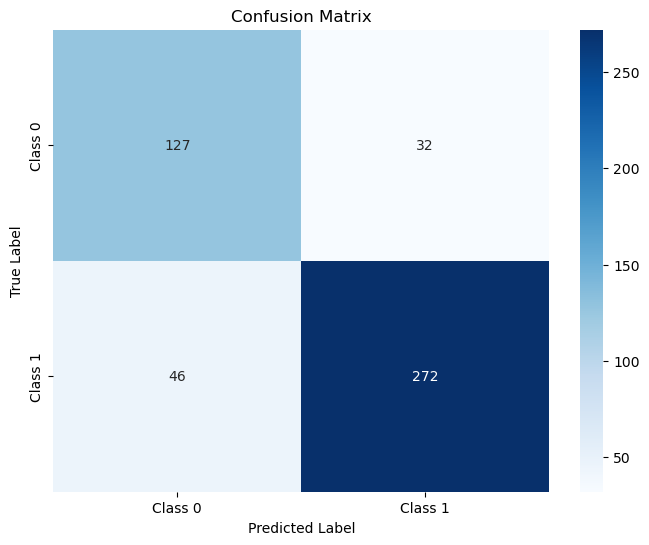

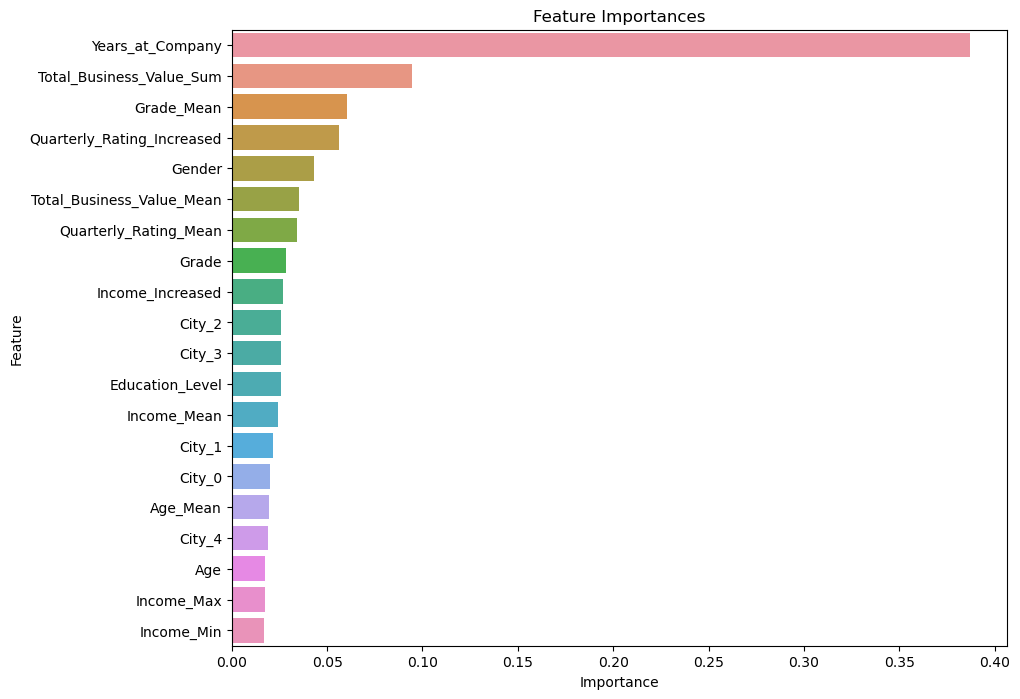

Training simple lgbm...
[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


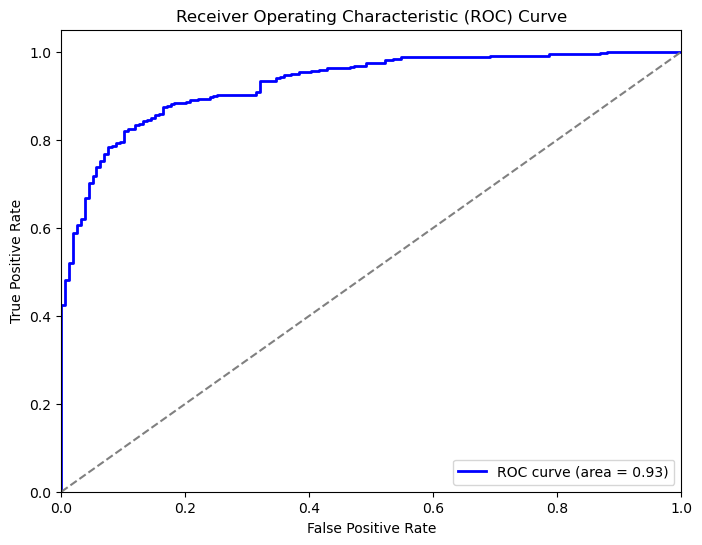

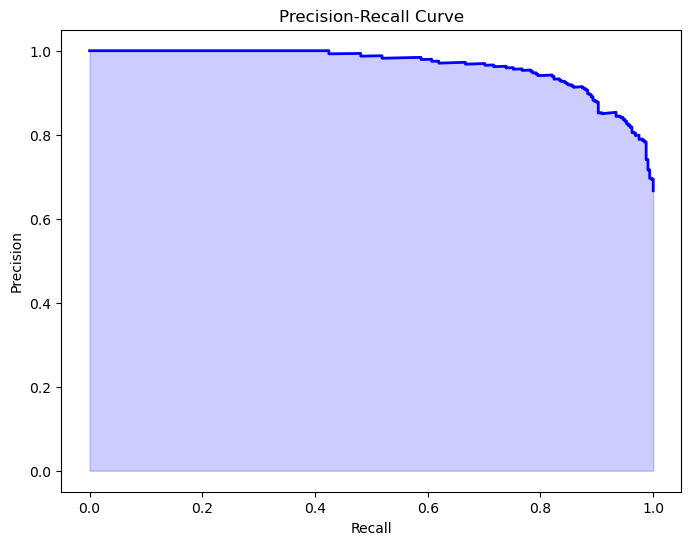

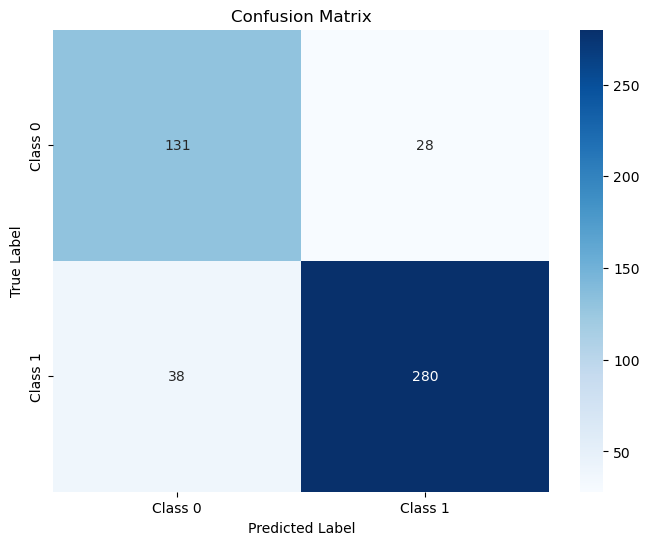

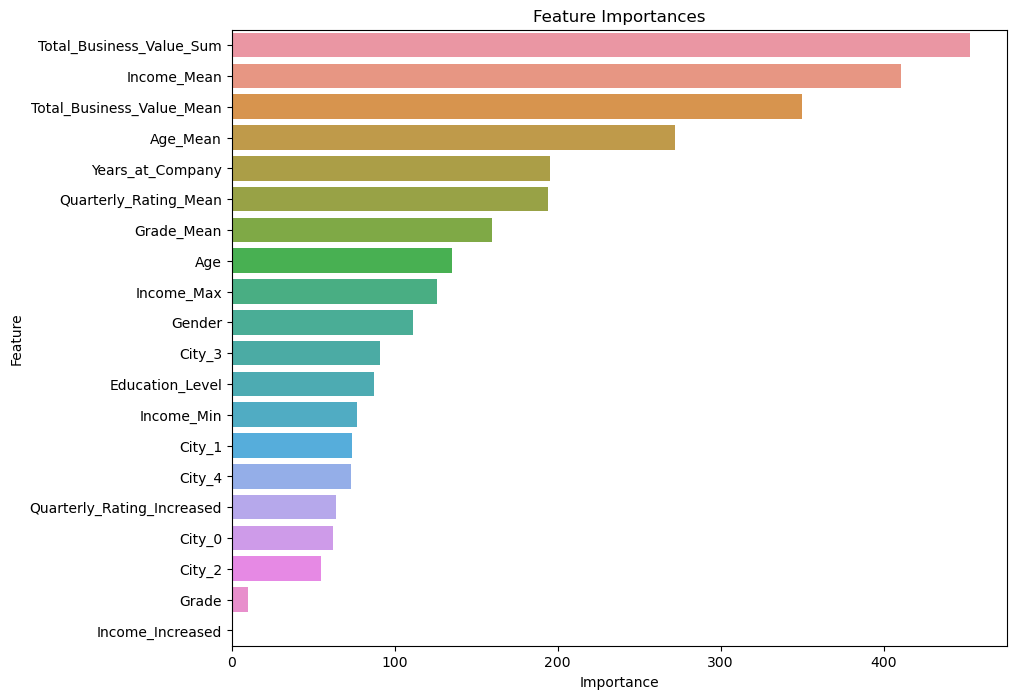

Training TunedRF...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


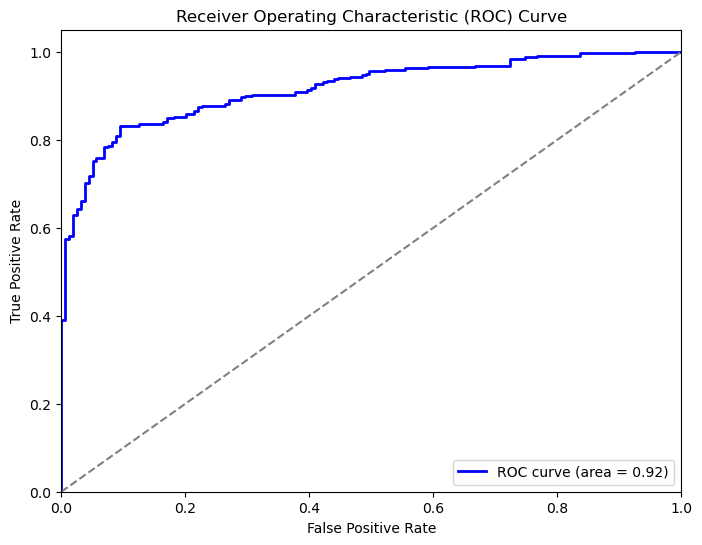

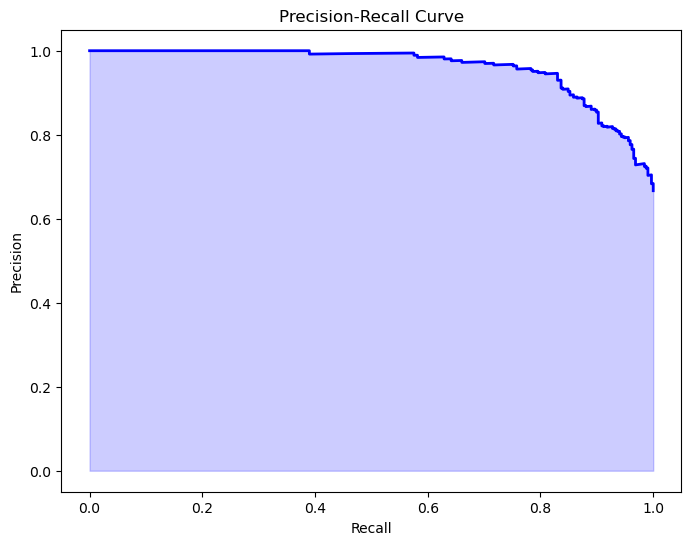

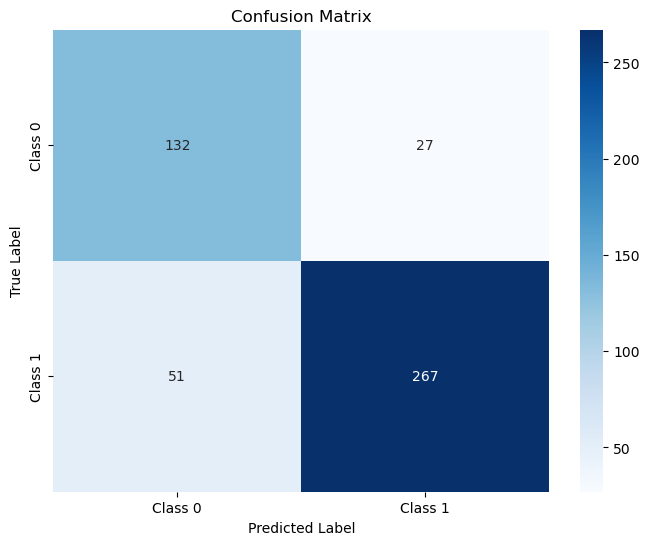

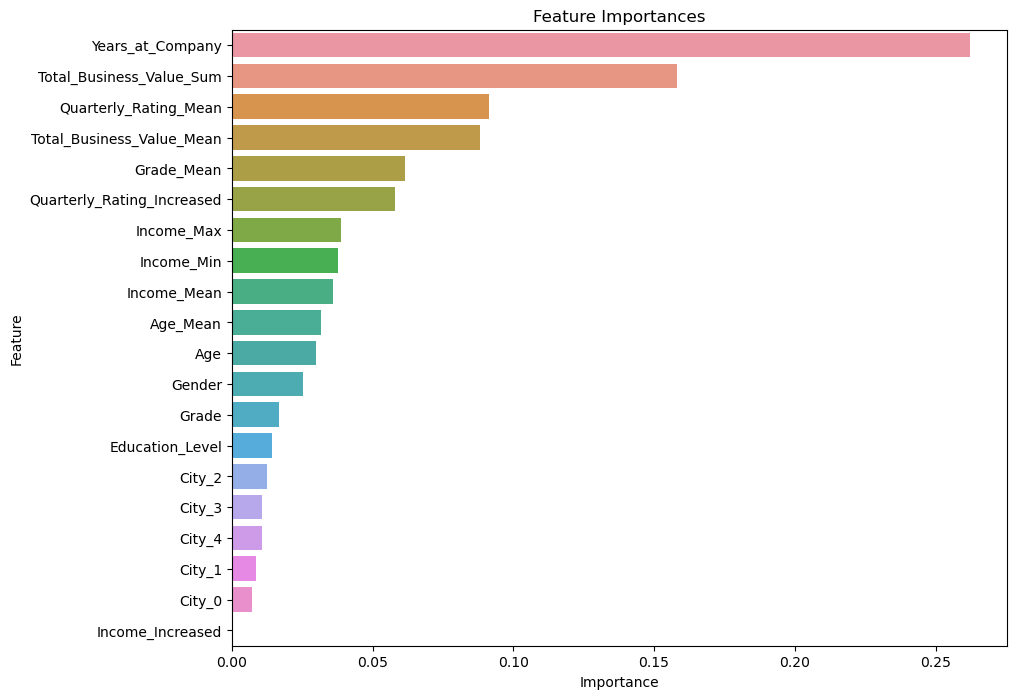

Training TunedGB...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


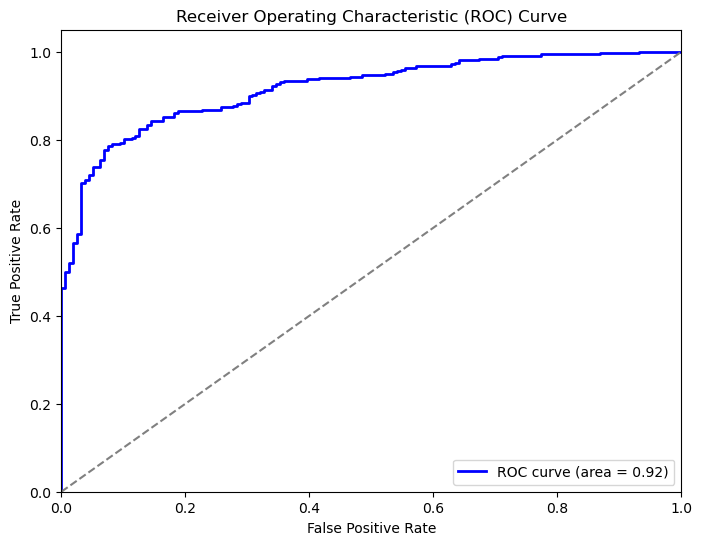

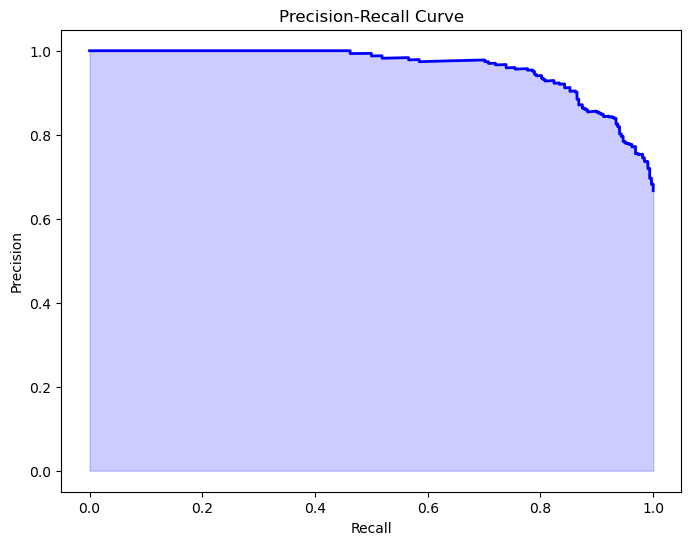

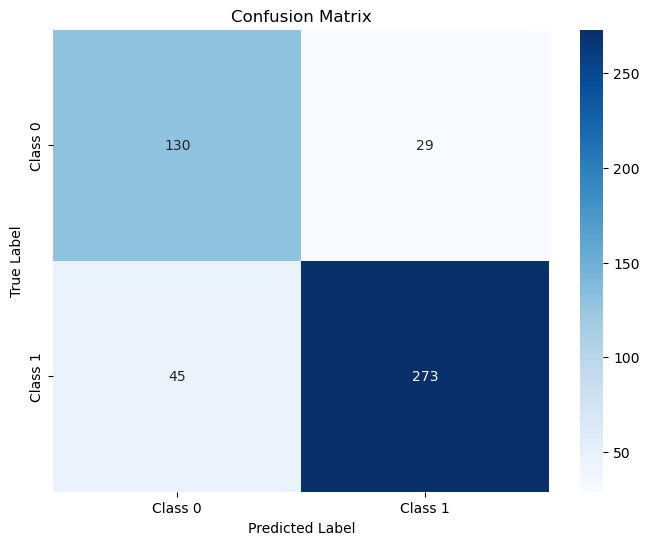

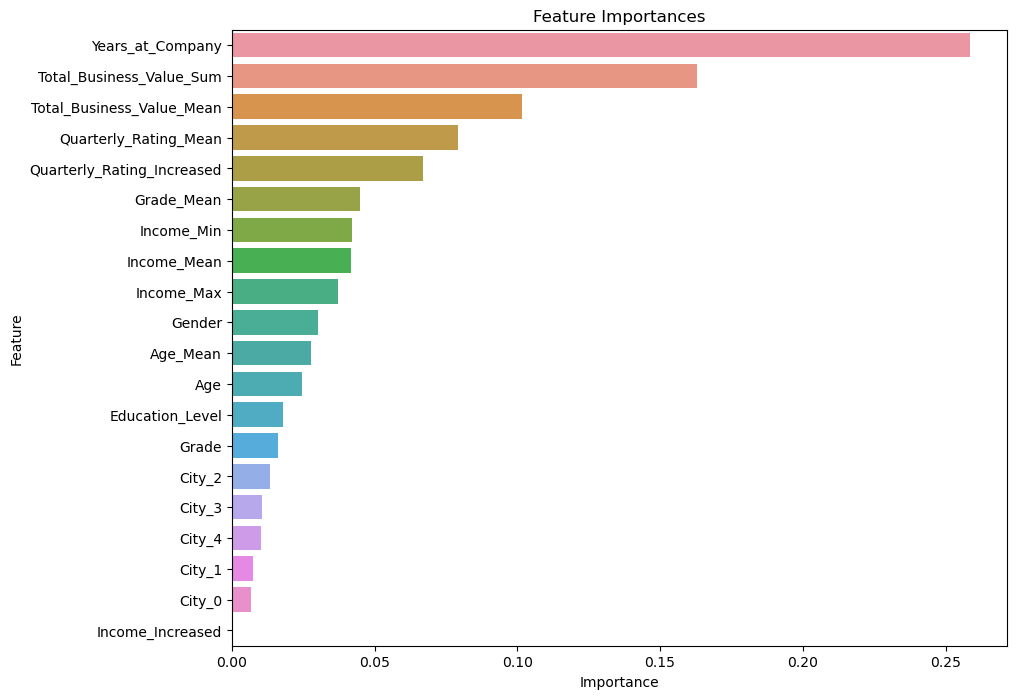

Training TunedXgb...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


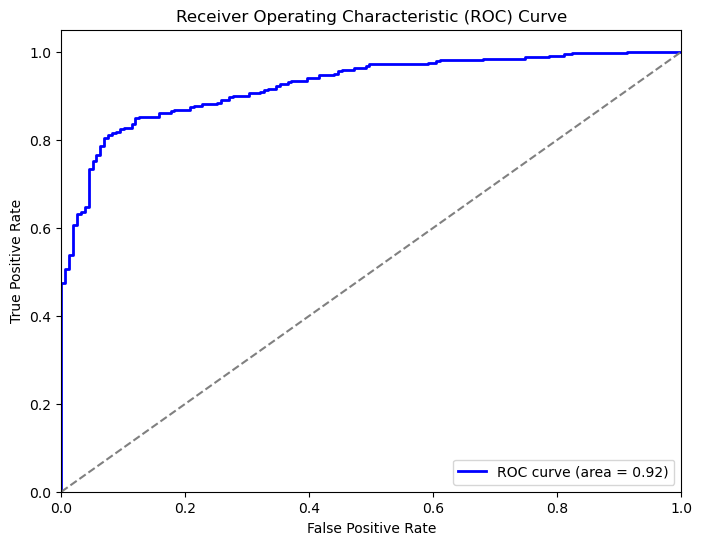

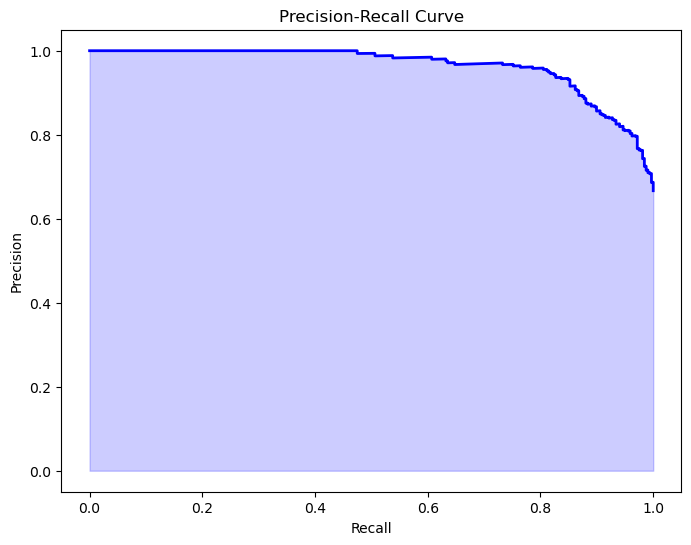

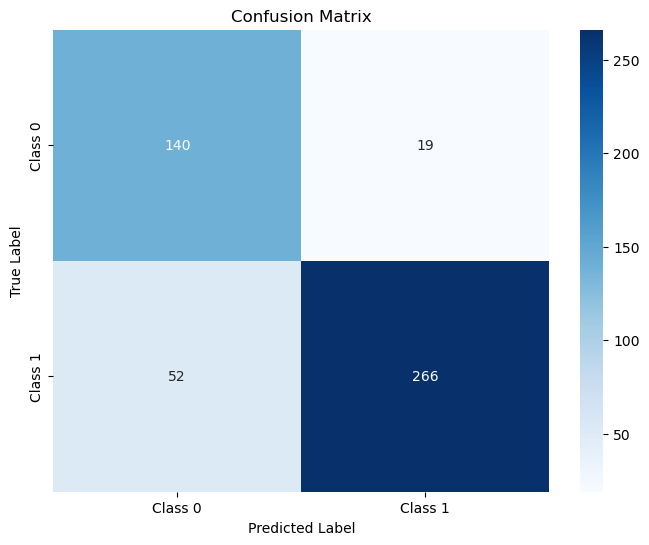

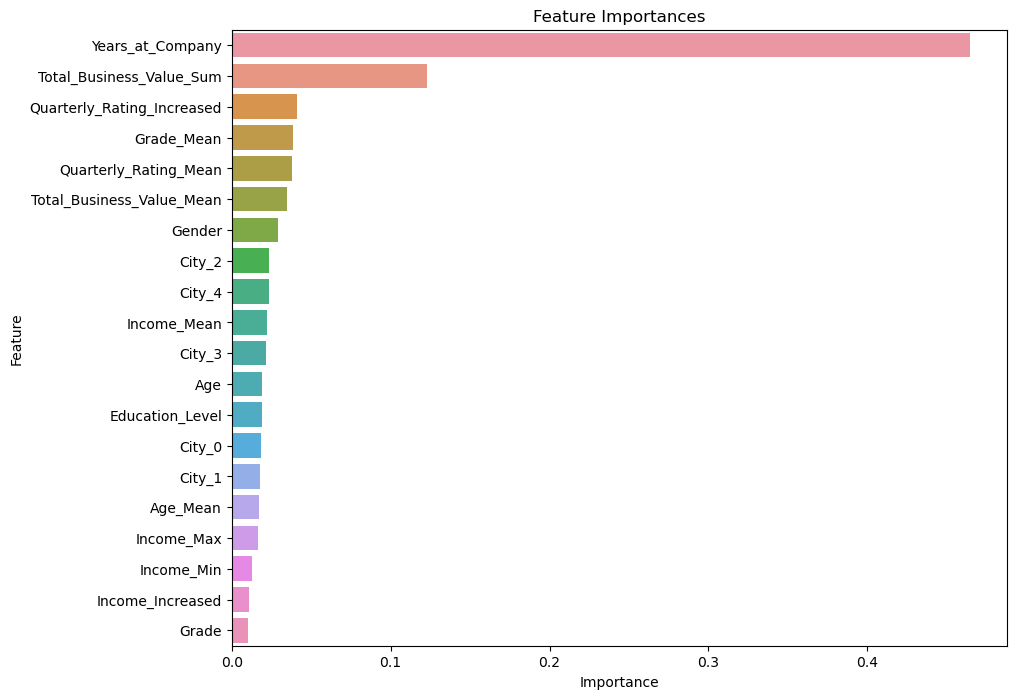

Training TunedLgbm...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

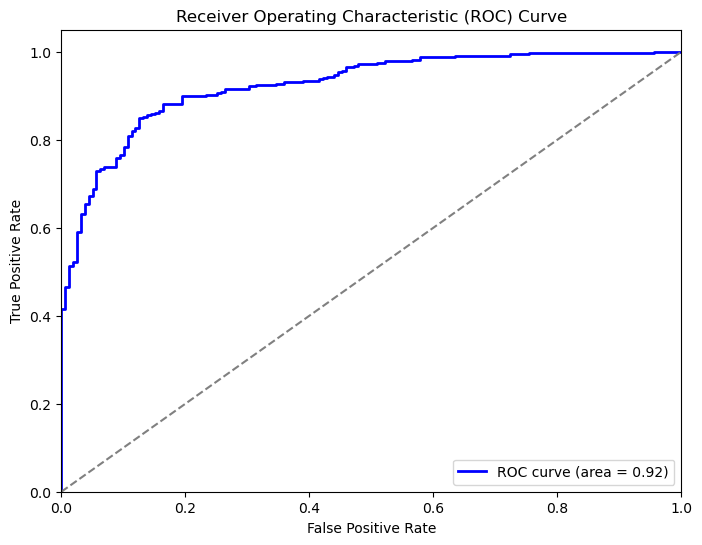

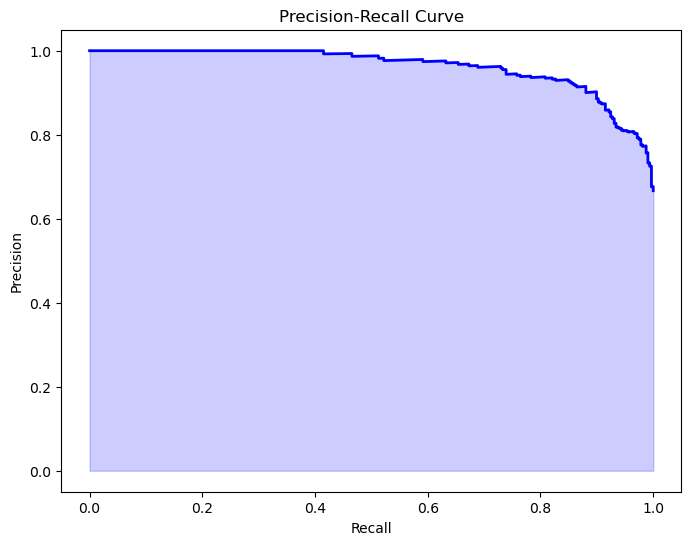

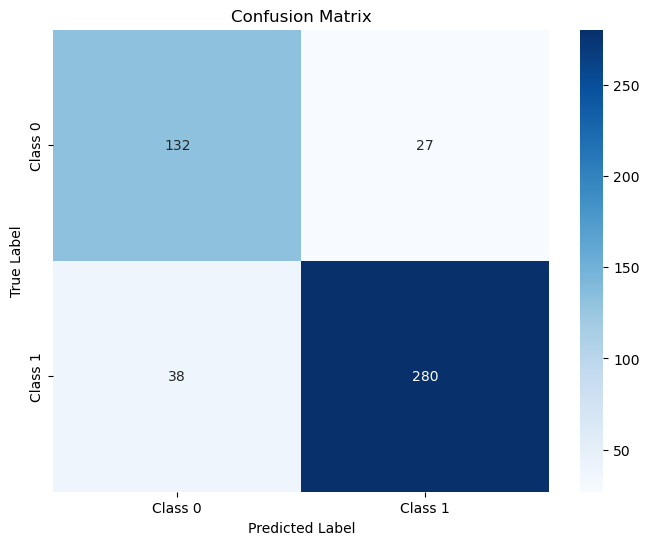

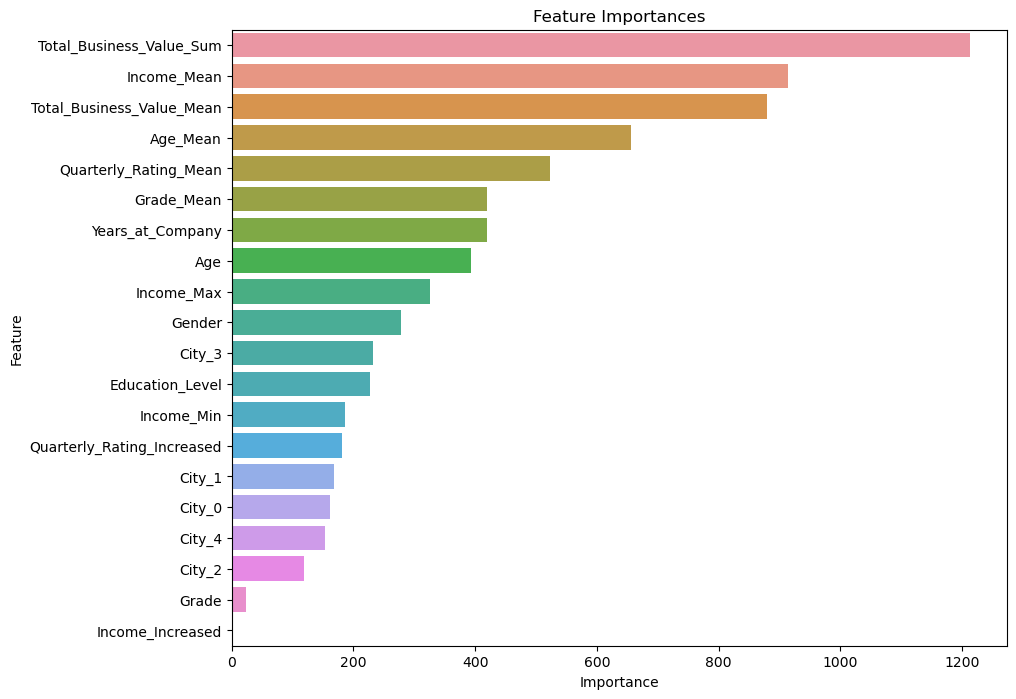

Model  Overall Precision  Overall Recall  Overall F1 Score  \
0    simple RF           0.904762        0.836478          0.869281   
1    simple GB           0.910596        0.864780          0.887097   
2   simple xgb           0.894737        0.855346          0.874598   
3  simple lgbm           0.909091        0.880503          0.894569   
4      TunedRF           0.908163        0.839623          0.872549   
5      TunedGB           0.903974        0.858491          0.880645   
6     TunedXgb           0.933333        0.836478          0.882255   
7    TunedLgbm           0.912052        0.880503          0.896000   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
0           0.715847        0.823899          0.766082           0.904762   
1           0.754286        0.830189          0.790419           0.910596   
2           0.734104        0.798742          0.765060           0.894737   
3           0.775148        0.823899          0.798780           0.909091   
4           0.721311        0.830189          0.771930           0.908163   
5           0.742857        0.817610          0.778443           0.903974   
6           0.729167        0.880503          0.797721           0.933333   
7           0.776471        0.830189          0.802432           0.912052   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
0        0.836478          0.869281  0.912543  
1        0.864780          0.887097  0.918694  
2        0.855346          0.874598  0.920474  
3        0.880503          0.894569  0.927792  
4        0.839623          0.872549  0.915945  
5        0.858491          0.880645  0.917151  
6        0.836478          0.882255  0.924449  
7        0.880503          0.896000  0.924627

In [85]:
# Define models dictionary
models = {
       'simple RF' : RandomForestClassifier(oob_score=True),
    'simple GB' : GradientBoostingClassifier(),
    'simple xgb' : XGBClassifier(eval_metric='logloss'),
    'simple lgbm' : lgb.LGBMClassifier(),
    'TunedRF': TunedRF,
    'TunedGB': TunedGB,
    'TunedXgb': TunedXgb,
    'TunedLgbm': TunedLgbm
}

# Train and evaluate models
all_results_df = train_and_evaluate(models, X_train_resampled, x_test, y_train_resampled, y_test)

# Print results DataFrame
display(all_results_df)

In [86]:
all_results_df.sort_values(by=["Overall F1 Score"],ascending=False)

Model  Overall Precision  Overall Recall  Overall F1 Score  \
7    TunedLgbm           0.912052        0.880503          0.896000   
3  simple lgbm           0.909091        0.880503          0.894569   
1    simple GB           0.910596        0.864780          0.887097   
6     TunedXgb           0.933333        0.836478          0.882255   
5      TunedGB           0.903974        0.858491          0.880645   
2   simple xgb           0.894737        0.855346          0.874598   
4      TunedRF           0.908163        0.839623          0.872549   
0    simple RF           0.904762        0.836478          0.869281   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
7           0.776471        0.830189          0.802432           0.912052   
3           0.775148        0.823899          0.798780           0.909091   
1           0.754286        0.830189          0.790419           0.910596   
6           0.729167        0.880503          0.797721           0.933333   
5           0.742857        0.817610          0.778443           0.903974   
2           0.734104        0.798742          0.765060           0.894737   
4           0.721311        0.830189          0.771930           0.908163   
0           0.715847        0.823899          0.766082           0.904762   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
7        0.880503          0.896000  0.924627  
3        0.880503          0.894569  0.927792  
1        0.864780          0.887097  0.918694  
6        0.836478          0.882255  0.924449  
5        0.858491          0.880645  0.917151  
2        0.855346          0.874598  0.920474  
4        0.839623          0.872549  0.915945  
0        0.836478          0.869281  0.912543

## SOMTE didn't improved the model performace by much

# using VIF

In [87]:
X_train = pd.DataFrame(x_train,columns = df_encoded.drop("Has_Left",axis=1).columns)
X_test = pd.DataFrame(x_test,columns = df_encoded.drop("Has_Left",axis=1).columns)

In [93]:
def calculate_vif(df):    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data


def remove_high_vif_features(df, threshold=5):
    vif_data = calculate_vif(df)
    print(f"Initial VIF values:\n{vif_data}")

    # Identify features with high VIF
    while vif_data['VIF'].max() > threshold:
        # Feature with the highest VIF
        feature_to_drop = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"Dropping feature: {feature_to_drop} with VIF: {vif_data['VIF'].max()}")

        # Drop the feature with the highest VIF
        df = df.drop(columns=[feature_to_drop])

        # Recalculate VIF values
        vif_data = calculate_vif(df)
        print(f"Updated VIF values:\n{vif_data}")

    return df

VIFREMDf = remove_high_vif_features(X_train_resampled)

Initial VIF values:
                       Feature            VIF
0                       Gender       1.806835
1                       City_0       1.801267
2                       City_1       1.835971
3                       City_2       1.665044
4                       City_3       1.681785
5                       City_4       1.858678
6              Education_Level       2.511899
7             Years_at_Company      14.993115
8                     Age_Mean   15083.405752
9                  Income_Mean  448829.227425
10                  Income_Max   30889.316945
11                  Income_Min  298287.659548
12                  Grade_Mean     142.308571
13   Total_Business_Value_Mean      19.064316
14       Quarterly_Rating_Mean      23.520246
15            Income_Increased       2.680941
16  Quarterly_Rating_Increased       1.488592
17                         Age   15395.435844
18                       Grade     130.702477
19    Total_Business_Value_Sum      14.241000
Dropping featu

In [94]:
xTrain = VIFREMDf
xTest = x_test[xTrain.columns]

Training simple RF...


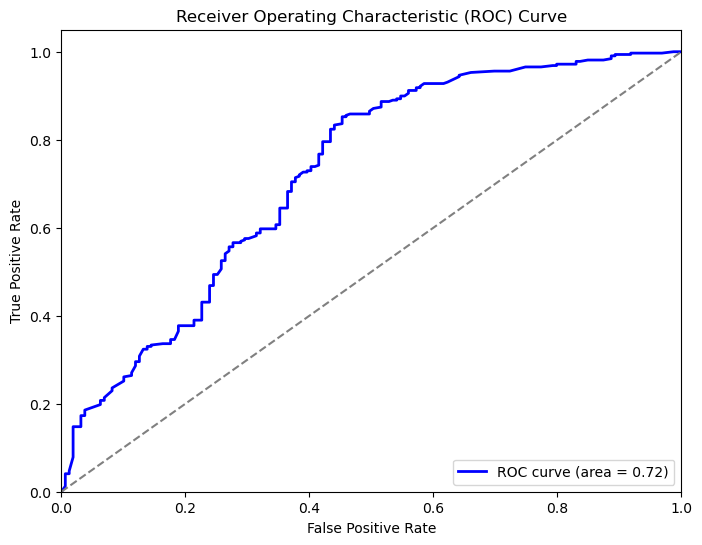

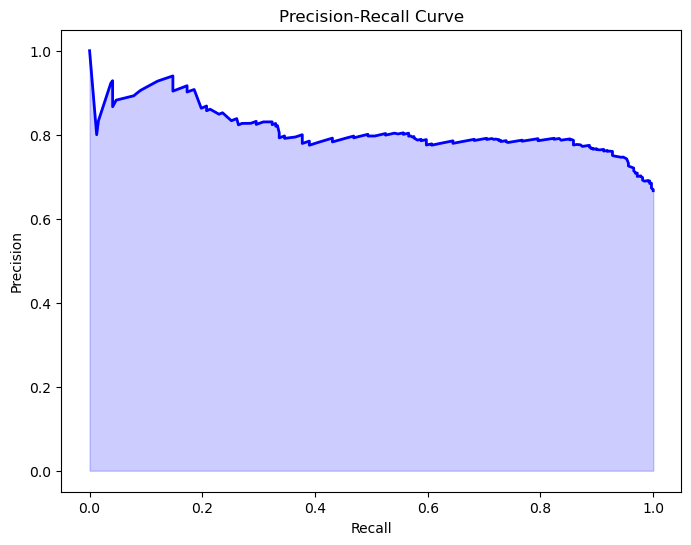

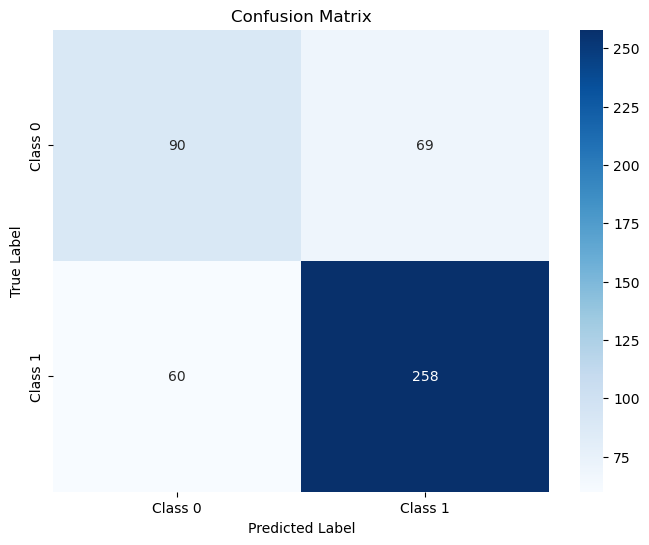

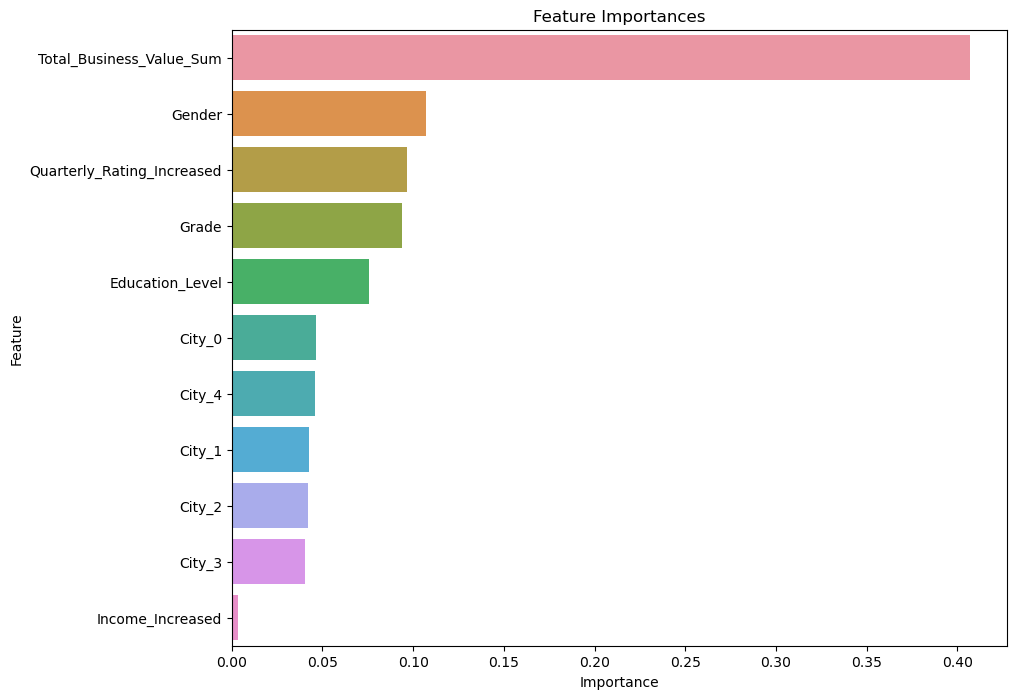

Training simple GB...


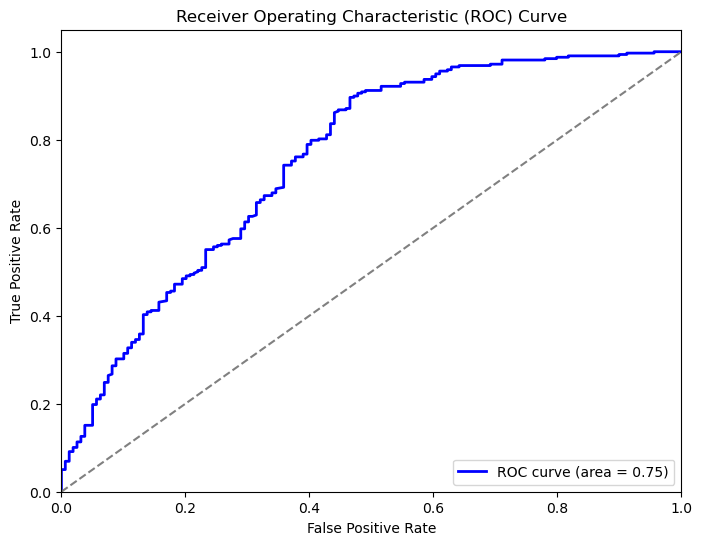

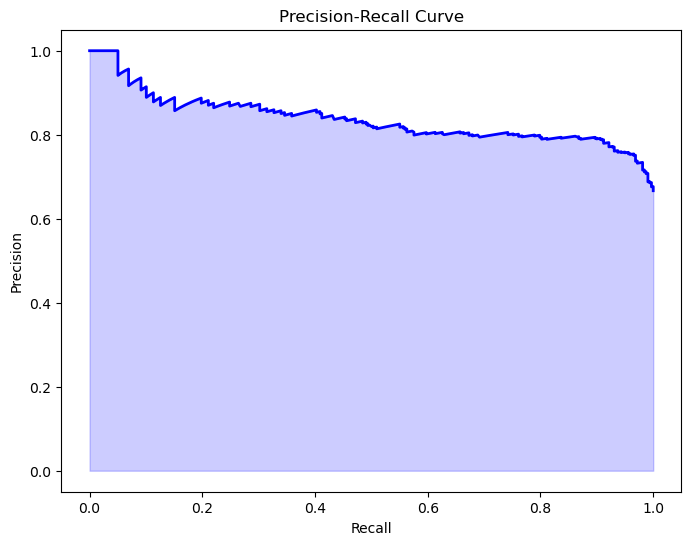

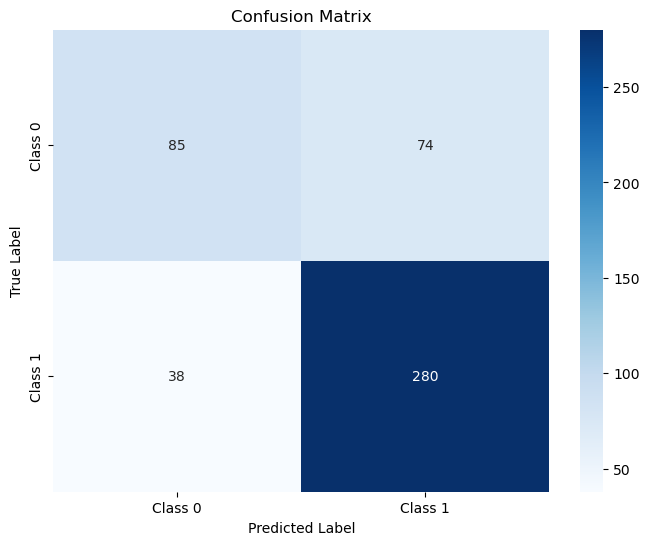

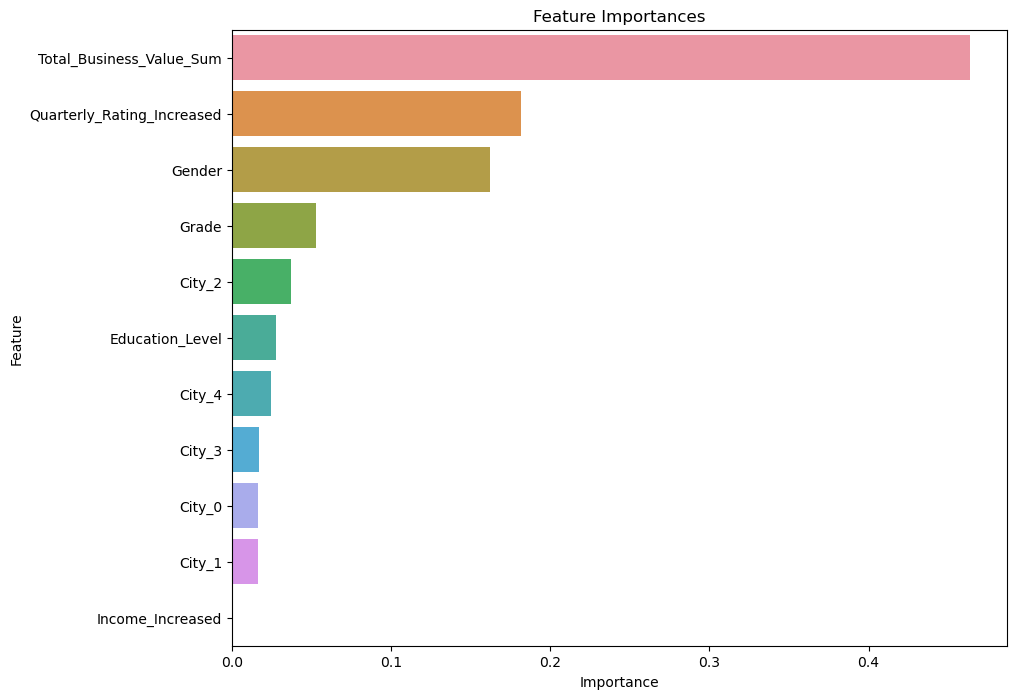

Training simple xgb...


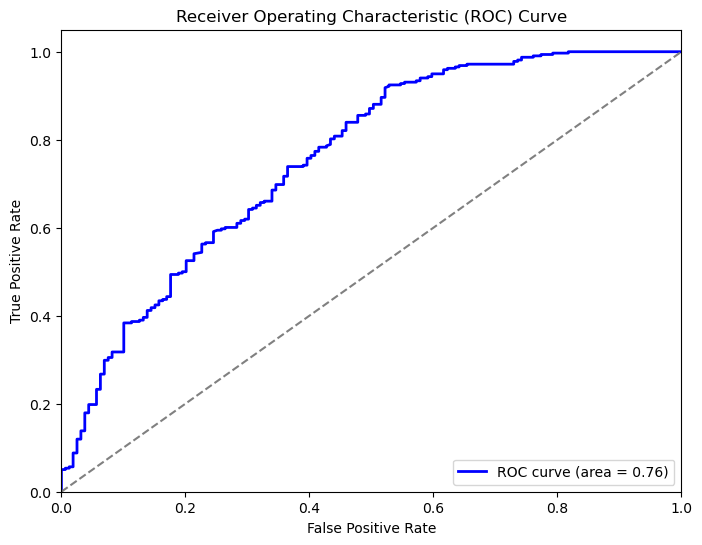

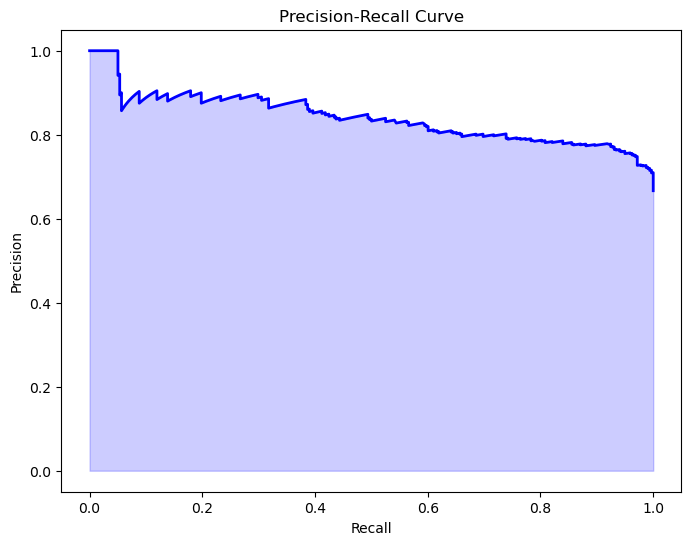

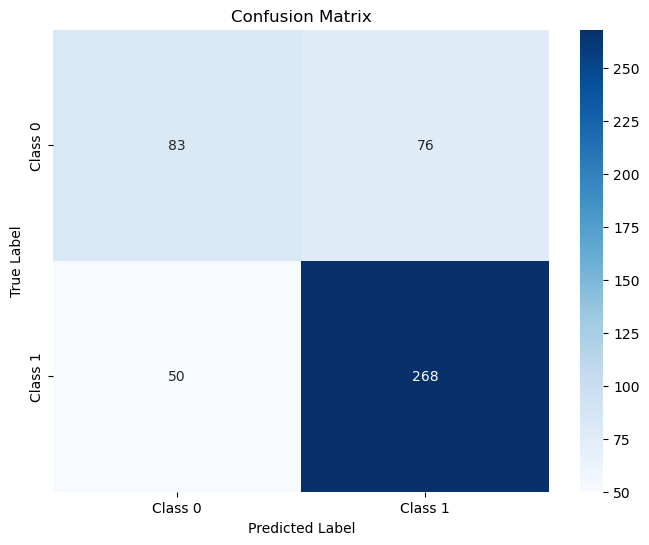

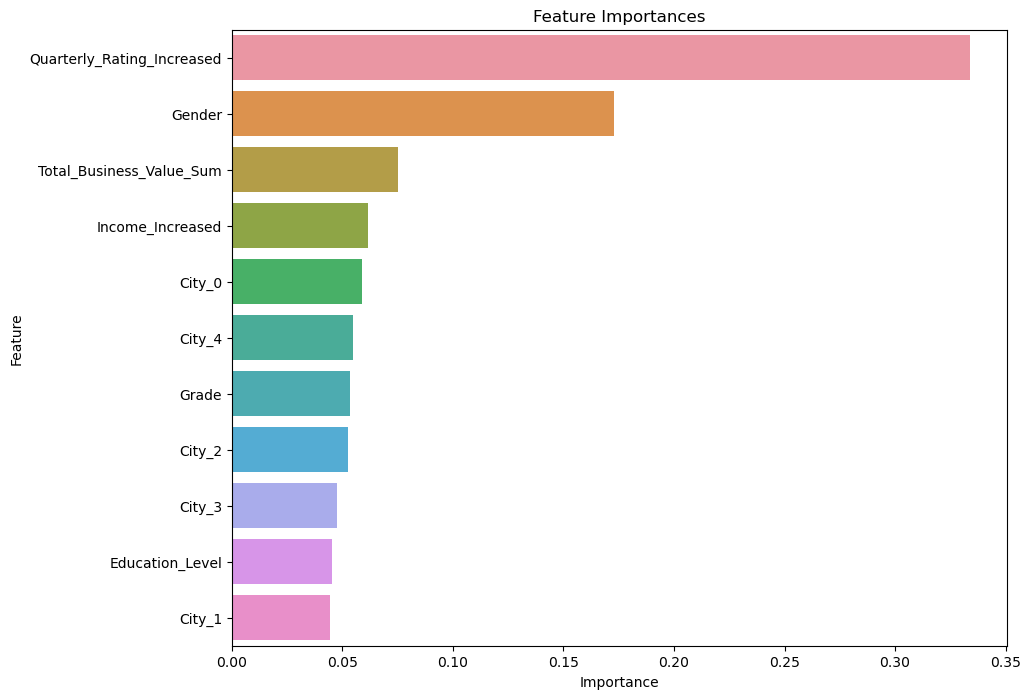

Training simple lgbm...
[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


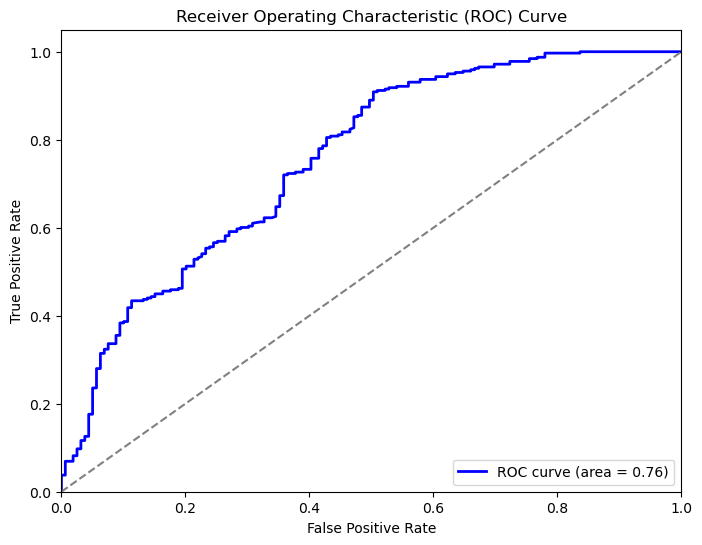

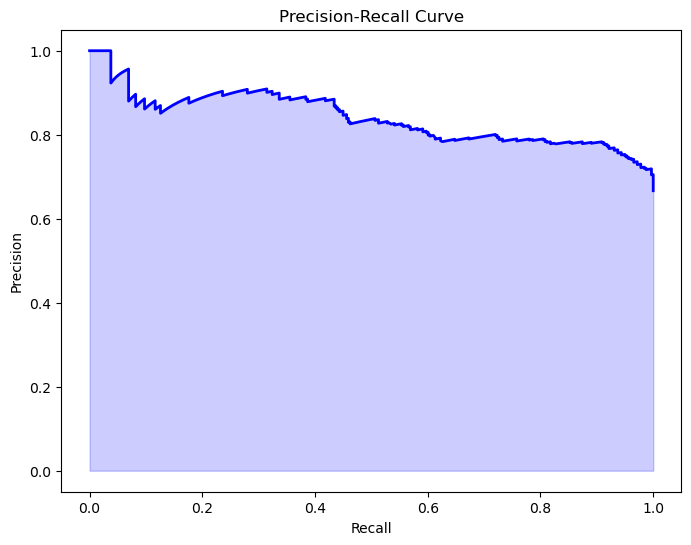

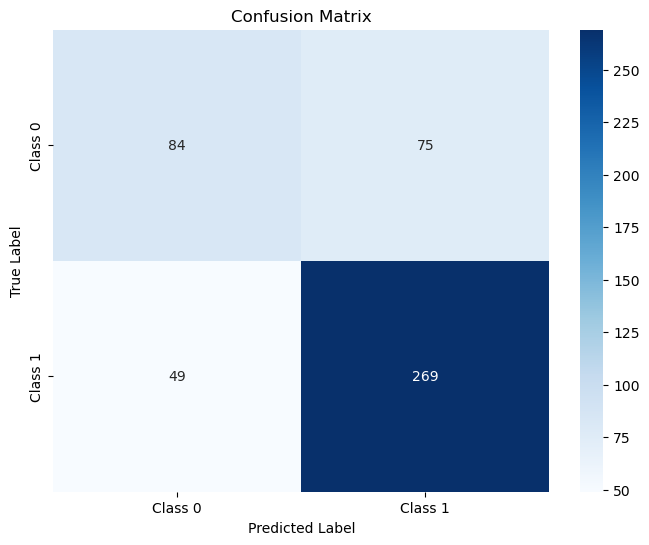

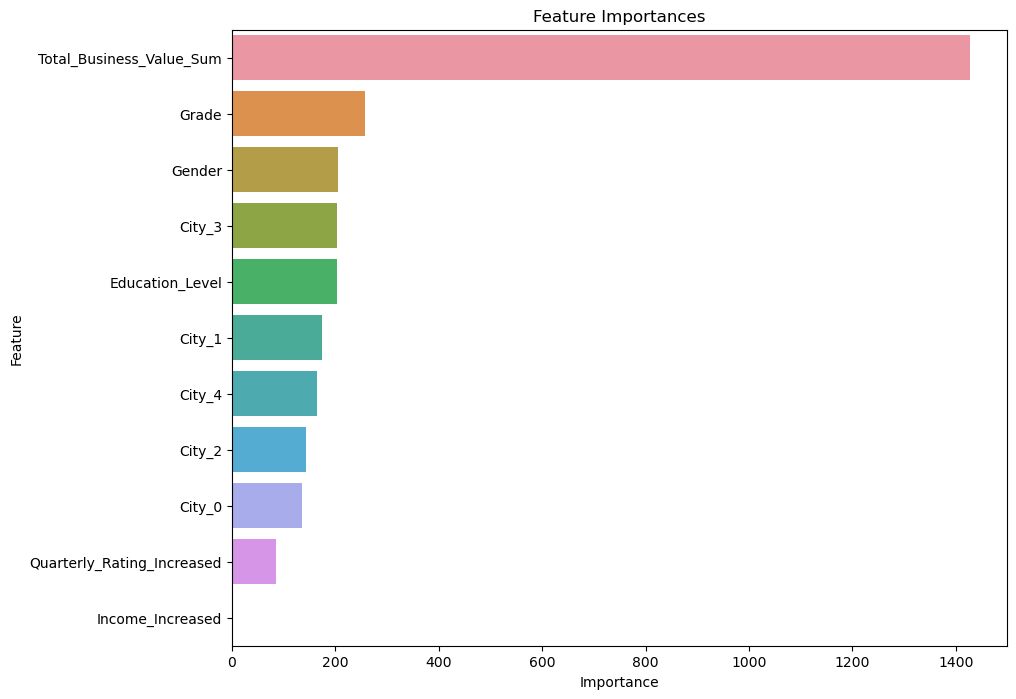

Training TunedRF...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


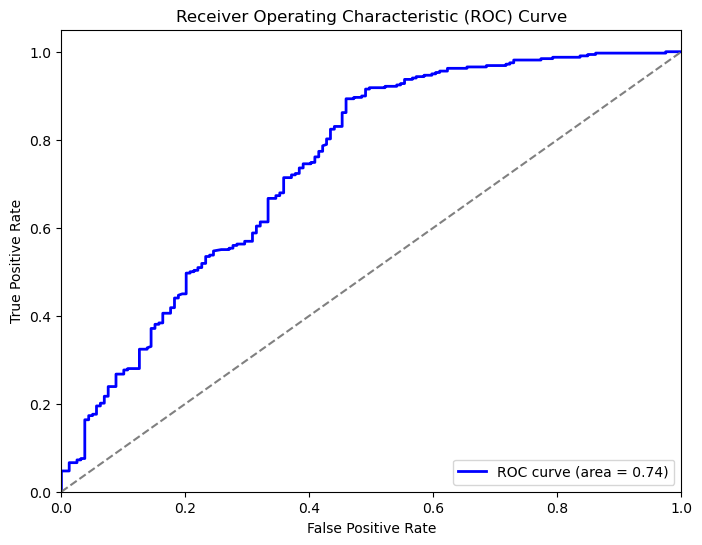

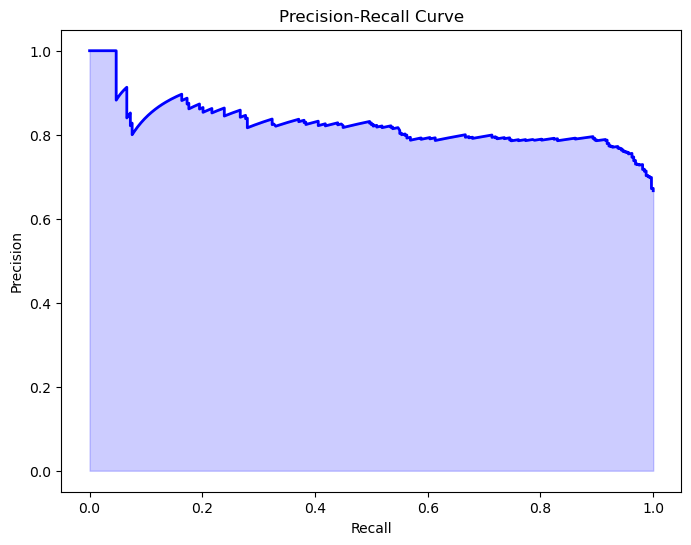

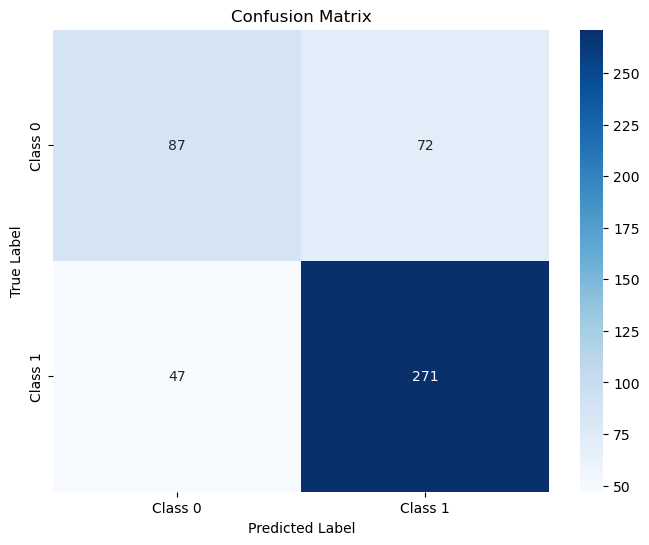

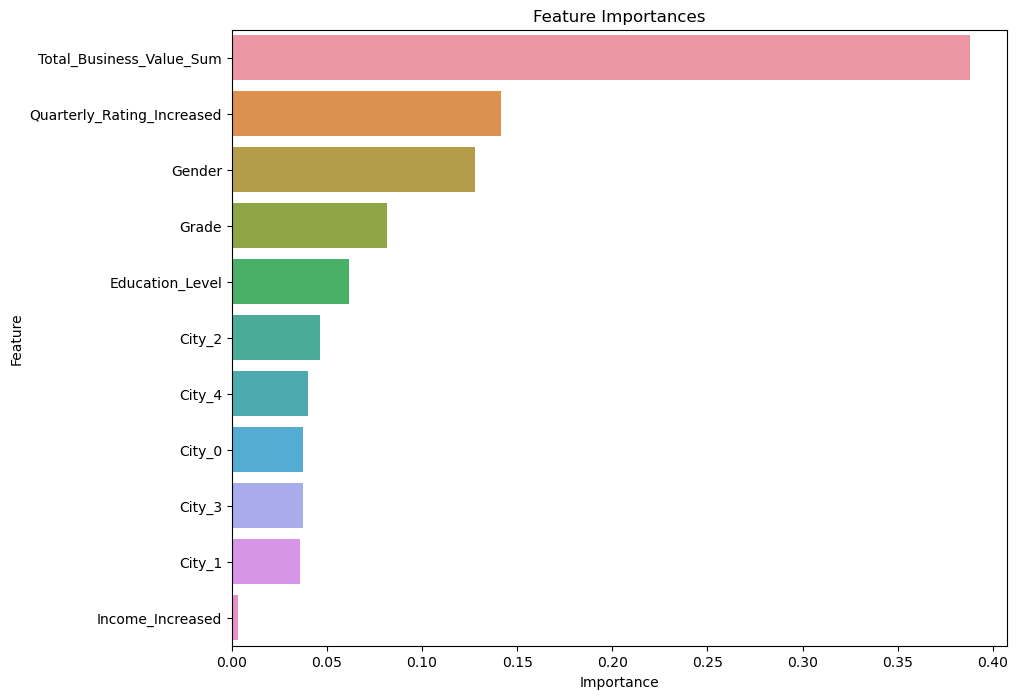

Training TunedGB...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


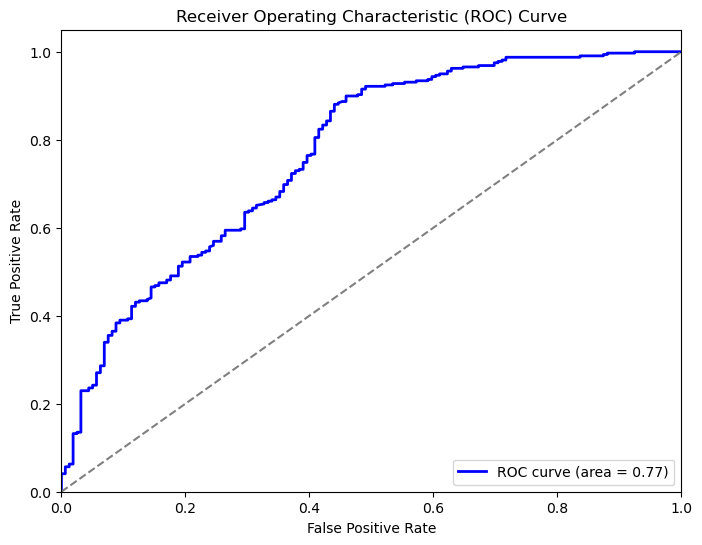

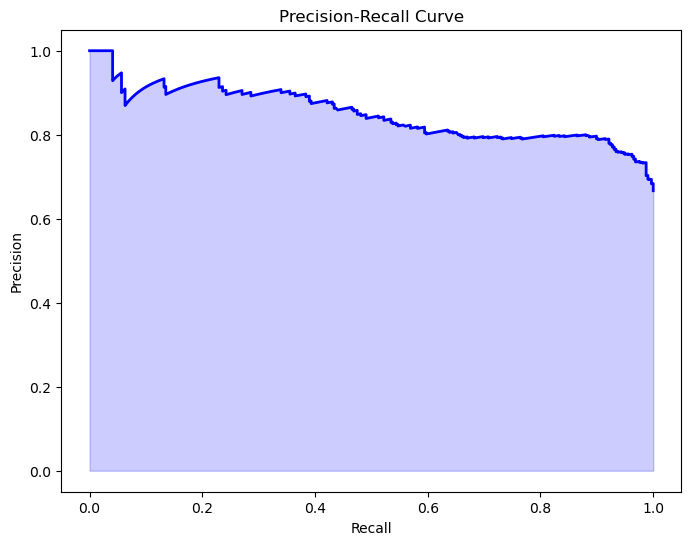

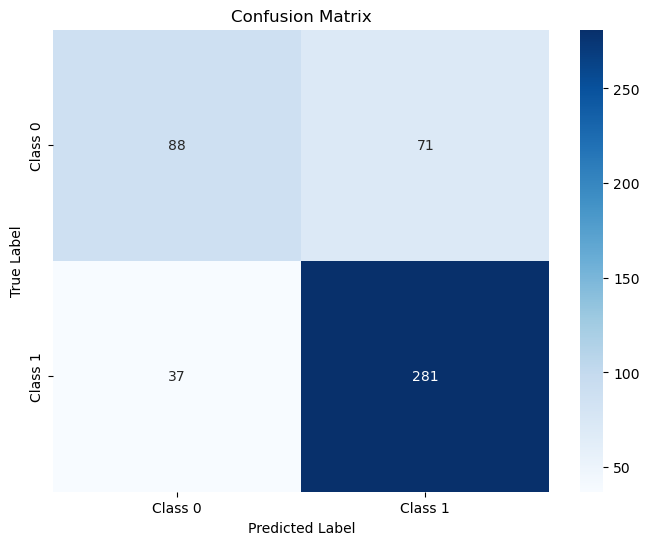

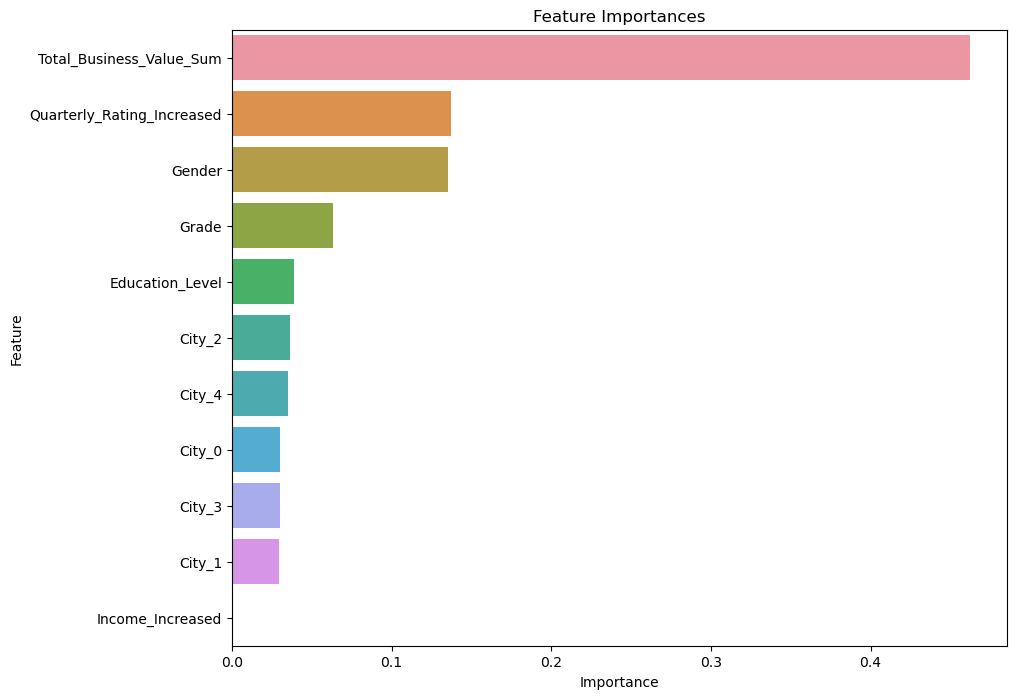

Training TunedXgb...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


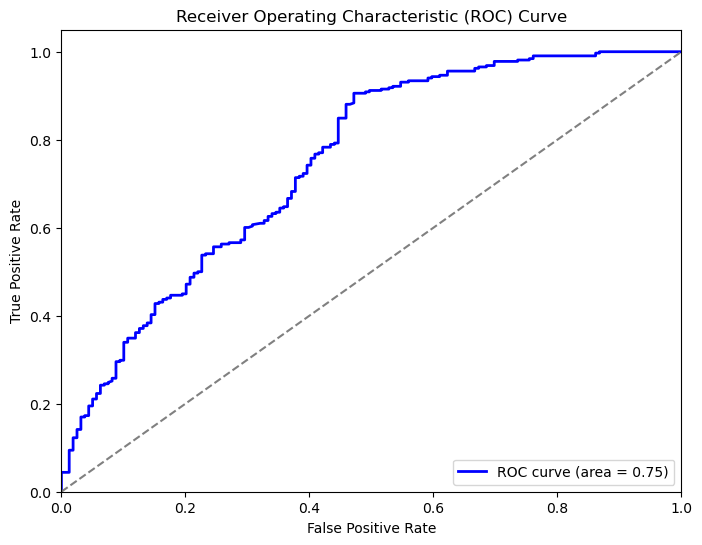

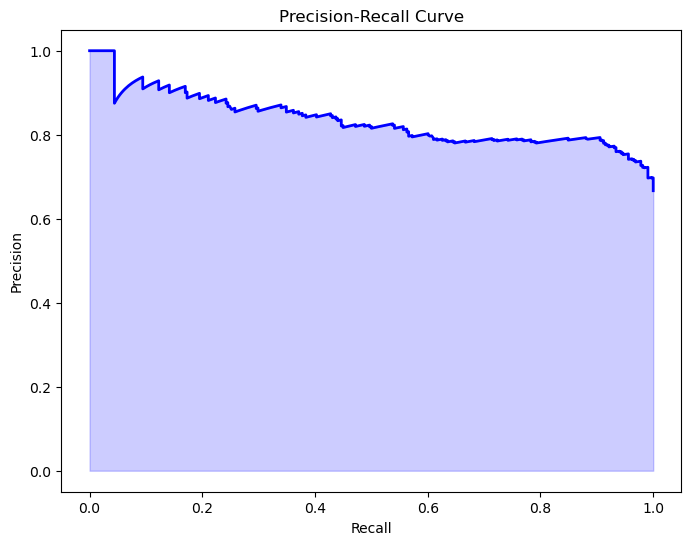

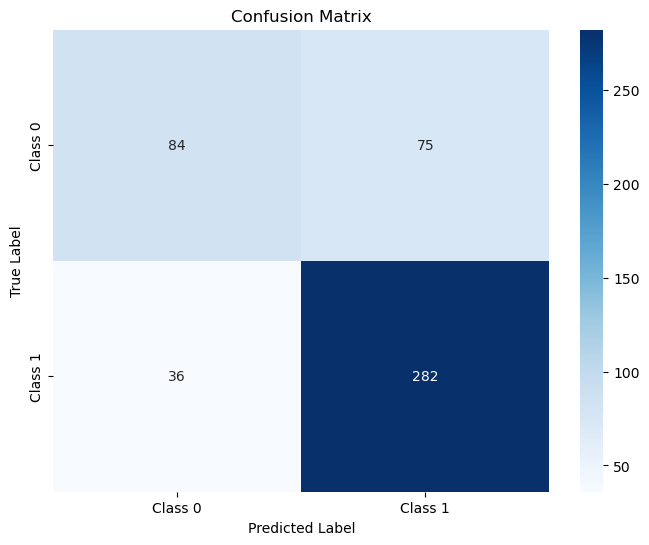

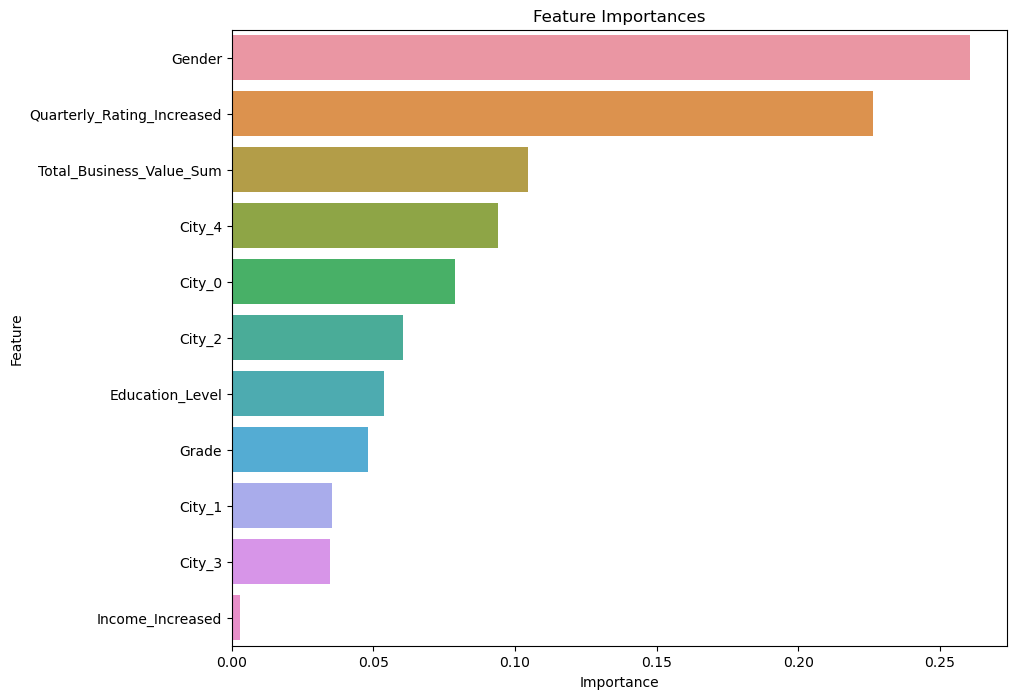

Training TunedLgbm...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

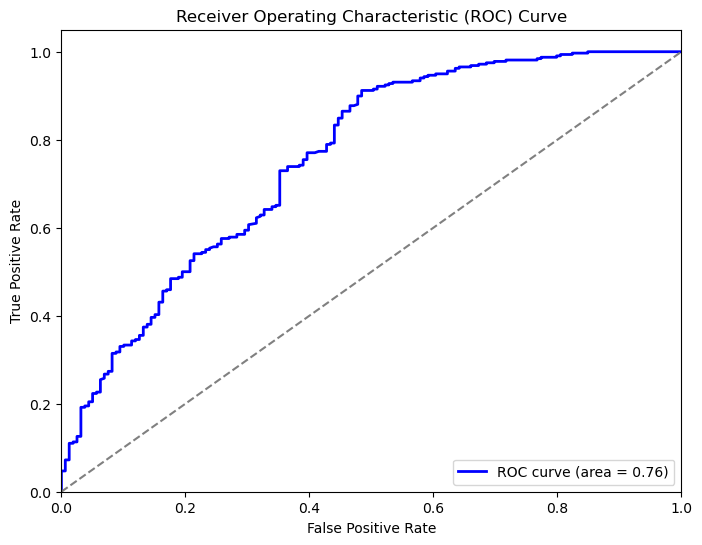

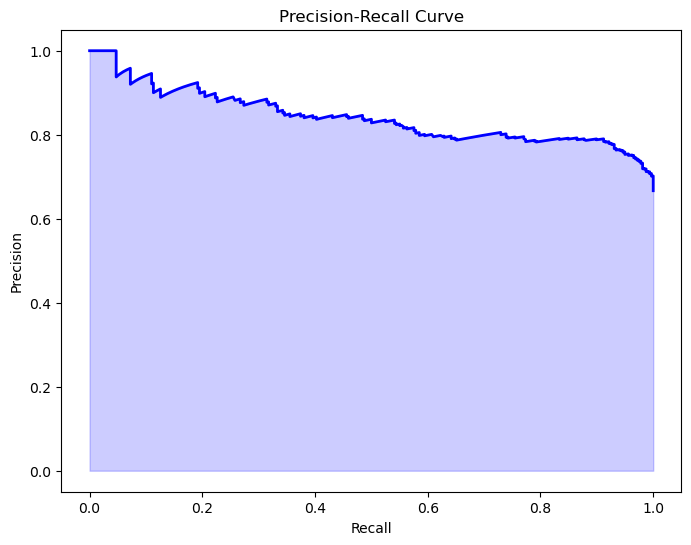

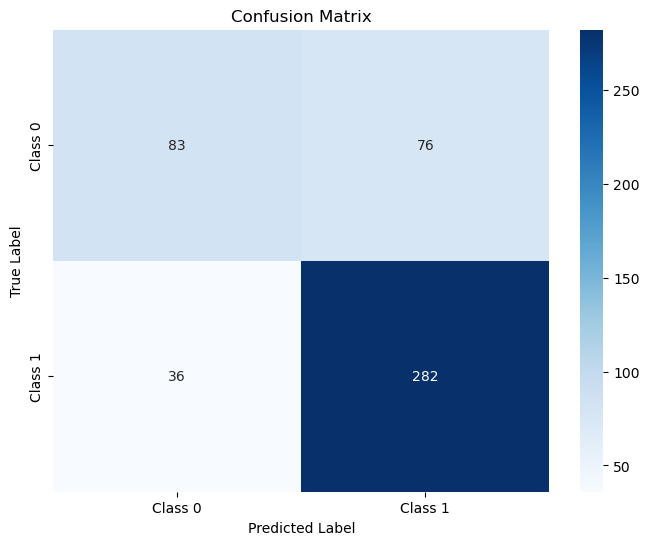

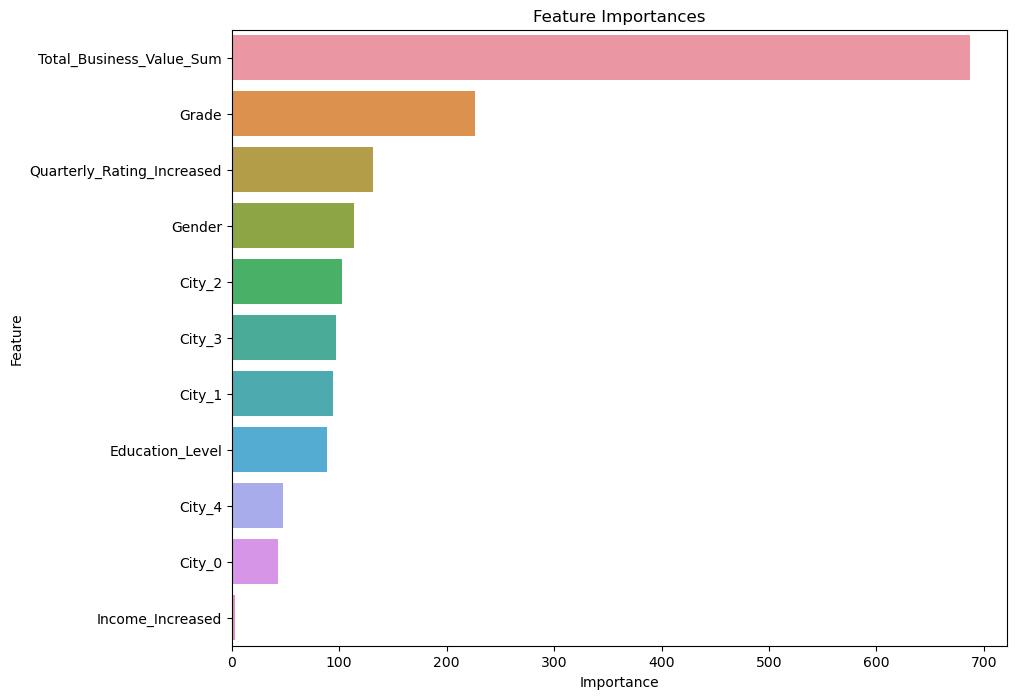

Model  Overall Precision  Overall Recall  Overall F1 Score  \
0    simple RF           0.788991        0.811321          0.800000   
1    simple GB           0.790960        0.880503          0.833333   
2   simple xgb           0.779070        0.842767          0.809668   
3  simple lgbm           0.781977        0.845912          0.812689   
4      TunedRF           0.790087        0.852201          0.819970   
5      TunedGB           0.798295        0.883648          0.838806   
6     TunedXgb           0.789916        0.886792          0.835556   
7    TunedLgbm           0.787709        0.886792          0.834320   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
0           0.600000        0.566038          0.582524           0.788991   
1           0.691057        0.534591          0.602837           0.790960   
2           0.624060        0.522013          0.568493           0.779070   
3           0.631579        0.528302          0.575342           0.781977   
4           0.649254        0.547170          0.593857           0.790087   
5           0.704000        0.553459          0.619718           0.798295   
6           0.700000        0.528302          0.602151           0.789916   
7           0.697479        0.522013          0.597122           0.787709   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
0        0.811321          0.800000  0.722262  
1        0.880503          0.833333  0.754865  
2        0.842767          0.809668  0.758089  
3        0.845912          0.812689  0.755459  
4        0.852201          0.819970  0.742564  
5        0.883648          0.838806  0.767701  
6        0.886792          0.835556  0.747805  
7        0.886792          0.834320  0.756527

In [97]:
# Define models dictionary
models = {
       'simple RF' : RandomForestClassifier(oob_score=True),
    'simple GB' : GradientBoostingClassifier(),
    'simple xgb' : XGBClassifier(eval_metric='logloss'),
    'simple lgbm' : lgb.LGBMClassifier(),
    'TunedRF': TunedRF,
    'TunedGB': TunedGB,
    'TunedXgb': TunedXgb,
    'TunedLgbm': TunedLgbm
}

# Train and evaluate models
all_results_df = train_and_evaluate(models, xTrain, xTest, y_train_resampled, y_test)

# Print results DataFrame
display(all_results_df)

### using VIF performance degraded

# using Outlier removal

In [116]:
x_train,x_test,y_train,y_test = train_test_split(df_encoded.drop("Has_Left",axis=1),df_encoded["Has_Left"],test_size=0.2,random_state=10)

In [117]:
# TODO: Determine the 1th and 99th percentiles for 'lead_time'
low_threshold, high_threshold = np.percentile(x_train['Total_Business_Value_Sum'], [1, 99])  # Hint: Use the numpy function to calculate percentiles. Remember to specify the percentile values as a list.

# Identify the indices of rows that are not considered outliers
not_outliers = x_train['Total_Business_Value_Sum'].between(low_threshold, high_threshold)   # Hint: Use a comparison operation to generate a boolean mask where values are between the low and high thresholds.

# Count the number of outliers
num_outliers = np.sum(~not_outliers)

print(num_outliers)
mask = (x_train["Total_Business_Value_Sum"]>=low_threshold) & (x_train["Total_Business_Value_Sum"]<=high_threshold)

28


In [118]:
x_train_no_outliers = x_train[mask]
y_train_no_outliers = y_train[mask]

Training simple RF...


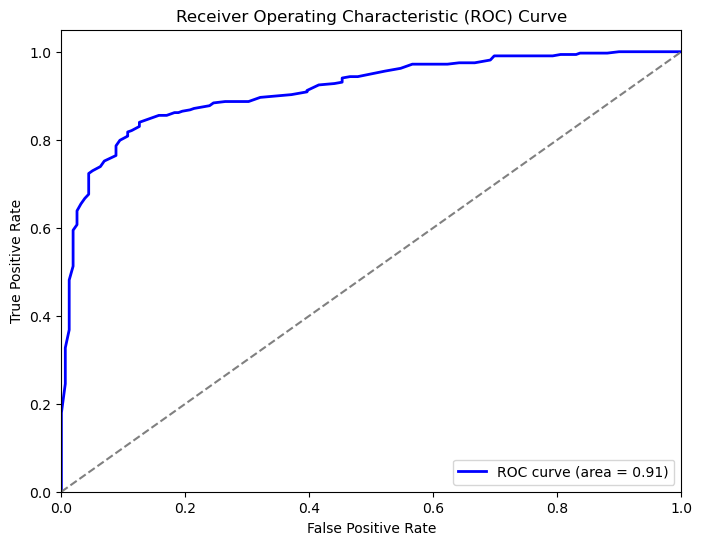

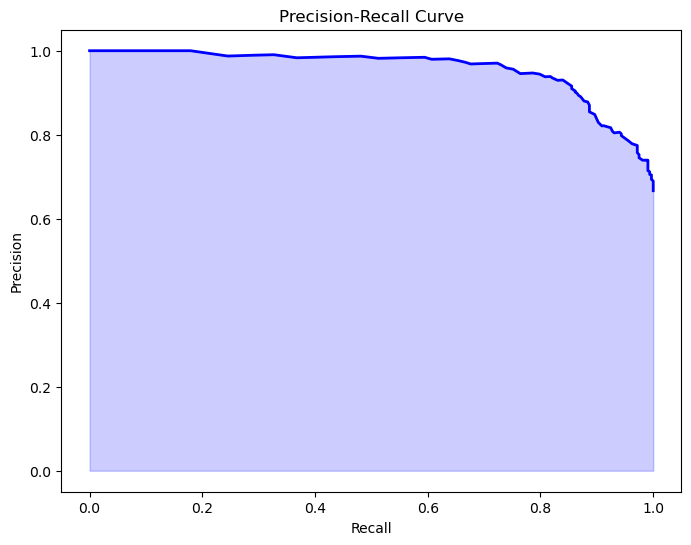

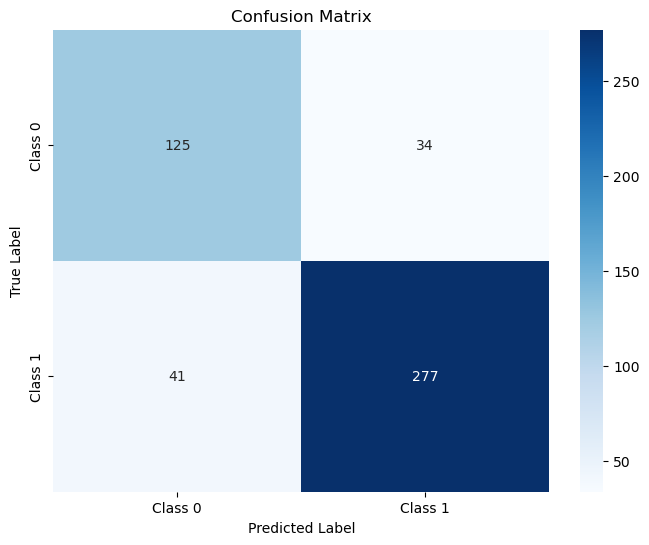

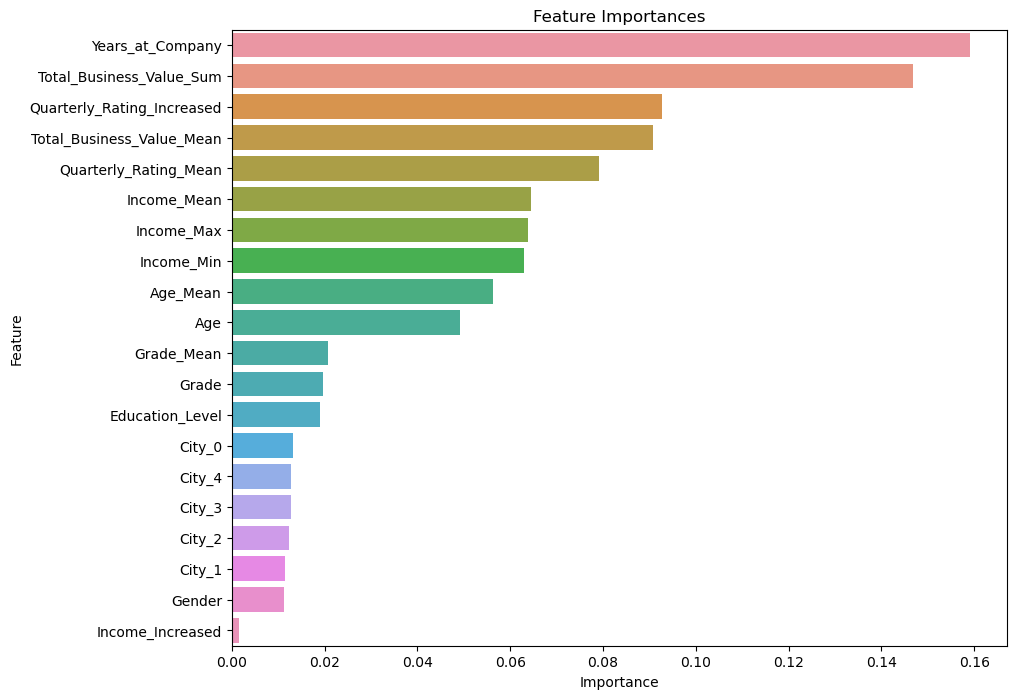

Training simple GB...


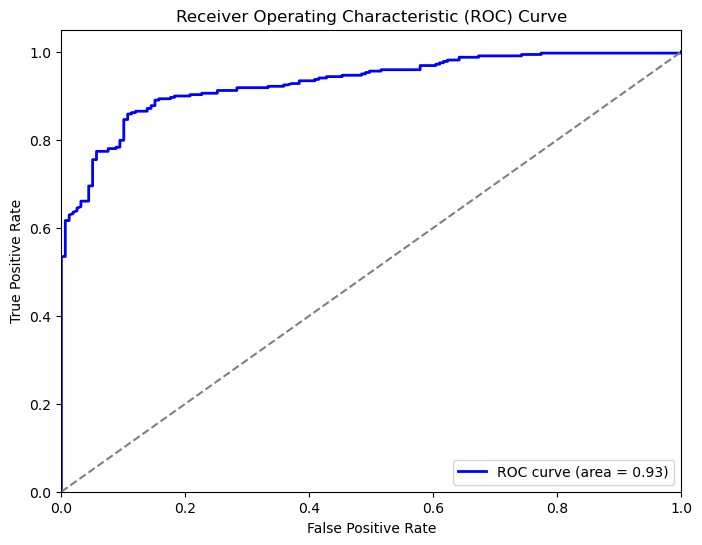

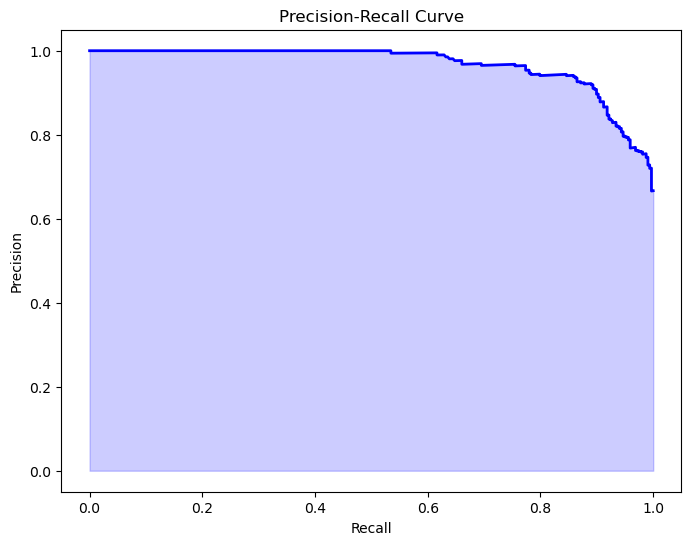

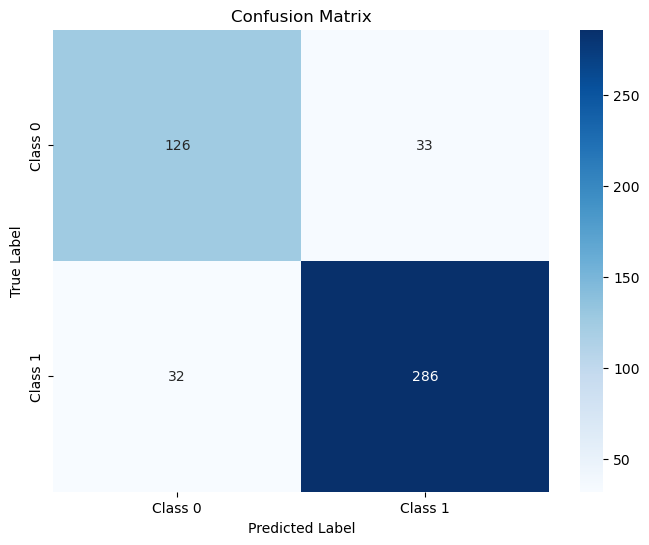

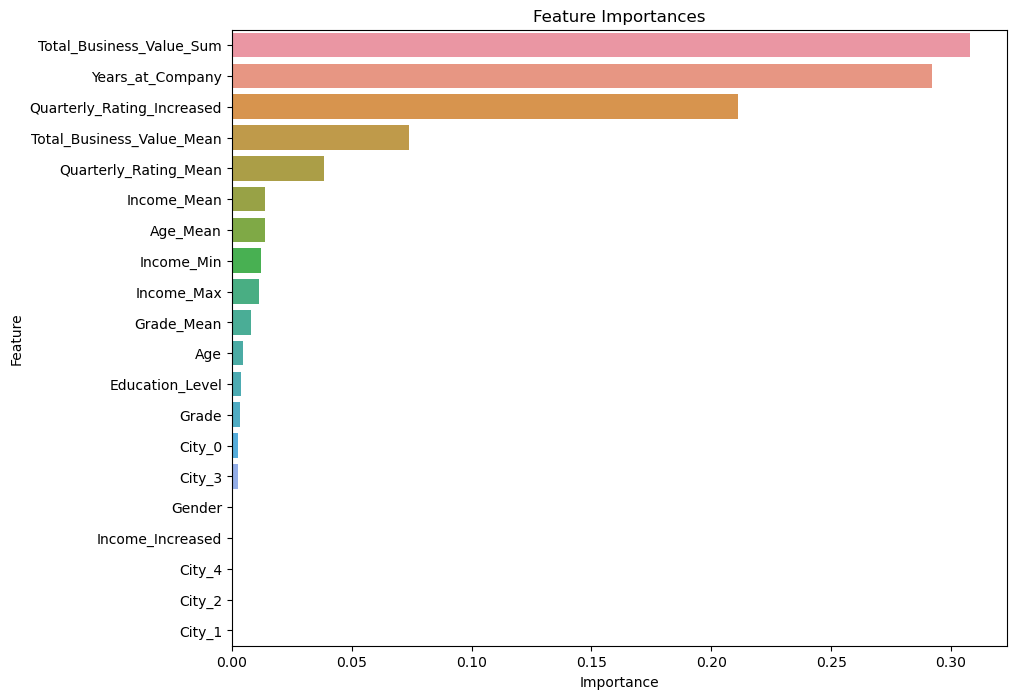

Training simple xgb...


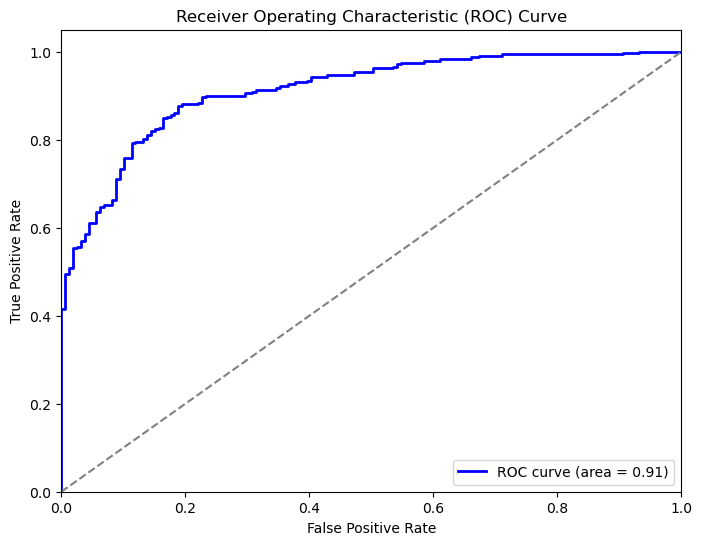

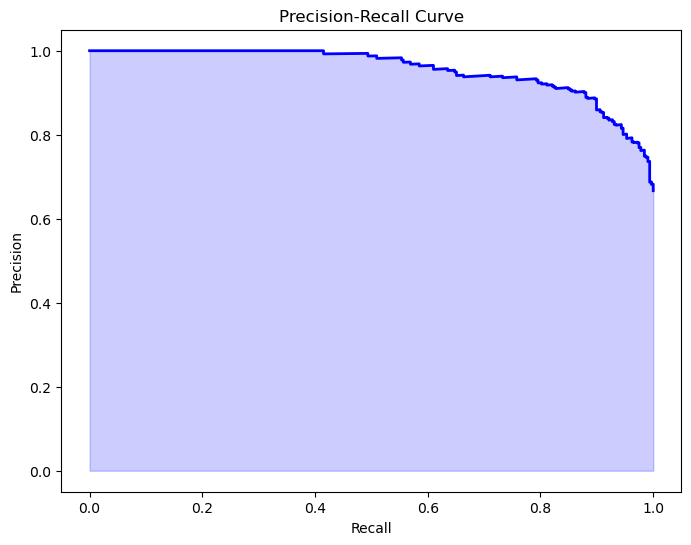

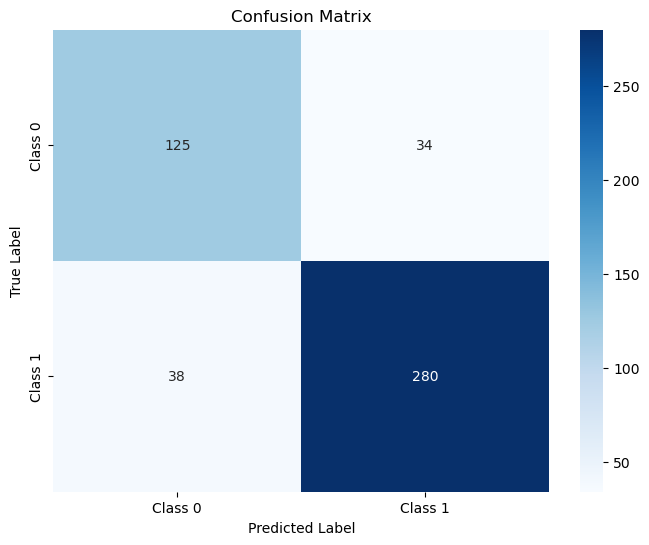

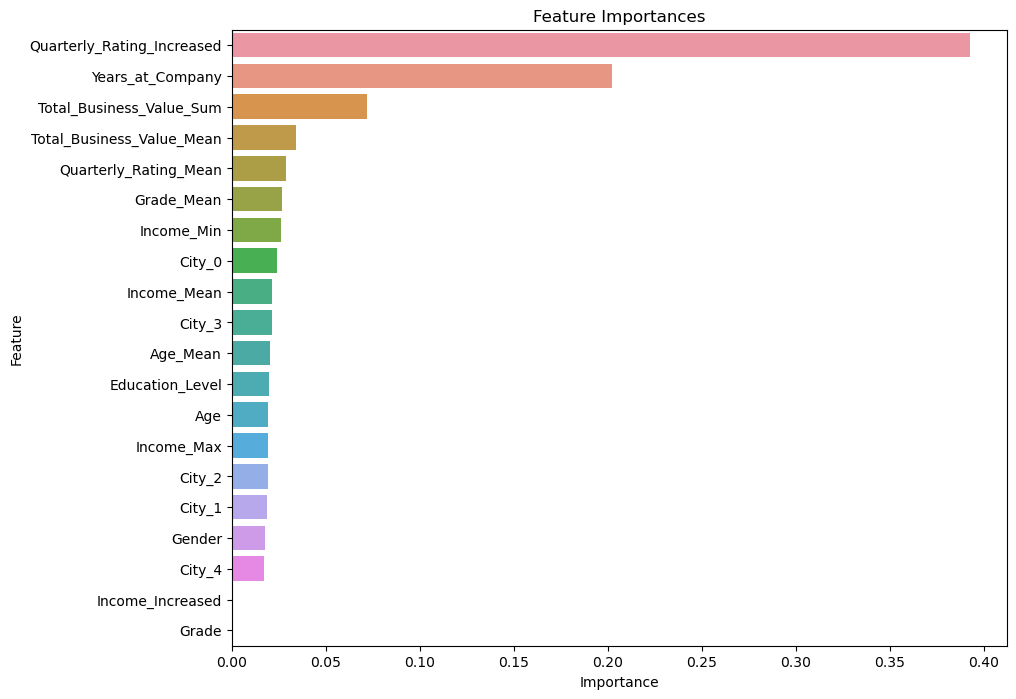

Training simple lgbm...
[LightGBM] [Info] Number of positive: 1286, number of negative: 590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1690
[LightGBM] [Info] Number of data points in the train set: 1876, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685501 -> initscore=0.779169
[LightGBM] [Info] Start training from score 0.779169


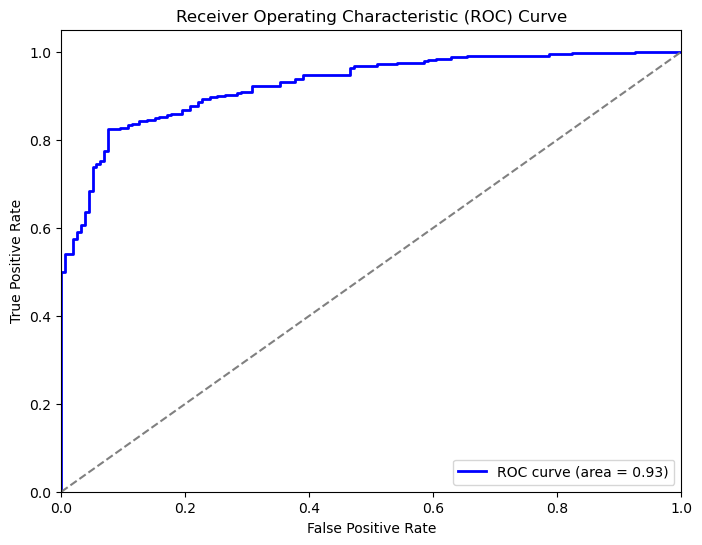

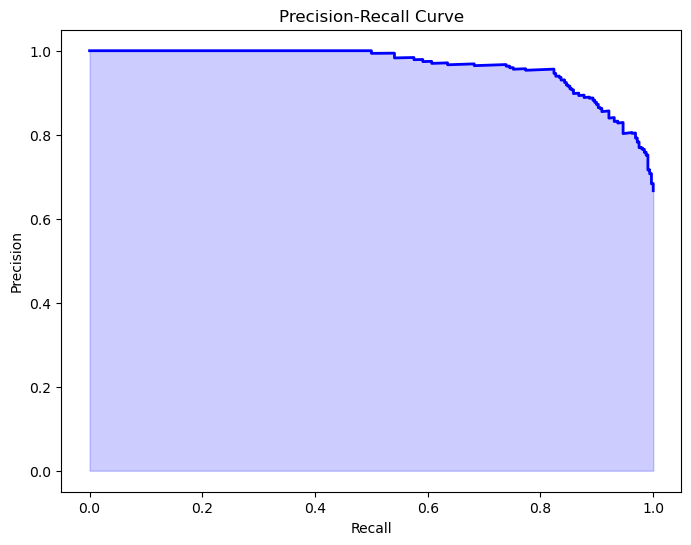

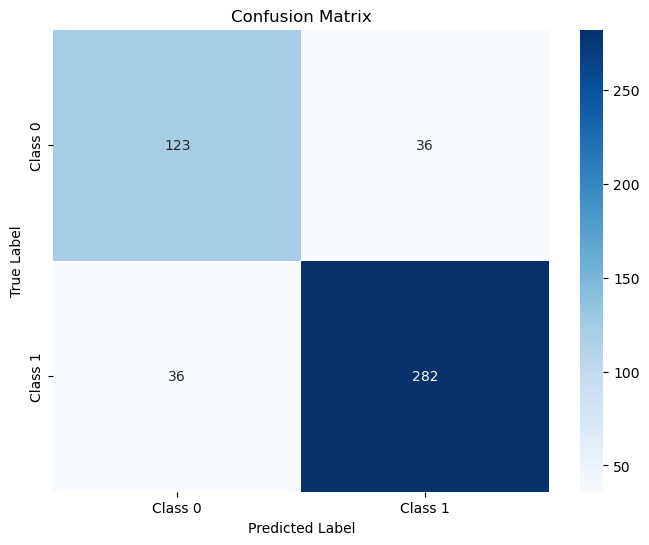

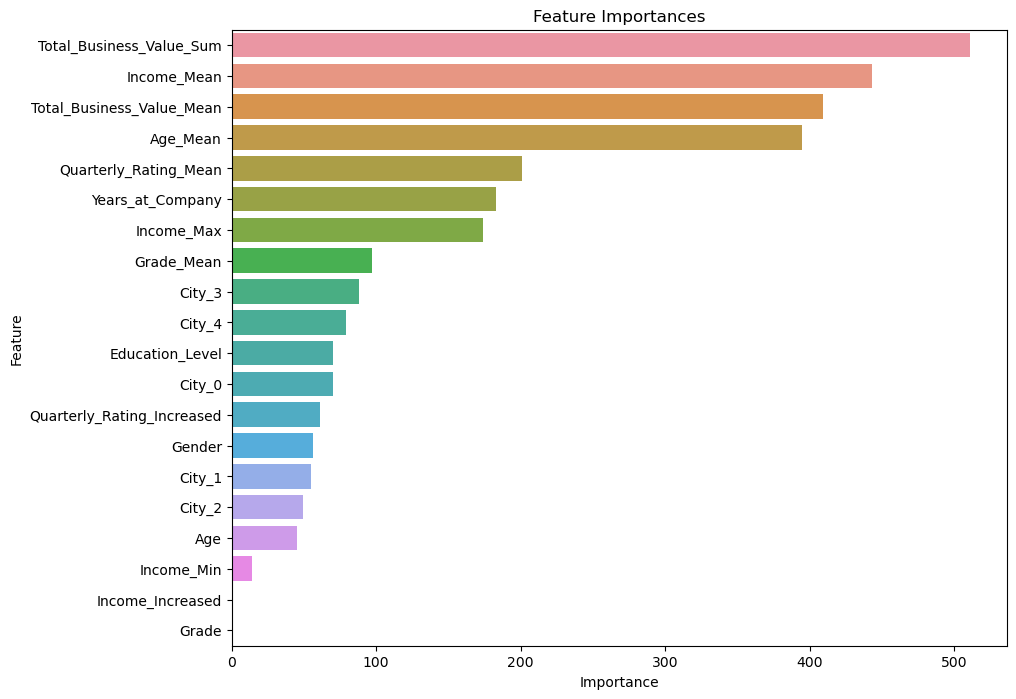

Training TunedRF...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


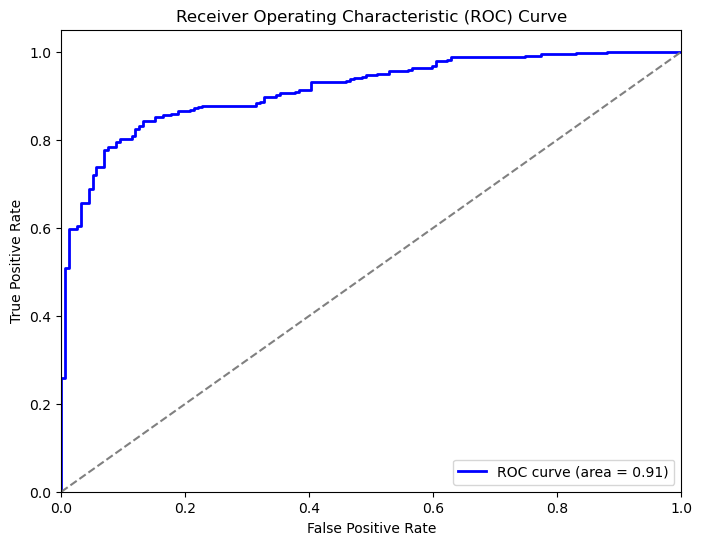

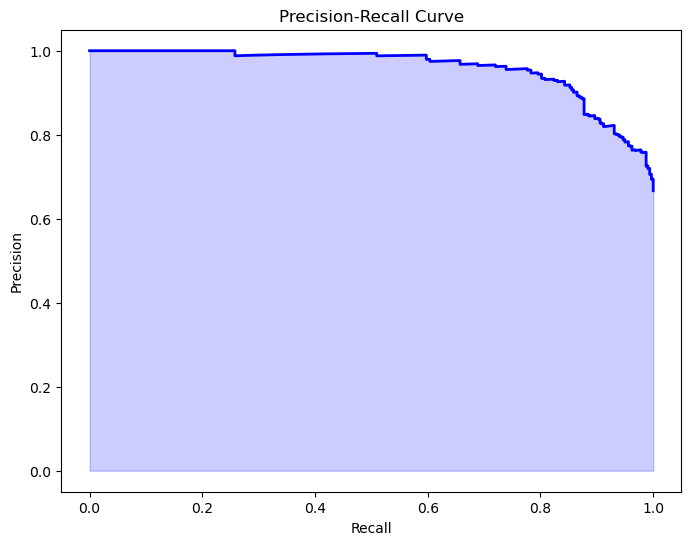

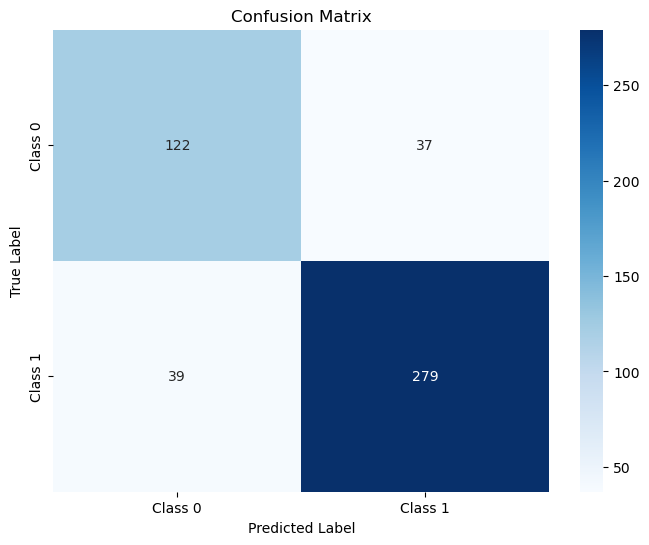

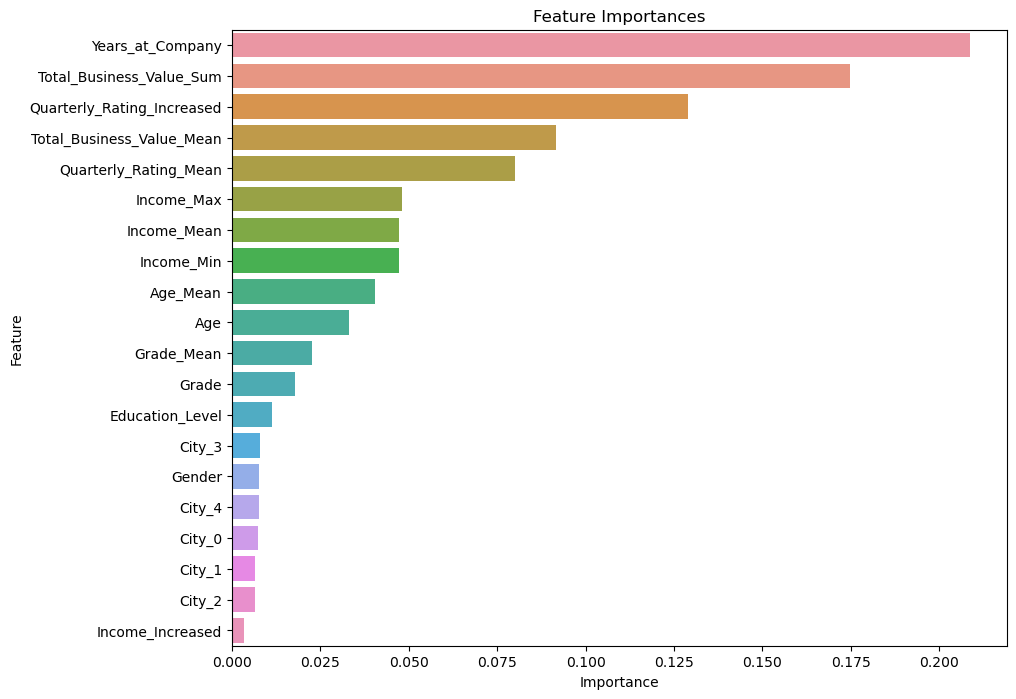

Training TunedGB...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


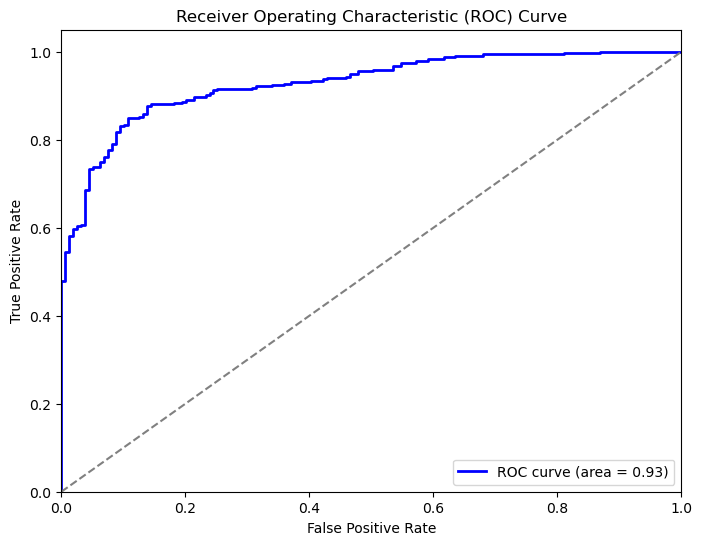

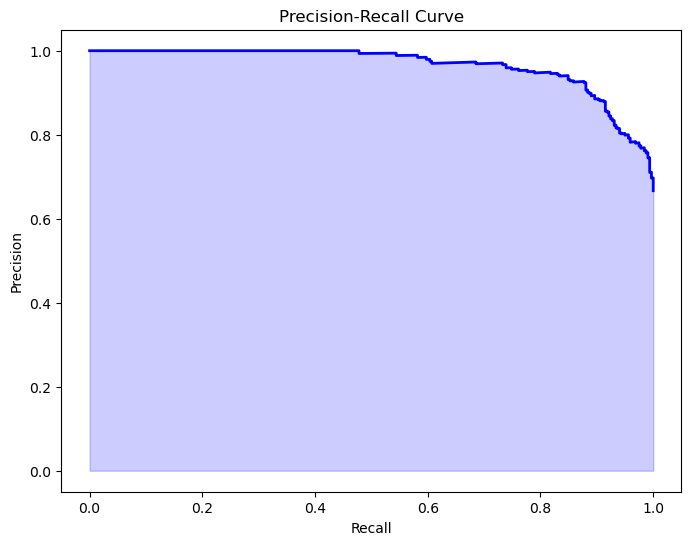

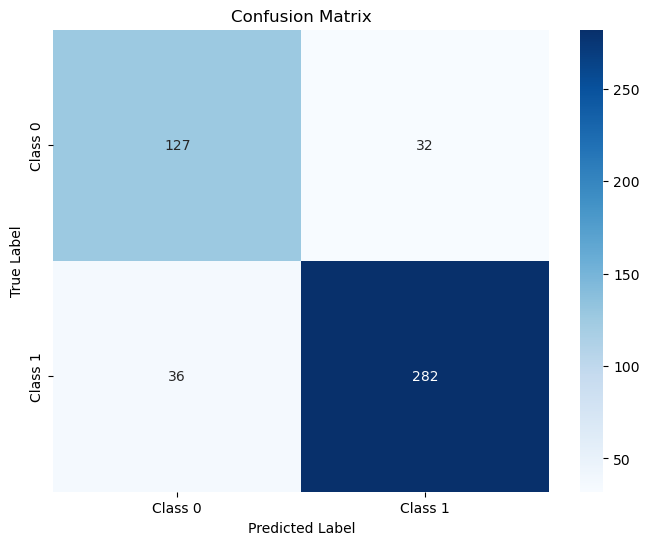

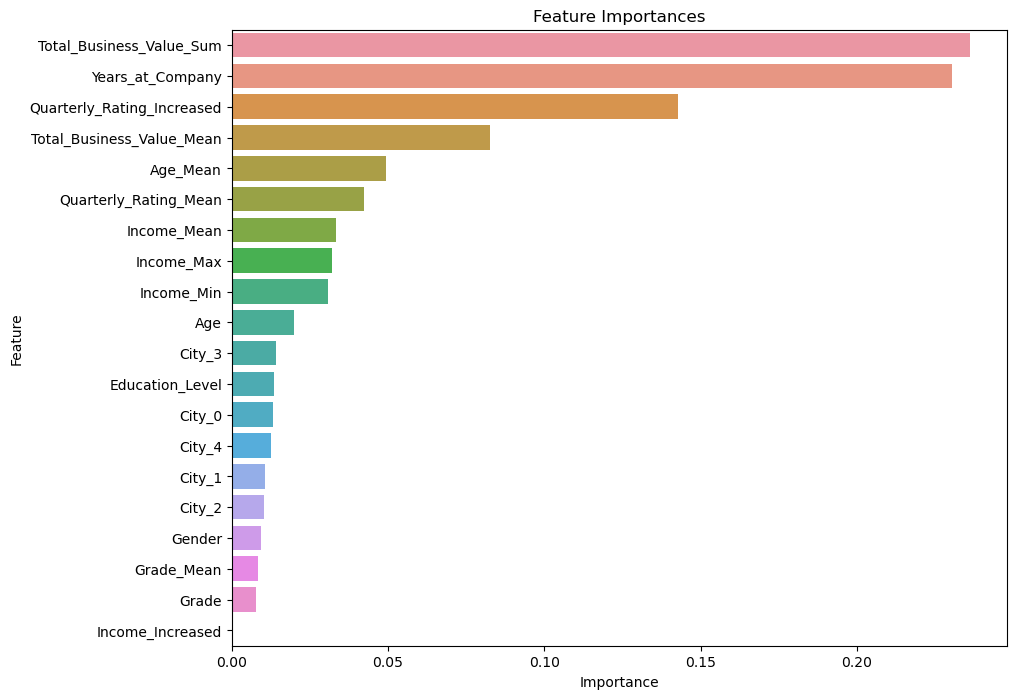

Training TunedXgb...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


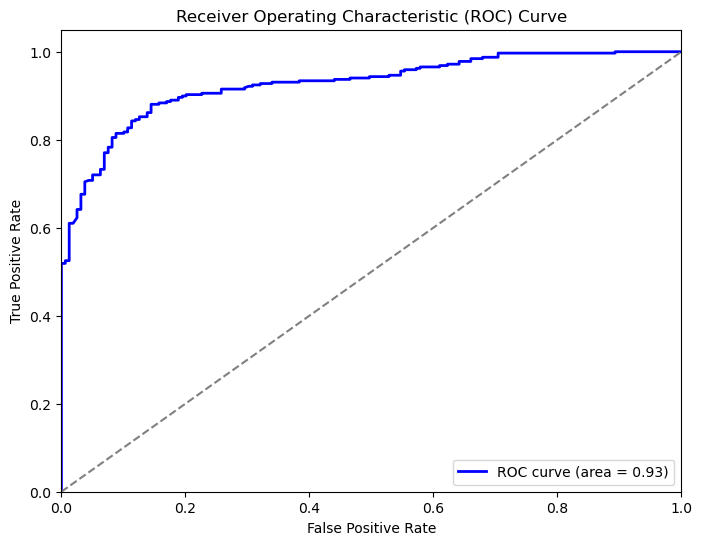

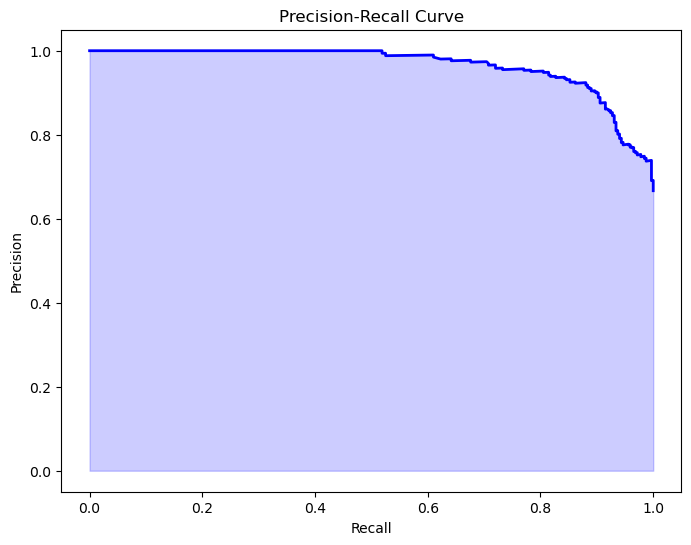

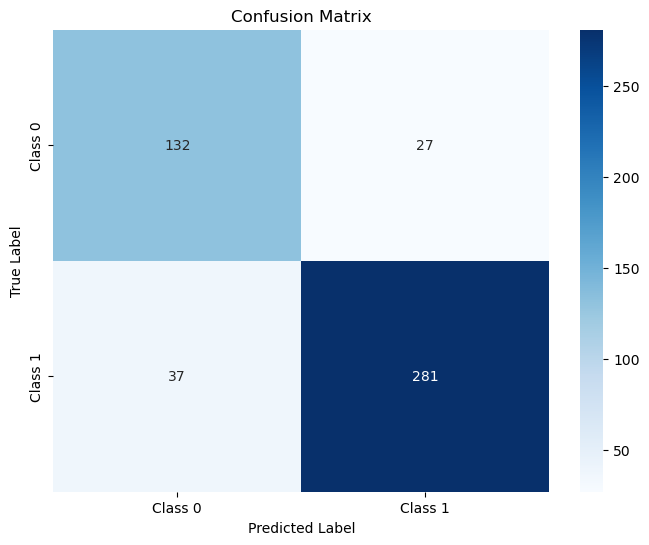

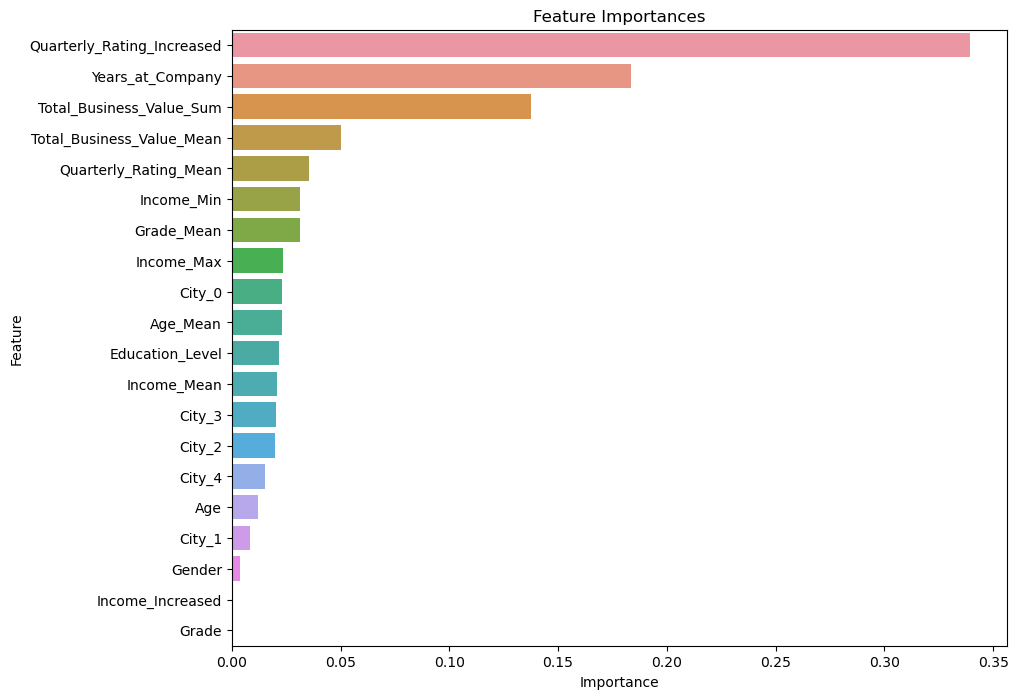

Training TunedLgbm...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1286, number of negative: 590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1690
[LightGBM] [Info] Number of data points in the train set: 1876, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685501 -> initscore=0.779169
[LightGBM] [Info] Start training from score 0.779169
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

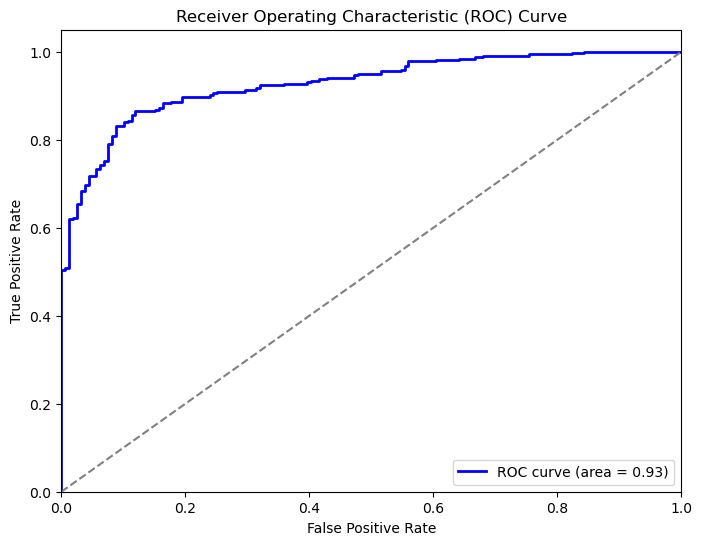

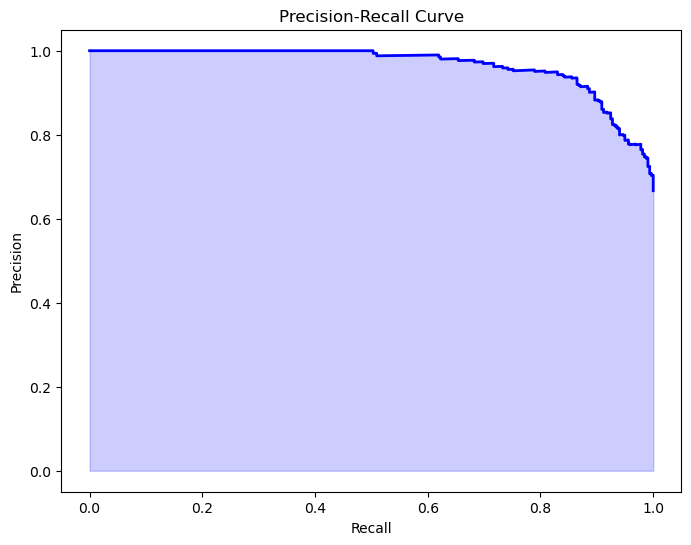

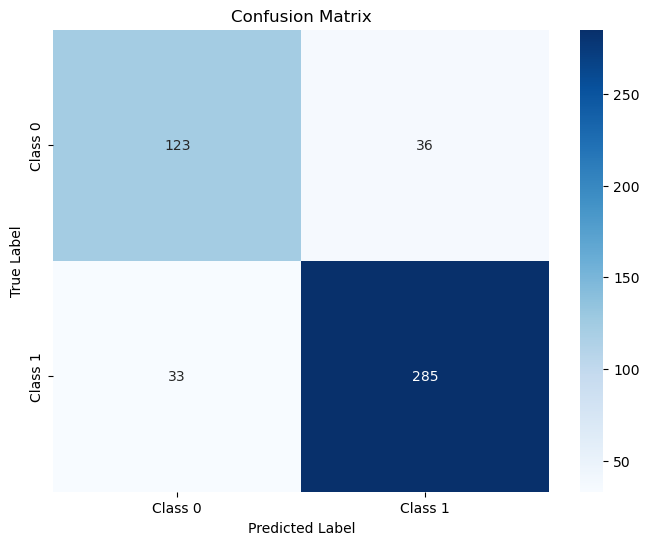

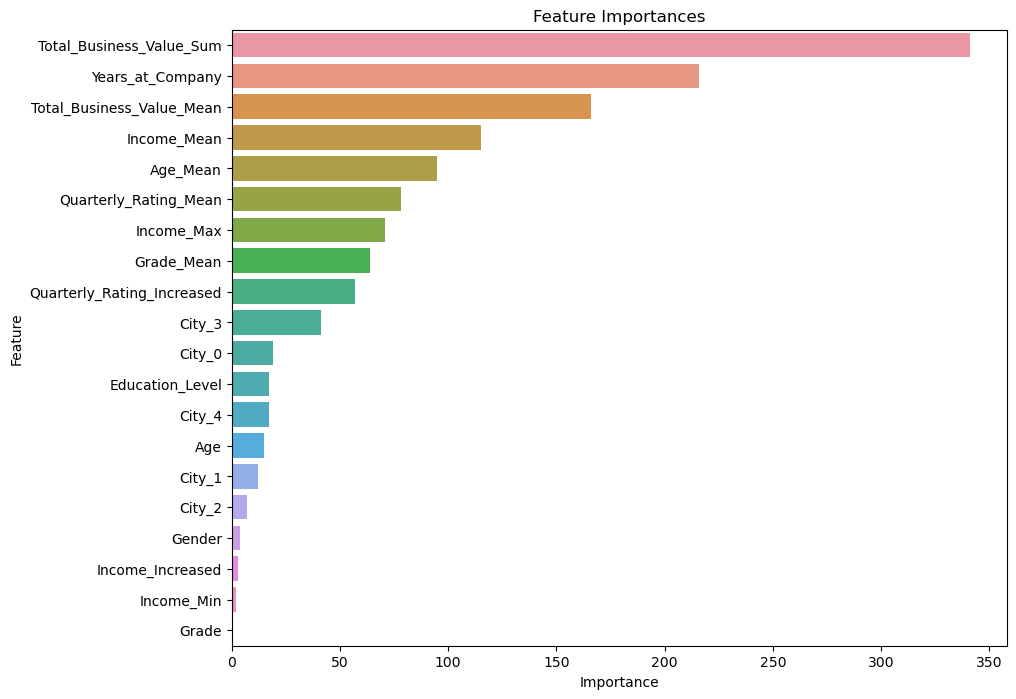

Model  Overall Precision  Overall Recall  Overall F1 Score  \
0    simple RF           0.890675        0.871069          0.880763   
1    simple GB           0.896552        0.899371          0.897959   
2   simple xgb           0.891720        0.880503          0.886076   
3  simple lgbm           0.886792        0.886792          0.886792   
4      TunedRF           0.882911        0.877358          0.880126   
5      TunedGB           0.898089        0.886792          0.892405   
6     TunedXgb           0.912338        0.883648          0.897764   
7    TunedLgbm           0.887850        0.896226          0.892019   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
0           0.753012        0.786164          0.769231           0.890675   
1           0.797468        0.792453          0.794953           0.896552   
2           0.766871        0.786164          0.776398           0.891720   
3           0.773585        0.773585          0.773585           0.886792   
4           0.757764        0.767296          0.762500           0.882911   
5           0.779141        0.798742          0.788820           0.898089   
6           0.781065        0.830189          0.804878           0.912338   
7           0.788462        0.773585          0.780952           0.887850   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
0        0.871069          0.880763  0.913700  
1        0.899371          0.897959  0.929235  
2        0.880503          0.886076  0.912266  
3        0.886792          0.886792  0.925616  
4        0.877358          0.880126  0.914402  
5        0.886792          0.892405  0.928266  
6        0.883648          0.897764  0.926407  
7        0.896226          0.892019  0.927713

In [120]:
# Define models dictionary
models = {
       'simple RF' : RandomForestClassifier(oob_score=True),
    'simple GB' : GradientBoostingClassifier(),
    'simple xgb' : XGBClassifier(eval_metric='logloss'),
    'simple lgbm' : lgb.LGBMClassifier(),
    'TunedRF': TunedRF,
    'TunedGB': TunedGB,
    'TunedXgb': TunedXgb,
    'TunedLgbm': TunedLgbm
}

# Train and evaluate models
all_results_df = train_and_evaluate(models, x_train_no_outliers, x_test, y_train_no_outliers, y_test)

# Print results DataFrame
display(all_results_df)

In [121]:
all_results_df.sort_values(by=["Overall F1 Score"],ascending=False)

Model  Overall Precision  Overall Recall  Overall F1 Score  \
1    simple GB           0.896552        0.899371          0.897959   
6     TunedXgb           0.912338        0.883648          0.897764   
5      TunedGB           0.898089        0.886792          0.892405   
7    TunedLgbm           0.887850        0.896226          0.892019   
3  simple lgbm           0.886792        0.886792          0.886792   
2   simple xgb           0.891720        0.880503          0.886076   
0    simple RF           0.890675        0.871069          0.880763   
4      TunedRF           0.882911        0.877358          0.880126   

   Class 0 Precision  Class 0 Recall  Class 0 F1 Score  Class 1 Precision  \
1           0.797468        0.792453          0.794953           0.896552   
6           0.781065        0.830189          0.804878           0.912338   
5           0.779141        0.798742          0.788820           0.898089   
7           0.788462        0.773585          0.780952           0.887850   
3           0.773585        0.773585          0.773585           0.886792   
2           0.766871        0.786164          0.776398           0.891720   
0           0.753012        0.786164          0.769231           0.890675   
4           0.757764        0.767296          0.762500           0.882911   

   Class 1 Recall  Class 1 F1 Score   ROC AUC  
1        0.899371          0.897959  0.929235  
6        0.883648          0.897764  0.926407  
5        0.886792          0.892405  0.928266  
7        0.896226          0.892019  0.927713  
3        0.886792          0.886792  0.925616  
2        0.880503          0.886076  0.912266  
0        0.871069          0.880763  0.913700  
4        0.877358          0.880126  0.914402

# Model Insights



Overall Performance:

    Best Overall Precision: TunedRF (0.9331)
    Best Overall Recall: Simple GB (0.9025)
    Best Overall F1 Score: TunedGB (0.9013)
    Best ROC AUC: TunedGB (0.9286)
    
Class-wise Performance:

    Class 0 Precision: Simple GB (0.8000) and Simple LGBM (0.7778) are among the highest.
    Class 0 Recall: TunedRF (0.8805) and TunedXGB (0.7799) have good recall for Class 0.
    Class 1 Precision: TunedRF (0.9331) has the highest precision for Class 1.
    Class 1 Recall: Simple GB (0.9025) and Simple XGB (0.8868) are the best for Class 1.
    
Trade-offs:

    TunedGB offers the best balance between precision, recall, and F1 score. It has high ROC AUC and performs well across both classes.
    TunedRF has the highest precision for Class 1 but slightly lower recall. Its overall metrics are strong, though it has lower performance for Class 0 compared to others.
    Simple models (Simple GB, Simple LGBM, Simple XGB, Simple RF) generally provide less optimal performance compared to their tuned counterparts, highlighting the effectiveness of hyperparameter tuning.
    
Model Selection Guidance:


    For Balanced Precision and Recall: TunedGB is a strong choice due to its overall high metrics and balanced performance across classes.
    For High Precision in Class 1: TunedRF is preferable, especially if the cost of false positives is high.
    For Class 0 Performance: Simple GB and Simple LGBM might be more suitable if Class 0 is critical and recall is important.


FP and FN Insights:

    TunedRF has the highest false negatives, suggesting it misses many actual positives. It is effective where false positives are more acceptable.
    TunedGB offers balanced performance with moderate FP and FN. Good for general-purpose use.
    TunedLGBM has similar characteristics to TunedGB, making it a versatile choice for varied applications.
    Simple models generally have moderate performance metrics

# Business Actionable Insights

## Driver Age Distribution:

Insight: Drivers aged between 20 and 25 contribute to over 20% of the total driver base.

Implication: This age group is significant in the driver pool and may require targeted retention strategies.

## Driver Age Distribution:

Insight: Drivers aged between 20 and 25 contribute to over 20% of the total driver base.

Implication: This age group is significant in the driver pool and may require targeted retention strategies.

## Gender Distribution:

Insight: The driver base consists of 58% male and 42% female drivers.

Implication: Gender distribution is reasonably balanced but could influence targeted marketing and support programs.

## City Distribution:

Insight: Data is uniformly spread across 29 unique cities.

Implication: This suggests a broad geographical coverage but may require city-specific strategies to address local variations.


## Correlation with Has_Left:

Insight: Strong correlations exist between Has_Left and several features including Income_mean, Income_max, Grade_mean, Total_business_value_mean, Quarterly_rating, Income_increased, and Quarterly_rating_increased.

Implication: These factors are significant predictors of driver attrition.

## Outliers:

Insight: Numerical columns contain significant outliers.

Implication: Outliers could impact model performance but was addressed post-initial model building. THere was no significant impact

## High Attrition by Grade:

Insight: 80% of drivers in Grade 1 have left.'

Implication: Grade 1 drivers are at a higher risk of attrition.

## Quarterly Rating Increase:

Insight: 75% of drivers whose Quarterly Rating Increased have left.

Implication: This suggests that despite improvement in ratings, these drivers are leaving, which could indicate underlying dissatisfaction.

## Income Impact:


Insight: 68% of drivers whose income did not increase have left.

Implication: Income growth is a significant factor in driver retention.

## Tenure and Attrition:

Insight: 88% of drivers who have spent 5 years at the company have left. There is also a very high percentage of drivers leaving after 5 to 7 years.

Implication: Driver tenure significantly impacts attrition, with a notable spike around the 5-year mark.

# Business Recommendations

## Targeted Retention Strategies for Young Drivers:

Recommendation: Develop retention programs specifically designed for drivers aged 20-25. This could include career development opportunities, performance incentives, and enhanced support systems.

## Gender-Specific Support Programs:

Recommendation: Implement support and engagement programs tailored to both male and female drivers, considering their different needs and preferences.

## City-Specific Strategies:

Recommendation: Analyze driver attrition patterns in different cities and develop localized strategies to improve driver satisfaction and retention.

## Focus on Key Predictors of Attrition:

Recommendation: Use features such as Income_mean, Income_max, Grade_mean, Total_business_value_mean, Quarterly_rating, Income_increased, and Quarterly_rating_increased to build predictive models. Implement targeted interventions based on these predictors to reduce attrition.

## Address Driver Attrition in Grade 1:

Recommendation: Investigate the reasons for high attrition among Grade 1 drivers and develop tailored retention initiatives, such as career advancement programs or increased support.

## Investigate Quarterly Rating Increase:

Recommendation: Analyze why drivers with increased Quarterly Ratings are leaving. Consider implementing feedback mechanisms or adjusting performance evaluation criteria to address potential issues.

## Enhance Income Growth Opportunities:

Recommendation: Ensure that income growth opportunities are available and clearly communicated to drivers. Consider introducing regular reviews and incentives to improve income satisfaction.

## Develop Programs for Long-Tenur2e Drivers:

Recommendation: Create retention strategies focused on drivers approaching the 5-year tenure mark. Offer incentives, career development programs, or role enhancements to retain these drivers.

## Review and Manage Outliers:

Recommendation: Review the impact of outliers in numerical columns post-initial model building and adjust models or strategies accordingly to mitigate any negative effects.